In [1]:
# Codigo 1
# Codigo 1
# Codigo 1
# Codigo 1
# Codigo 1

CÓDIGO 1: CARGA Y EXPLORACIÓN DE VARIABLES
Ruta base: E:\Trabajo\Congreso\Amenaza\Variables\Resample
Variables a cargar: 17

VERIFICACIÓN DE ARCHIVOS
✓ Aspect: Aspect1.tif
✓ Slope: Slope.tif
✗ Curvatura_Perfil: CurvaturePro1.tif - NO ENCONTRADO
✗ Curvatura_PLan: CurvaturePLan1.tif - NO ENCONTRADO
✗ Curvatura_Total: CurvatureT1.tif - NO ENCONTRADO
✓ FlowAcc: FlowAcc.tif
✓ Coberturas: Cobertura_ALT5.tif
✗ Suelos: Suelos1.tif - NO ENCONTRADO
✓ DEM: DEM_Andes.tif
✓ Geologia: Geologia2.tif
✓ Precipitacion: Precipitacion.tif
✗ DistanciaRios: Distancia_Rios41.tif - NO ENCONTRADO
✓ REM_512m: REM_512m.tif
✓ Humedad: Humedad.tif
✗ DistanciaCaminos2: Distancia_Vias21.tif - NO ENCONTRADO
✗ DistanciaCaminos3: Distancia_Vias21.tif - NO ENCONTRADO
✓ Inventario: Inventario\Inv_MM_F1.tif

Archivos encontrados: 10
Archivos faltantes: 7
Variables faltantes: Curvatura_Perfil, Curvatura_PLan, Curvatura_Total, Suelos, DistanciaRios, DistanciaCaminos2, DistanciaCaminos3

CARGA Y ANÁLISIS DE DATOS

Cargando: 

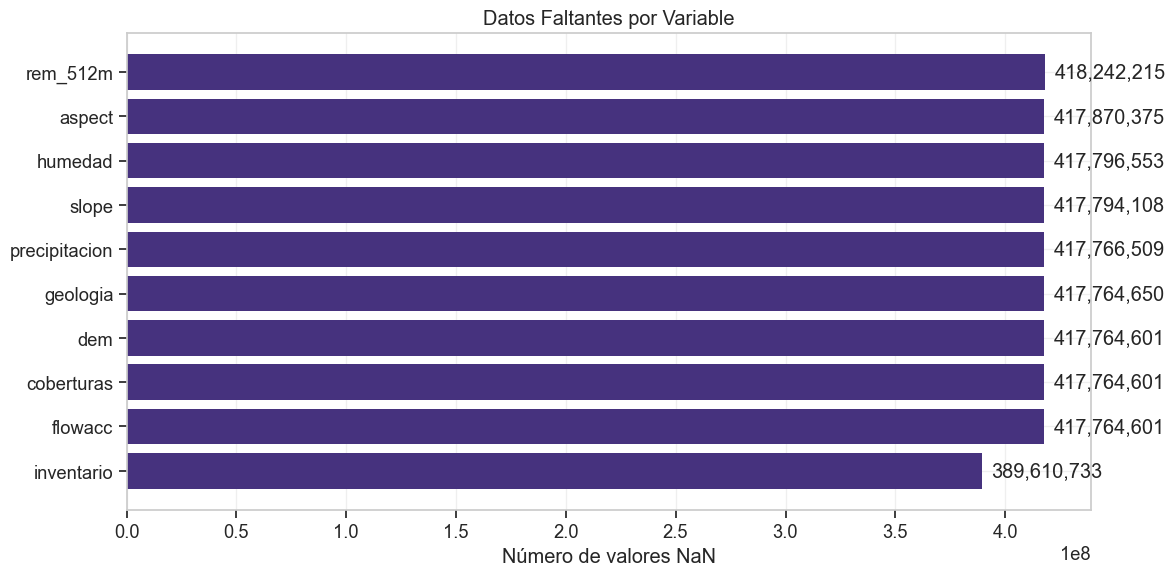

Usando muestra de 10,000 filas para visualización de patrones de NaN


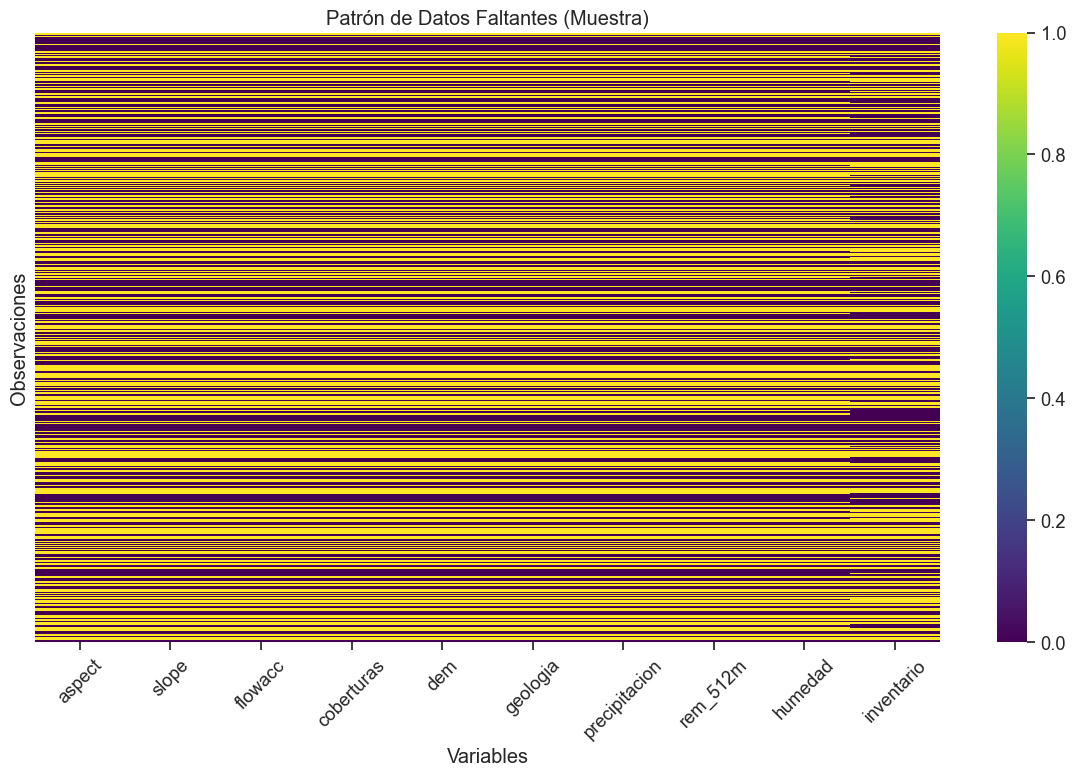

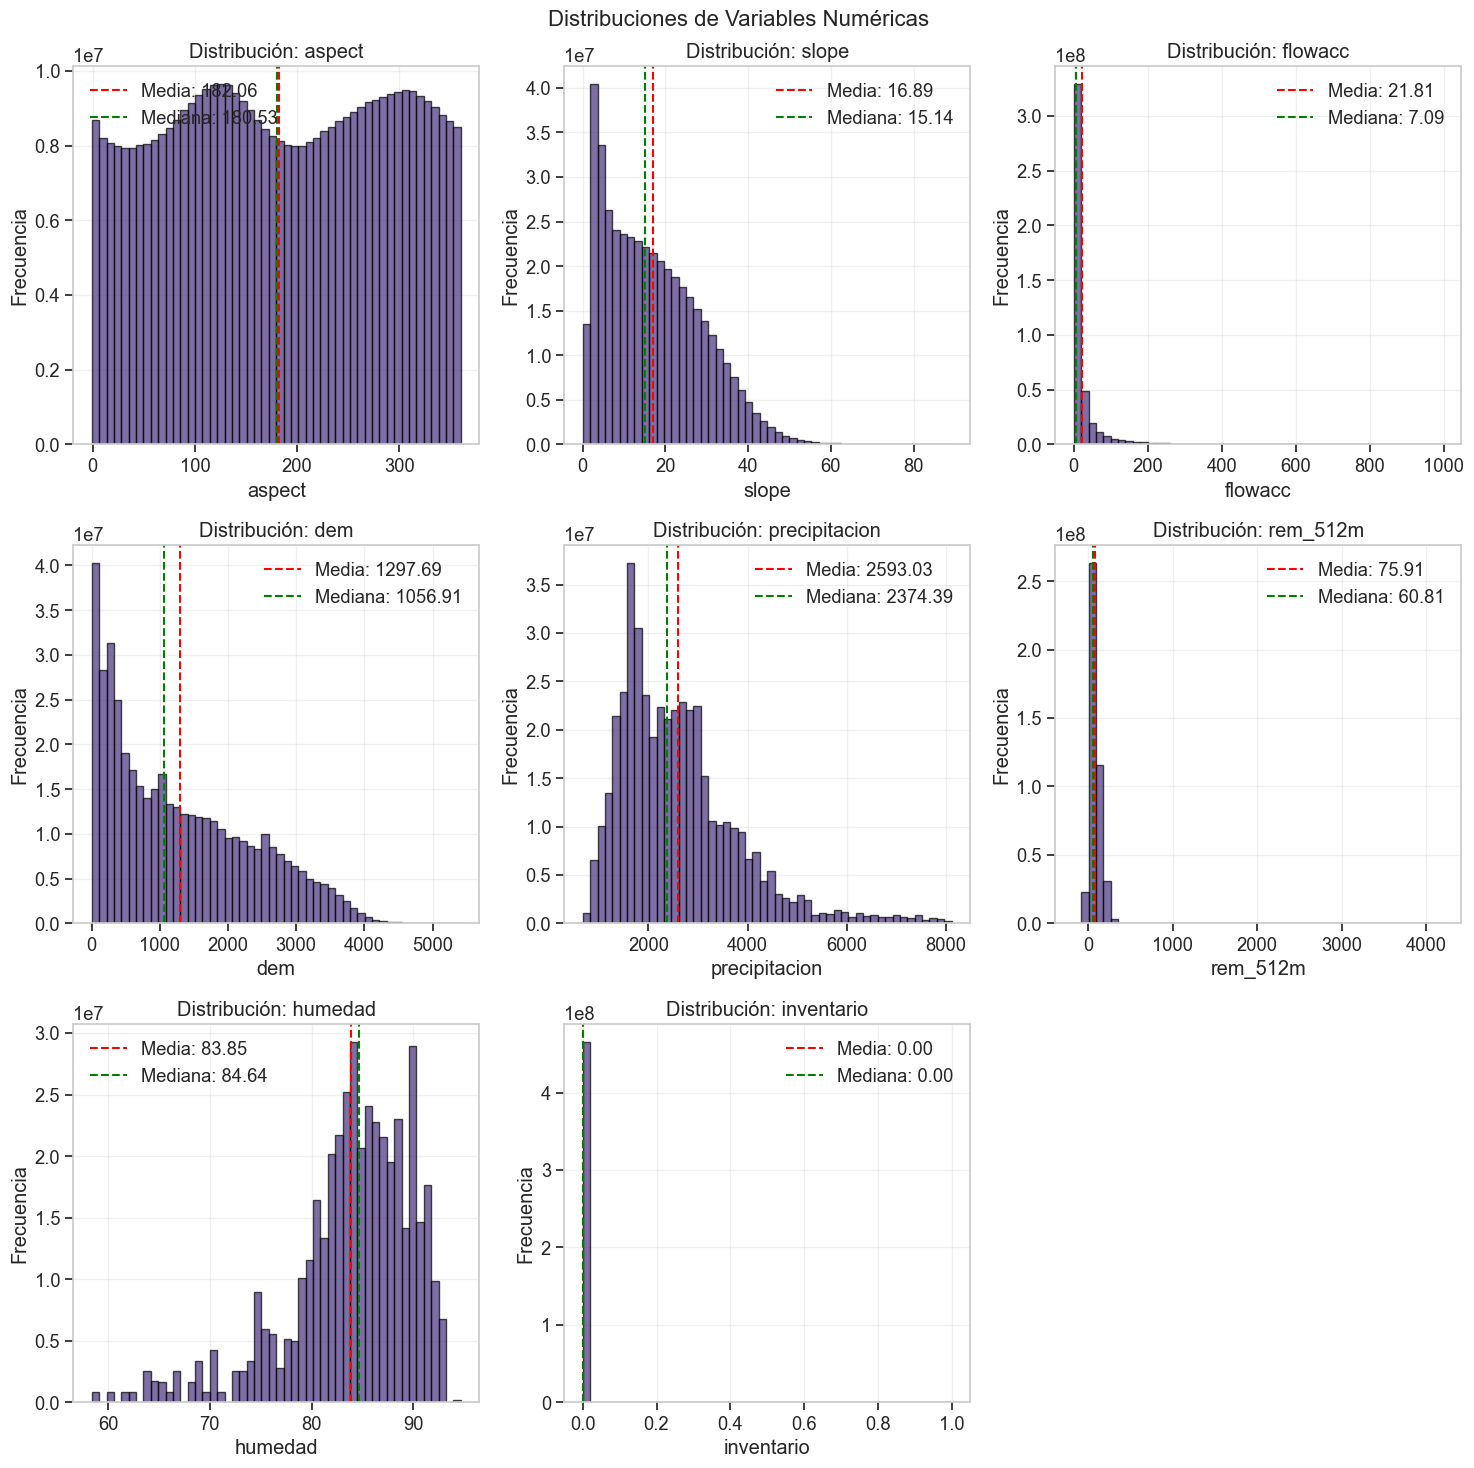

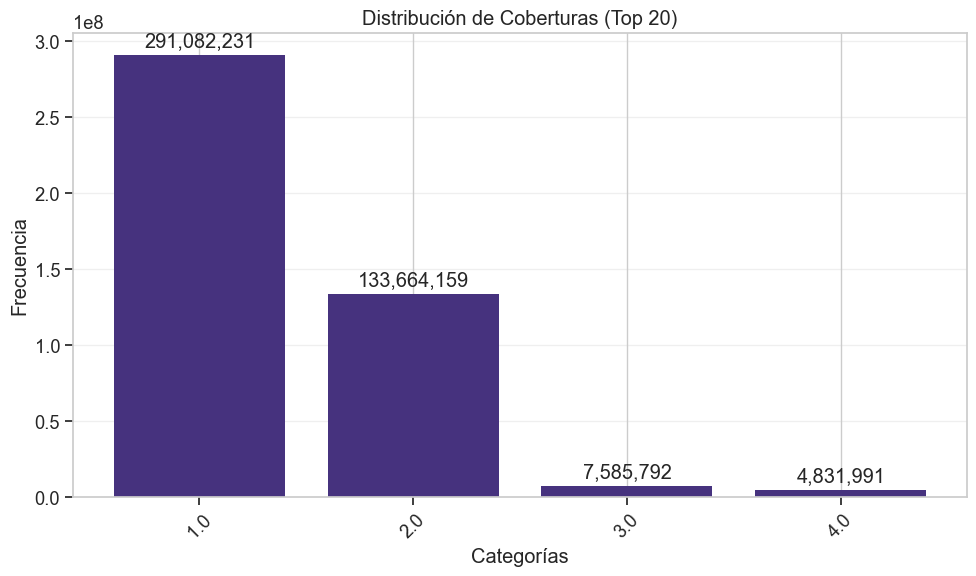


Estadísticas de Coberturas:
  Categorías únicas: 4
  Categoría más frecuente: 1.0 (291,082,231 casos)


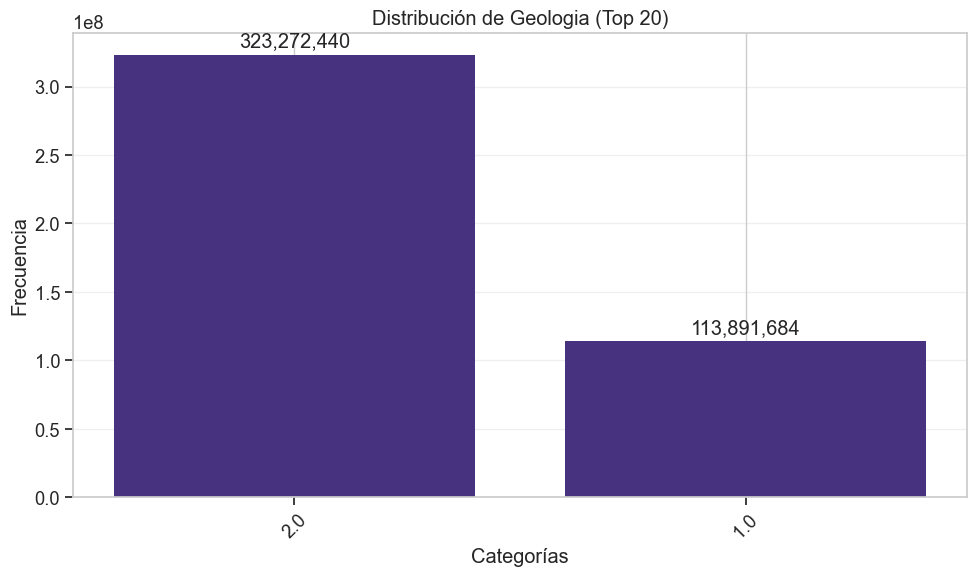


Estadísticas de Geologia:
  Categorías únicas: 2
  Categoría más frecuente: 2.0 (323,272,440 casos)

GUARDANDO RESULTADOS
DataFrame guardado en: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Analisis_Variables\dataframe_completo.pkl
Información de variables guardada en: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Analisis_Variables\informacion_variables.csv
Resumen de datos faltantes guardado en: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Analisis_Variables\resumen_datos_faltantes.csv

RESUMEN FINAL - CÓDIGO 1
Variables cargadas exitosamente: 10
Variables faltantes: 7
Dimensiones del DataFrame: (854928774, 10)
Filas con datos completos: 424,261,778
Archivos guardados en: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Analisis_Variables
Movimientos en masa detectados: 31,504

Siguiente paso: Ejecutar Código 2 para análisis de variables y selección


In [9]:
import pandas as pd
import os
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")

# =============================================================================
# CÓDIGO 1: CARGA Y EXPLORACIÓN INICIAL DE VARIABLES
# =============================================================================

print("="*60)
print("CÓDIGO 1: CARGA Y EXPLORACIÓN DE VARIABLES")
print("="*60)

# Configuración de rutas
ruta_base = r'E:\Trabajo\Congreso\Amenaza\Variables\Resample'
carpeta_salida = os.path.join(ruta_base, 'Analisis_Variables')

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Definir todas las variables disponibles
variables_disponibles = {
    'Aspect': 'Aspect1.tif',
    'Slope': 'Slope.tif', 
    'Curvatura_Perfil': 'CurvaturePro1.tif',
    'Curvatura_PLan': 'CurvaturePLan1.tif',
    'Curvatura_Total': 'CurvatureT1.tif',
    'FlowAcc': 'FlowAcc.tif',
    'Coberturas': 'Cobertura_ALT5.tif',
    'Suelos': 'Suelos1.tif',
    'DEM': 'DEM_Andes.tif',
    'Geologia': 'Geologia2.tif',
    'Precipitacion': 'Precipitacion.tif',
    'DistanciaRios': 'Distancia_Rios41.tif',
    'REM_512m': 'REM_512m.tif',
    'Humedad': 'Humedad.tif',

    'DistanciaCaminos2': 'Distancia_Vias21.tif',
    'DistanciaCaminos3': 'Distancia_Vias21.tif',
    
    'Inventario': os.path.join('Inventario', 'Inv_MM_F1.tif')
}

# Variables categóricas (para procesamiento especial)
variables_categoricas = ['Coberturas', 'Suelos', 'Geologia']

# Valores NoData comunes a verificar
valores_nodata_comunes = [-9999, -999, -99, 9999, 255, 0, np.nan]

print(f"Ruta base: {ruta_base}")
print(f"Variables a cargar: {len(variables_disponibles)}")
print("\n" + "="*50)
print("VERIFICACIÓN DE ARCHIVOS")
print("="*50)

# Verificar qué archivos existen
archivos_existentes = {}
archivos_faltantes = []

for nombre_var, archivo in variables_disponibles.items():
    ruta_completa = os.path.join(ruta_base, archivo)
    if os.path.exists(ruta_completa):
        archivos_existentes[nombre_var] = ruta_completa
        print(f"✓ {nombre_var}: {archivo}")
    else:
        archivos_faltantes.append(nombre_var)
        print(f"✗ {nombre_var}: {archivo} - NO ENCONTRADO")

print(f"\nArchivos encontrados: {len(archivos_existentes)}")
print(f"Archivos faltantes: {len(archivos_faltantes)}")

if archivos_faltantes:
    print(f"Variables faltantes: {', '.join(archivos_faltantes)}")

# =============================================================================
# CARGA DE DATOS Y ANÁLISIS INICIAL
# =============================================================================

print("\n" + "="*50)
print("CARGA Y ANÁLISIS DE DATOS")
print("="*50)

df_combined = pd.DataFrame()
info_variables = {}

# Cargar cada variable disponible
for nombre_var, ruta_archivo in archivos_existentes.items():
    print(f"\nCargando: {nombre_var}")
    print("-" * 30)
    
    try:
        with rasterio.open(ruta_archivo) as src:
            # Leer datos del raster
            raster_data = src.read(1)
            nodata_value = src.nodata
            raster_shape = raster_data.shape
            
            print(f"  Archivo: {os.path.basename(ruta_archivo)}")
            print(f"  Dimensiones: {raster_shape}")
            print(f"  NoData oficial: {nodata_value}")
            print(f"  Tipo de datos: {raster_data.dtype}")
            print(f"  Rango de valores: {raster_data.min()} a {raster_data.max()}")
            
            # Estadísticas básicas antes de procesar NoData
            valores_unicos = len(np.unique(raster_data))
            print(f"  Valores únicos: {valores_unicos}")
            
            # Detectar posibles valores NoData
            posibles_nodata = []
            for val in valores_nodata_comunes:
                if not np.isnan(val):
                    count = np.sum(raster_data == val)
                    if count > 0:
                        posibles_nodata.append((val, count))
                else:
                    count = np.sum(np.isnan(raster_data))
                    if count > 0:
                        posibles_nodata.append(('NaN', count))
            
            if posibles_nodata:
                print(f"  Posibles valores NoData encontrados:")
                for val, count in posibles_nodata:
                    porcentaje = (count / raster_data.size) * 100
                    print(f"    - Valor {val}: {count} celdas ({porcentaje:.2f}%)")
            
            # Definir valor NoData a usar (priorizar el oficial, luego el más común)
            if nodata_value is not None:
                nodata_final = nodata_value
            elif posibles_nodata:
                # Usar el valor con más celdas
                nodata_final = max(posibles_nodata, key=lambda x: x[1])[0]
                if nodata_final == 'NaN':
                    nodata_final = np.nan
            else:
                nodata_final = -9999  # Valor por defecto
            
            print(f"  NoData usado para análisis: {nodata_final}")
            
            # Reemplazar valores NoData con NaN
            if not pd.isna(nodata_final) and nodata_final != 'NaN':
                raster_data_clean = np.where(raster_data == nodata_final, np.nan, raster_data)
            else:
                raster_data_clean = raster_data.astype(float)
            
            # Estadísticas después de limpiar NoData
            datos_validos = ~np.isnan(raster_data_clean)
            n_validos = np.sum(datos_validos)
            n_nan = np.sum(~datos_validos)
            porcentaje_validos = (n_validos / raster_data_clean.size) * 100
            
            print(f"  Datos válidos: {n_validos} ({porcentaje_validos:.2f}%)")
            print(f"  Datos NaN: {n_nan} ({100-porcentaje_validos:.2f}%)")
            
            if n_validos > 0:
                datos_validos_array = raster_data_clean[datos_validos]
                print(f"  Estadísticas de datos válidos:")
                print(f"    - Media: {np.mean(datos_validos_array):.4f}")
                print(f"    - Mediana: {np.median(datos_validos_array):.4f}")
                print(f"    - Std: {np.std(datos_validos_array):.4f}")
                print(f"    - Min: {np.min(datos_validos_array):.4f}")
                print(f"    - Max: {np.max(datos_validos_array):.4f}")
            
            # Guardar información de la variable
            info_variables[nombre_var] = {
                'archivo': os.path.basename(ruta_archivo),
                'dimensiones': raster_shape,
                'nodata_oficial': nodata_value,
                'nodata_usado': nodata_final,
                'tipo_datos': str(raster_data.dtype),
                'valores_unicos': valores_unicos,
                'datos_validos': n_validos,
                'datos_nan': n_nan,
                'porcentaje_validos': porcentaje_validos,
                'es_categorica': nombre_var in variables_categoricas
            }
            
            if n_validos > 0:
                info_variables[nombre_var].update({
                    'media': np.mean(datos_validos_array),
                    'mediana': np.median(datos_validos_array),
                    'std': np.std(datos_validos_array),
                    'min': np.min(datos_validos_array),
                    'max': np.max(datos_validos_array)
                })
            
            # Crear DataFrame y agregar a la combinación
            df_aux = pd.DataFrame(raster_data_clean.flatten(), columns=[nombre_var.lower()])
            df_combined = pd.concat([df_combined, df_aux], axis=1)
            
            print(f"  ✓ Variable {nombre_var} cargada exitosamente")
            
    except Exception as e:
        print(f"  ✗ Error cargando {nombre_var}: {str(e)}")
        continue

print(f"\n" + "="*50)
print("RESUMEN DEL DATAFRAME COMBINADO")
print("="*50)

print(f"Dimensiones del DataFrame: {df_combined.shape}")
print(f"Columnas: {list(df_combined.columns)}")

# Información detallada por variable
print(f"\nInformación detallada por variable:")
print("-" * 80)
print(f"{'Variable':<15} {'Válidos':<10} {'NaN':<10} {'%Válidos':<10} {'Tipo':<12} {'Categórica'}")
print("-" * 80)

for var, info in info_variables.items():
    es_cat = "Sí" if info['es_categorica'] else "No"
    print(f"{var:<15} {info['datos_validos']:<10} {info['datos_nan']:<10} {info['porcentaje_validos']:<10.1f} {info['tipo_datos']:<12} {es_cat}")

# =============================================================================
# PROCESAMIENTO INICIAL DEL INVENTARIO
# =============================================================================

if 'inventario' in df_combined.columns:
    print(f"\n" + "="*50)
    print("PROCESAMIENTO DE VARIABLE INVENTARIO")
    print("="*50)
    
    print("Valores únicos en inventario antes de procesar:")
    print(df_combined['inventario'].value_counts(dropna=False))
    
    # Procesar inventario: 1 = movimiento, 0 = sin movimiento, NaN = sin datos
    # Asumir que valores > 0 son movimientos
    df_combined["inventario"] = np.where(df_combined["inventario"] > 0, 1, 
                                       np.where(pd.isna(df_combined["inventario"]), np.nan, 0))
    
    print("\nValores únicos en inventario después de procesar:")
    print(df_combined['inventario'].value_counts(dropna=False))
    
    # Estadísticas del inventario
    total_celdas = len(df_combined)
    celdas_validas = df_combined['inventario'].notna().sum()
    celdas_con_movimiento = (df_combined['inventario'] == 1).sum()
    celdas_sin_movimiento = (df_combined['inventario'] == 0).sum()
    
    print(f"\nEstadísticas del inventario:")
    print(f"  Total de celdas: {total_celdas:,}")
    print(f"  Celdas válidas: {celdas_validas:,} ({celdas_validas/total_celdas*100:.2f}%)")
    print(f"  Celdas con movimiento: {celdas_con_movimiento:,} ({celdas_con_movimiento/celdas_validas*100:.2f}% de válidas)")
    print(f"  Celdas sin movimiento: {celdas_sin_movimiento:,} ({celdas_sin_movimiento/celdas_validas*100:.2f}% de válidas)")

# =============================================================================
# ANÁLISIS DE DATOS FALTANTES
# =============================================================================

print(f"\n" + "="*50)
print("ANÁLISIS DE DATOS FALTANTES")
print("="*50)

# Calcular porcentaje de NaN por variable
nan_summary = df_combined.isnull().sum()
nan_percentage = (nan_summary / len(df_combined)) * 100

print("Datos faltantes por variable:")
print("-" * 40)
for var in df_combined.columns:
    print(f"{var:<15}: {nan_summary[var]:>8,} ({nan_percentage[var]:>6.2f}%)")

# Identificar filas completamente válidas
filas_completas = df_combined.dropna()
print(f"\nFilas con datos completos: {len(filas_completas):,} ({len(filas_completas)/len(df_combined)*100:.2f}%)")

# =============================================================================
# VISUALIZACIONES INICIALES
# =============================================================================

print(f"\n" + "="*50)
print("GENERANDO VISUALIZACIONES INICIALES")
print("="*50)

# 1. Gráfico de datos faltantes
plt.figure(figsize=(12, 6))
nan_data = df_combined.isnull().sum().sort_values(ascending=True)
plt.barh(range(len(nan_data)), nan_data.values)
plt.yticks(range(len(nan_data)), nan_data.index)
plt.xlabel('Número de valores NaN')
plt.title('Datos Faltantes por Variable')
plt.grid(True, alpha=0.3)
for i, v in enumerate(nan_data.values):
    plt.text(v + max(nan_data.values)*0.01, i, f'{v:,}', va='center')
plt.tight_layout()
plt.savefig(os.path.join(carpeta_salida, '01_datos_faltantes.png'), dpi=300, bbox_inches='tight')
plt.show()

# 2. Mapa de calor de datos faltantes (muestra)
if len(df_combined) > 10000:
    sample_size = 10000
    df_sample = df_combined.sample(n=sample_size, random_state=42)
    print(f"Usando muestra de {sample_size:,} filas para visualización de patrones de NaN")
else:
    df_sample = df_combined
    print(f"Usando todas las {len(df_combined):,} filas para visualización")

plt.figure(figsize=(12, 8))
sns.heatmap(df_sample.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Patrón de Datos Faltantes (Muestra)')
plt.xlabel('Variables')
plt.ylabel('Observaciones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(carpeta_salida, '02_patron_datos_faltantes.png'), dpi=300, bbox_inches='tight')
plt.show()

# 3. Histogramas de variables numéricas
variables_numericas = [col for col in df_combined.columns if col.replace('_','').replace(' ','').lower() not in [v.lower() for v in variables_categoricas]]

if variables_numericas:
    n_vars = len(variables_numericas)
    n_cols = 3
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, var in enumerate(variables_numericas):
        row = i // n_cols
        col = i % n_cols
        
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        data_clean = df_combined[var].dropna()
        if len(data_clean) > 0:
            ax.hist(data_clean, bins=50, alpha=0.7, edgecolor='black')
            ax.set_title(f'Distribución: {var}')
            ax.set_xlabel(var)
            ax.set_ylabel('Frecuencia')
            ax.grid(True, alpha=0.3)
            
            # Agregar estadísticas
            media = data_clean.mean()
            mediana = data_clean.median()
            ax.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
            ax.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
            ax.legend()
        else:
            ax.text(0.5, 0.5, 'Sin datos válidos', ha='center', va='center', transform=ax.transAxes)
    
    # Ocultar subplots vacíos
    for i in range(len(variables_numericas), n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        ax.set_visible(False)
    
    plt.suptitle('Distribuciones de Variables Numéricas', fontsize=16)
    plt.tight_layout()
    plt.savefig(os.path.join(carpeta_salida, '03_distribuciones_numericas.png'), dpi=300, bbox_inches='tight')
    plt.show()

# 4. Análisis de variables categóricas
for var in variables_categoricas:
    var_lower = var.lower()
    if var_lower in df_combined.columns:
        plt.figure(figsize=(10, 6))
        
        data_clean = df_combined[var_lower].dropna()
        if len(data_clean) > 0:
            value_counts = data_clean.value_counts().head(20)  # Top 20 categorías
            
            plt.bar(range(len(value_counts)), value_counts.values)
            plt.xticks(range(len(value_counts)), value_counts.index, rotation=45)
            plt.xlabel('Categorías')
            plt.ylabel('Frecuencia')
            plt.title(f'Distribución de {var} (Top 20)')
            plt.grid(True, alpha=0.3, axis='y')
            
            # Mostrar valores en las barras
            for i, v in enumerate(value_counts.values):
                plt.text(i, v + max(value_counts.values)*0.01, f'{v:,}', ha='center', va='bottom')
            
            plt.tight_layout()
            plt.savefig(os.path.join(carpeta_salida, f'04_distribucion_{var.lower()}.png'), dpi=300, bbox_inches='tight')
            plt.show()
            
            print(f"\nEstadísticas de {var}:")
            print(f"  Categorías únicas: {len(data_clean.unique())}")
            print(f"  Categoría más frecuente: {value_counts.index[0]} ({value_counts.iloc[0]:,} casos)")

# =============================================================================
# GUARDAR RESULTADOS
# =============================================================================

print(f"\n" + "="*50)
print("GUARDANDO RESULTADOS")
print("="*50)

# Guardar DataFrame completo
archivo_df = os.path.join(carpeta_salida, 'dataframe_completo.pkl')
df_combined.to_pickle(archivo_df)
print(f"DataFrame guardado en: {archivo_df}")

# Guardar información de variables
info_df = pd.DataFrame(info_variables).T
archivo_info = os.path.join(carpeta_salida, 'informacion_variables.csv')
info_df.to_csv(archivo_info)
print(f"Información de variables guardada en: {archivo_info}")

# Guardar resumen de datos faltantes
nan_df = pd.DataFrame({
    'Variable': df_combined.columns,
    'Datos_Faltantes': nan_summary.values,
    'Porcentaje_Faltantes': nan_percentage.values
})
archivo_nan = os.path.join(carpeta_salida, 'resumen_datos_faltantes.csv')
nan_df.to_csv(archivo_nan, index=False)
print(f"Resumen de datos faltantes guardado en: {archivo_nan}")

# Resumen final
print(f"\n" + "="*60)
print("RESUMEN FINAL - CÓDIGO 1")
print("="*60)

print(f"Variables cargadas exitosamente: {len(info_variables)}")
print(f"Variables faltantes: {len(archivos_faltantes)}")
print(f"Dimensiones del DataFrame: {df_combined.shape}")
print(f"Filas con datos completos: {len(filas_completas):,}")
print(f"Archivos guardados en: {carpeta_salida}")

if 'inventario' in df_combined.columns:
    print(f"Movimientos en masa detectados: {(df_combined['inventario'] == 1).sum():,}")

print("\nSiguiente paso: Ejecutar Código 2 para análisis de variables y selección")
print("="*60)

In [ ]:
# Codigo 2
# Codigo 2
# Codigo 2
# Codigo 2
# Codigo 2

CÓDIGO 2: ANÁLISIS Y SELECCIÓN DE VARIABLES
Cargando DataFrame del Código 1...
DataFrame cargado: (854928774, 10)
Dataset muy grande. Creando muestra estratificada...
Muestra creada: 6,000,000 observaciones

LIMPIEZA Y PREPARACIÓN DE DATOS
Filas después de eliminar NaN en inventario: 6,000,000

Distribución del inventario:
inventario
0.0    5999779
1.0        221
Name: count, dtype: int64

Estadísticas del inventario:
  Total: 6,000,000
  Con movimiento: 221 (0.00%)
  Sin movimiento: 5,999,779 (100.00%)

ANÁLISIS ESTADÍSTICO POR VARIABLE
Puntos con movimientos: 221
Puntos sin movimientos: 5,999,779
Variables a analizar: 9
Variables numéricas: ['aspect', 'slope', 'flowacc', 'dem', 'precipitacion', 'rem_512m', 'humedad']
Variables categóricas: ['coberturas', 'geologia']

ANÁLISIS DETALLADO - VARIABLES NUMÉRICAS

------------------------------------------------------------
VARIABLE: ASPECT
------------------------------------------------------------
  ESTADÍSTICAS DESCRIPTIVAS:
    Con MM

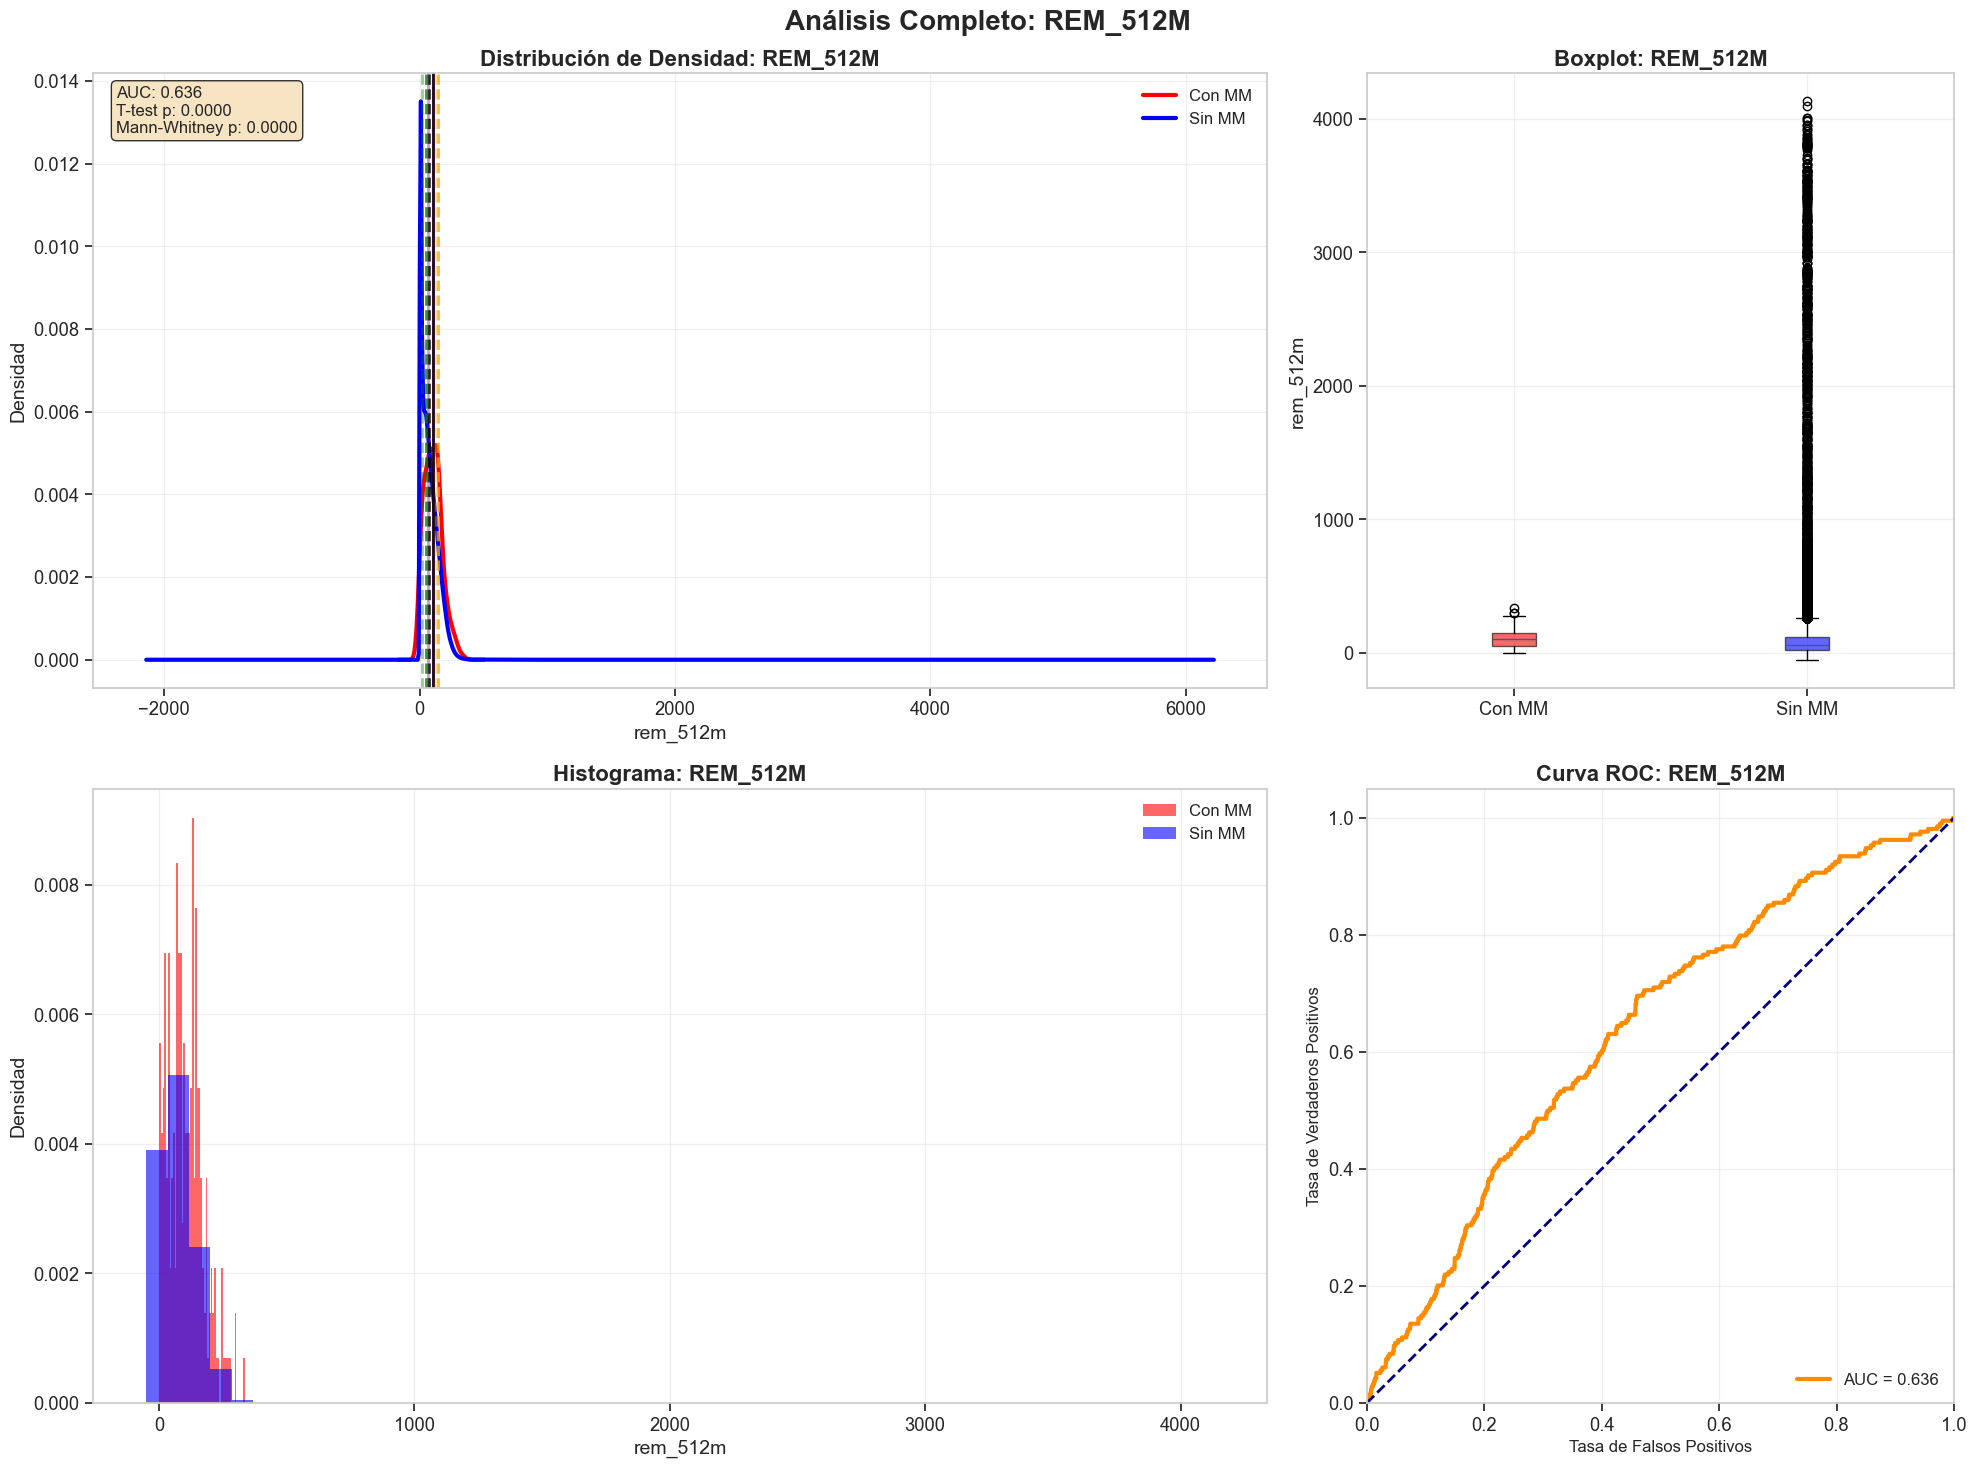

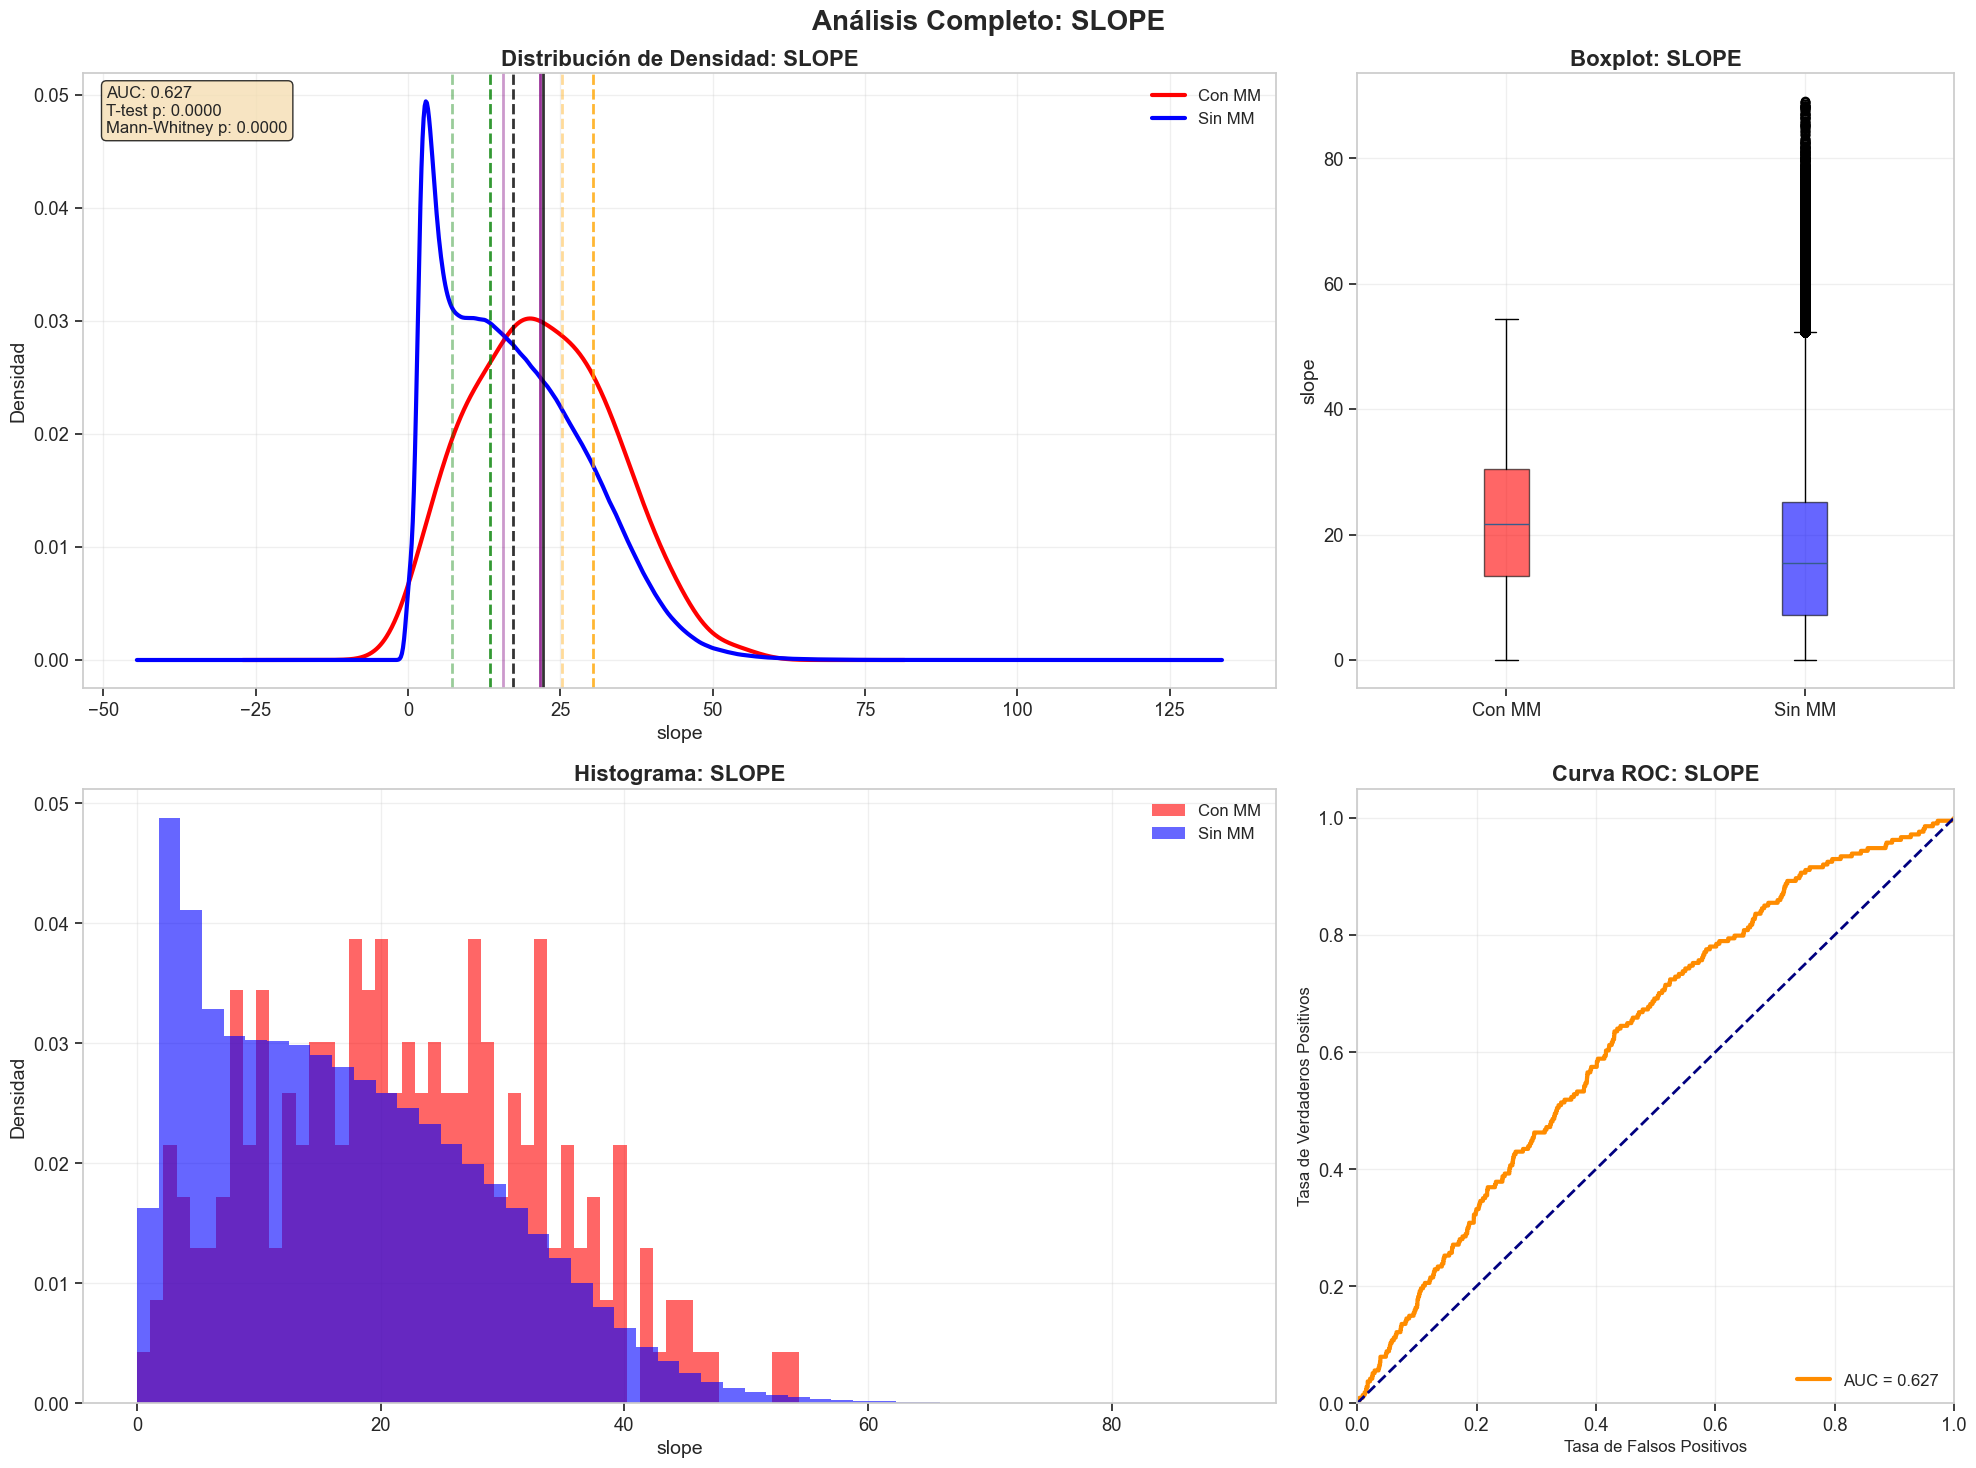

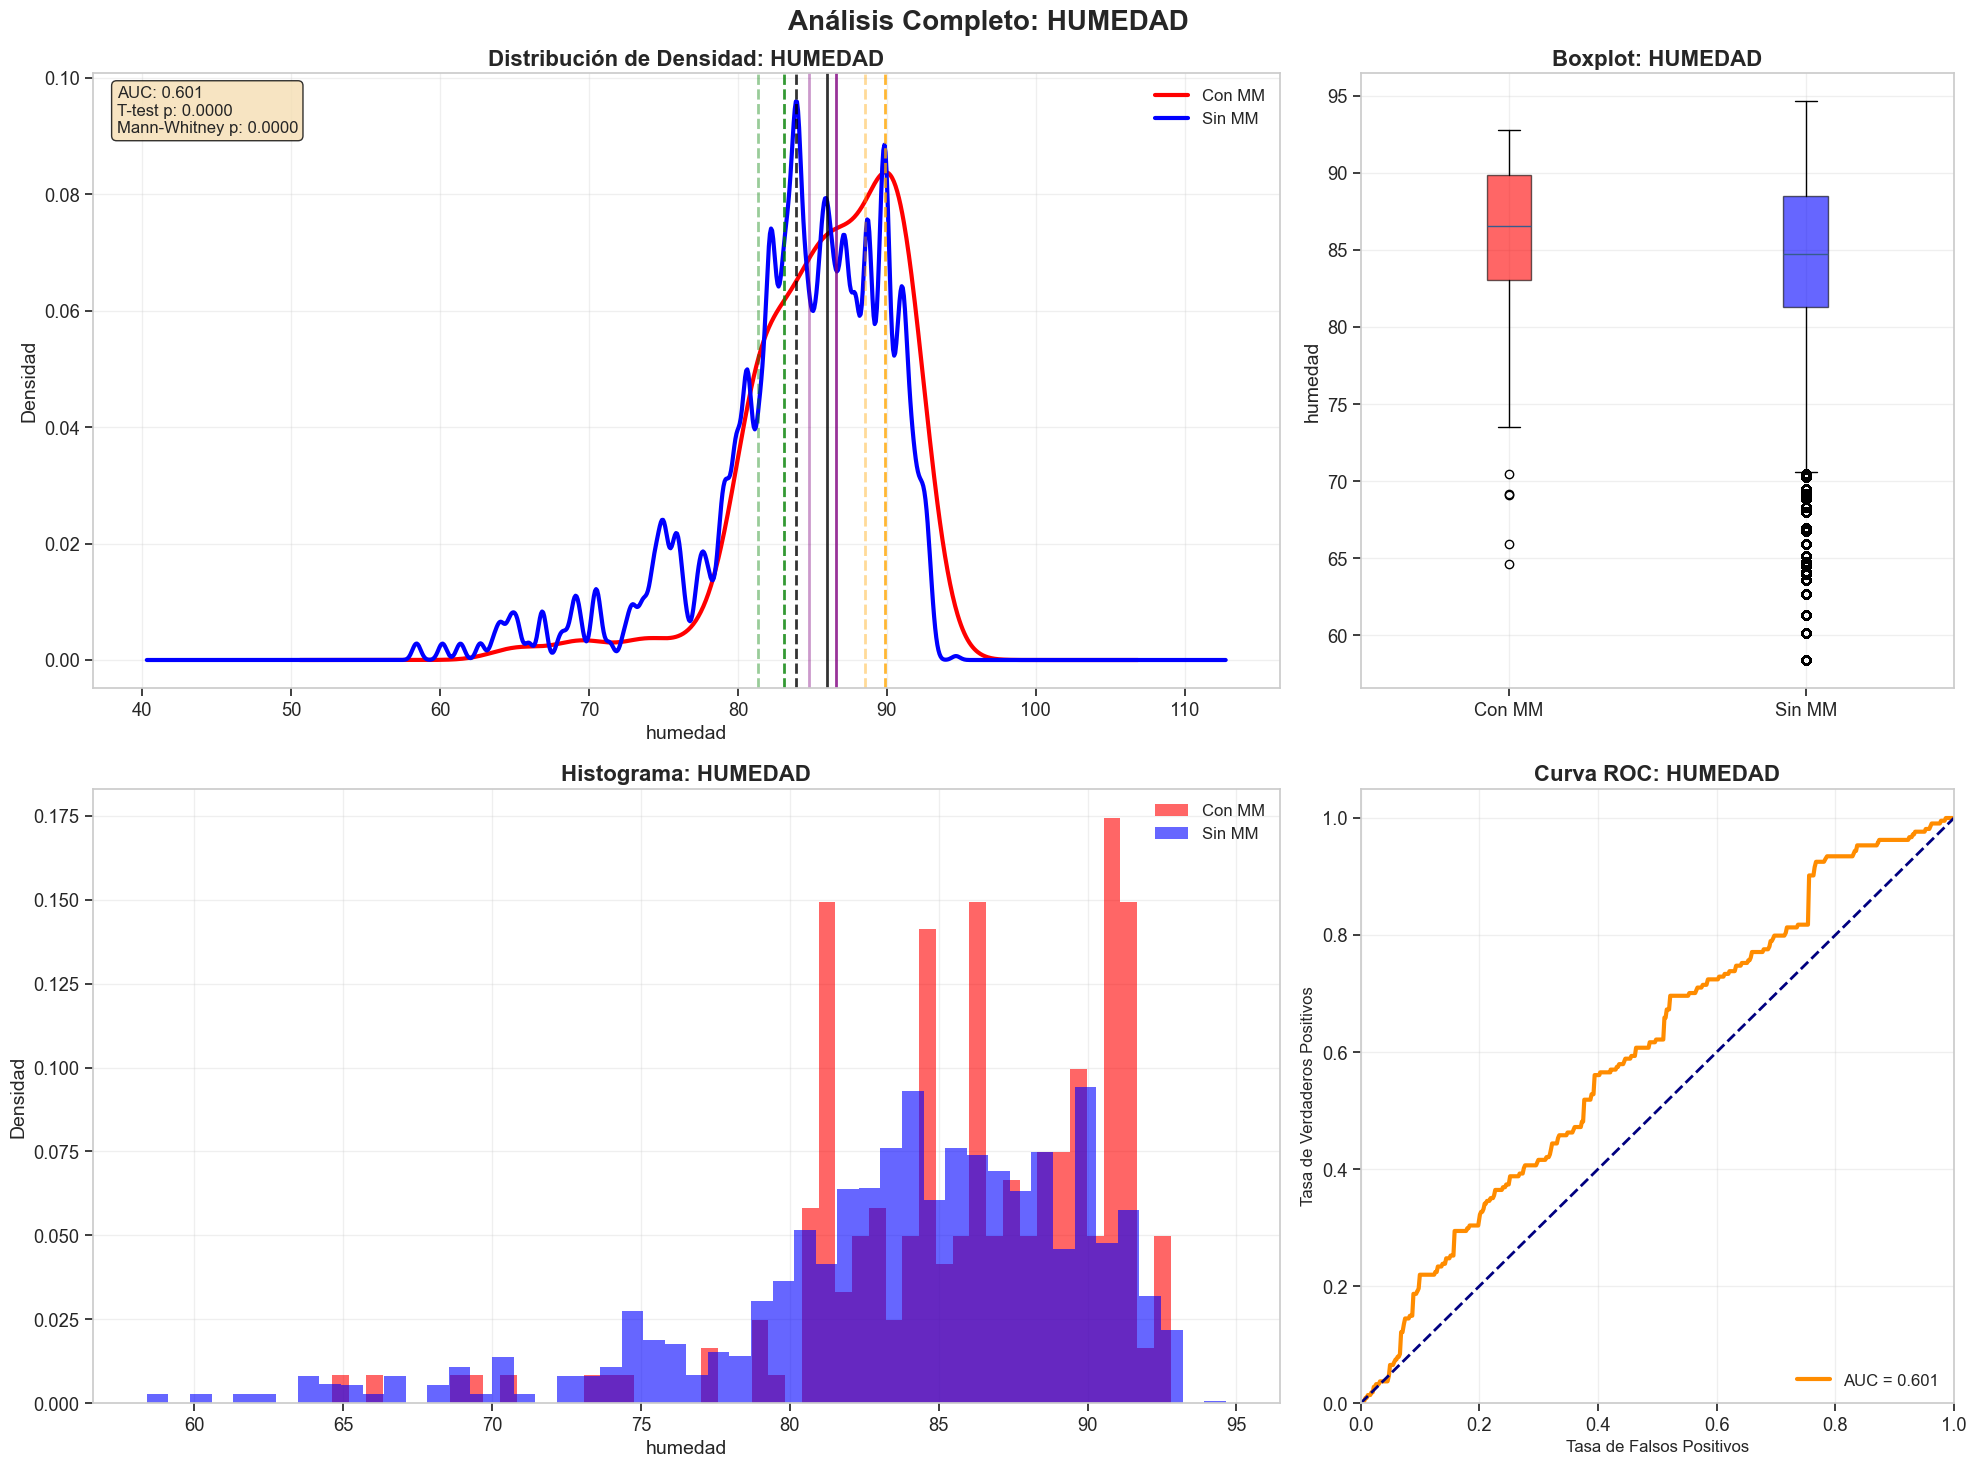

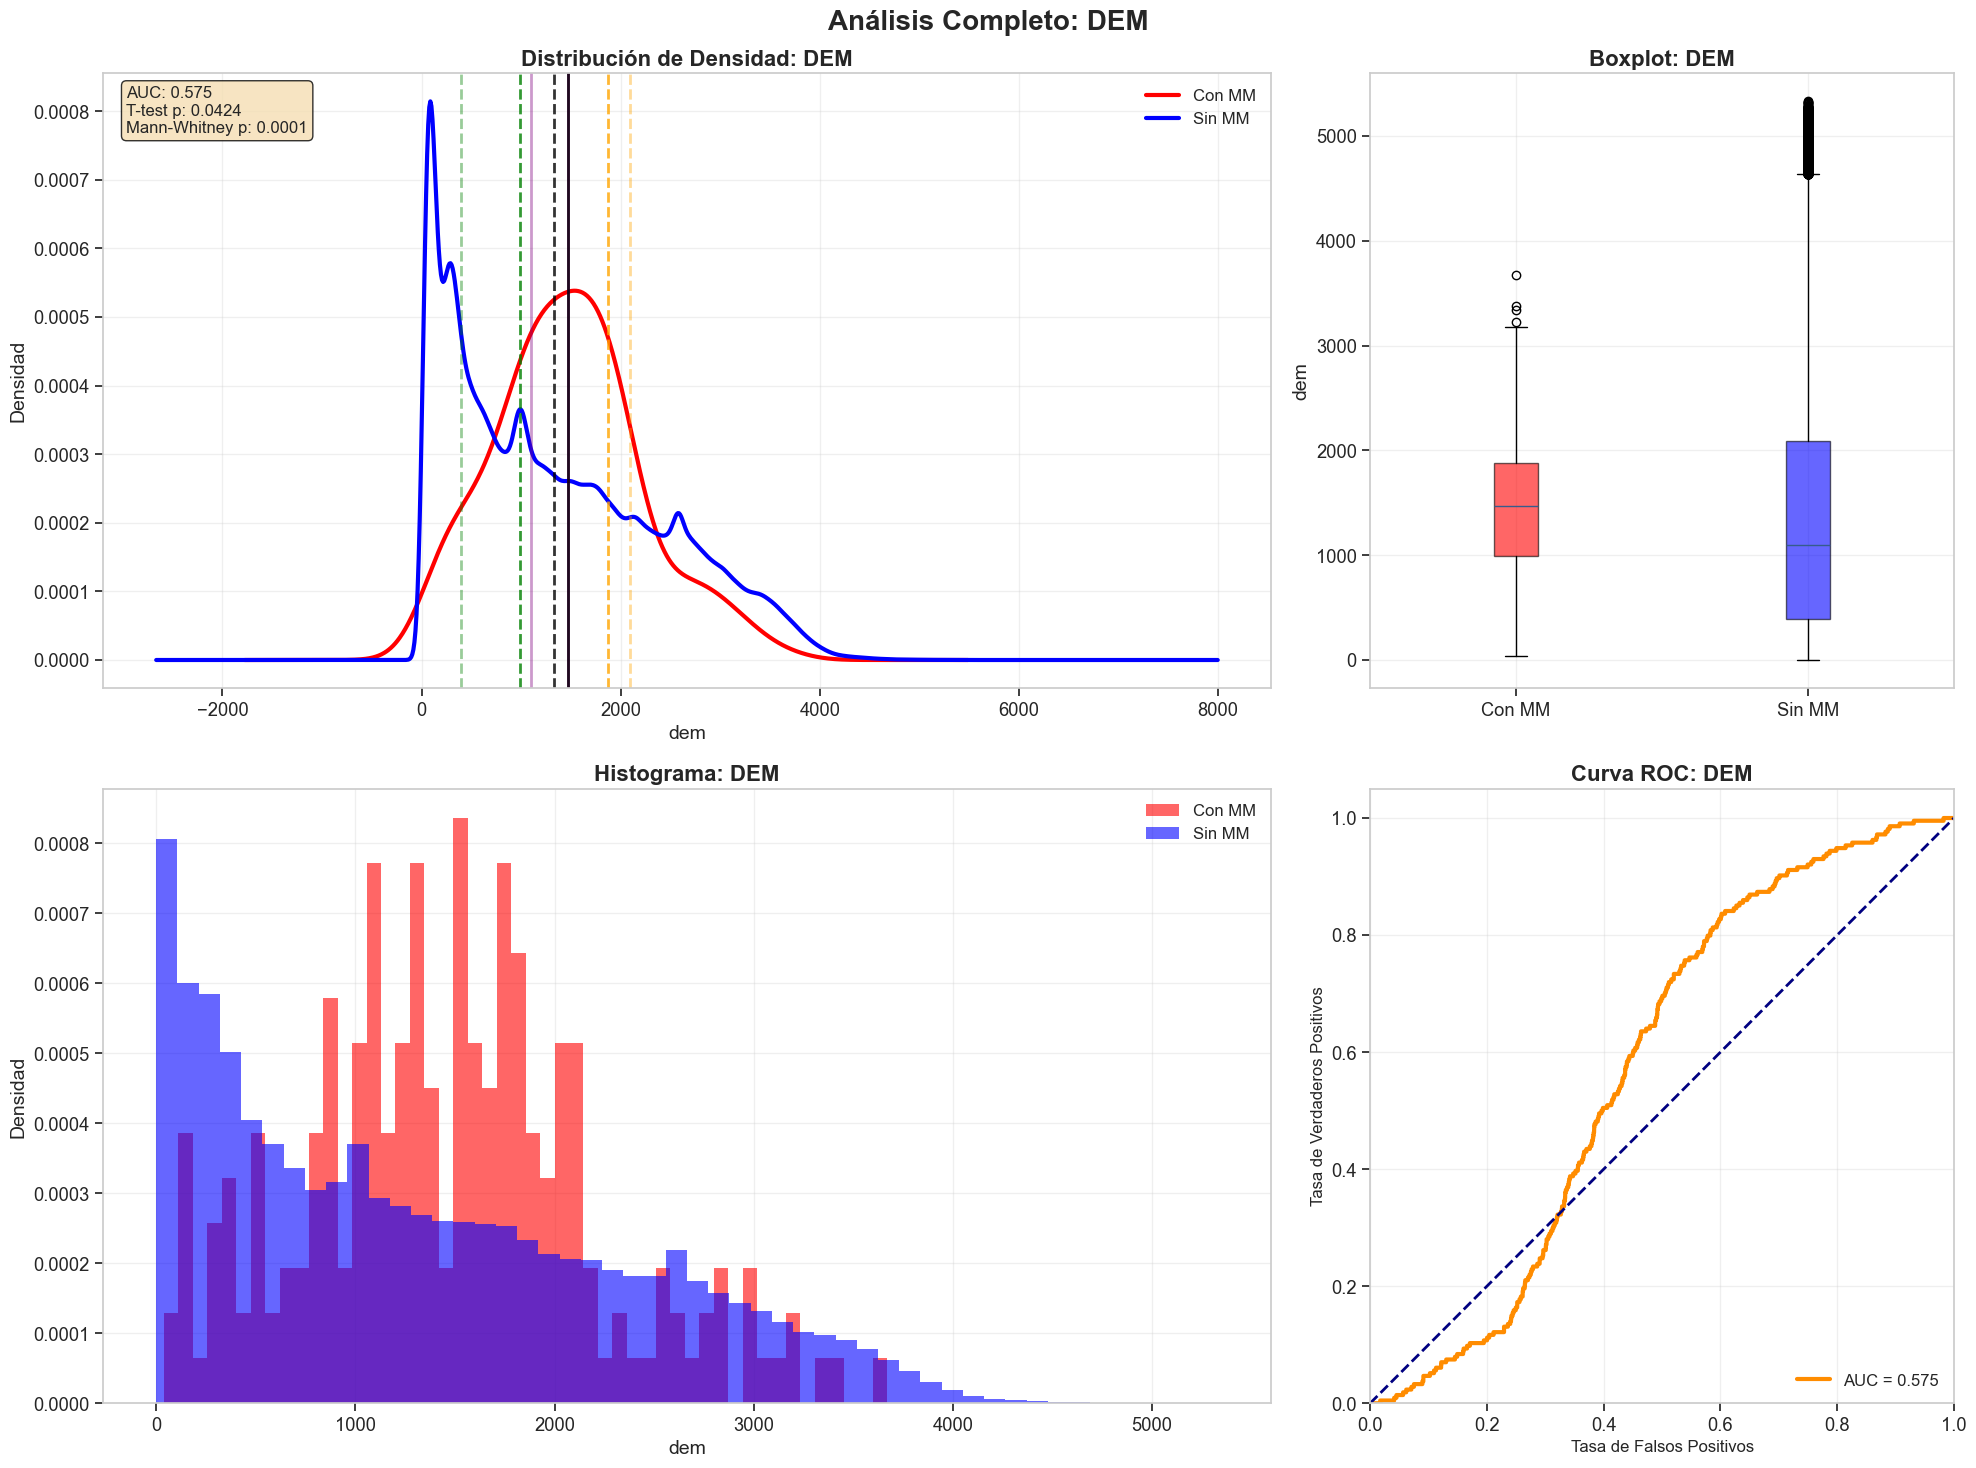

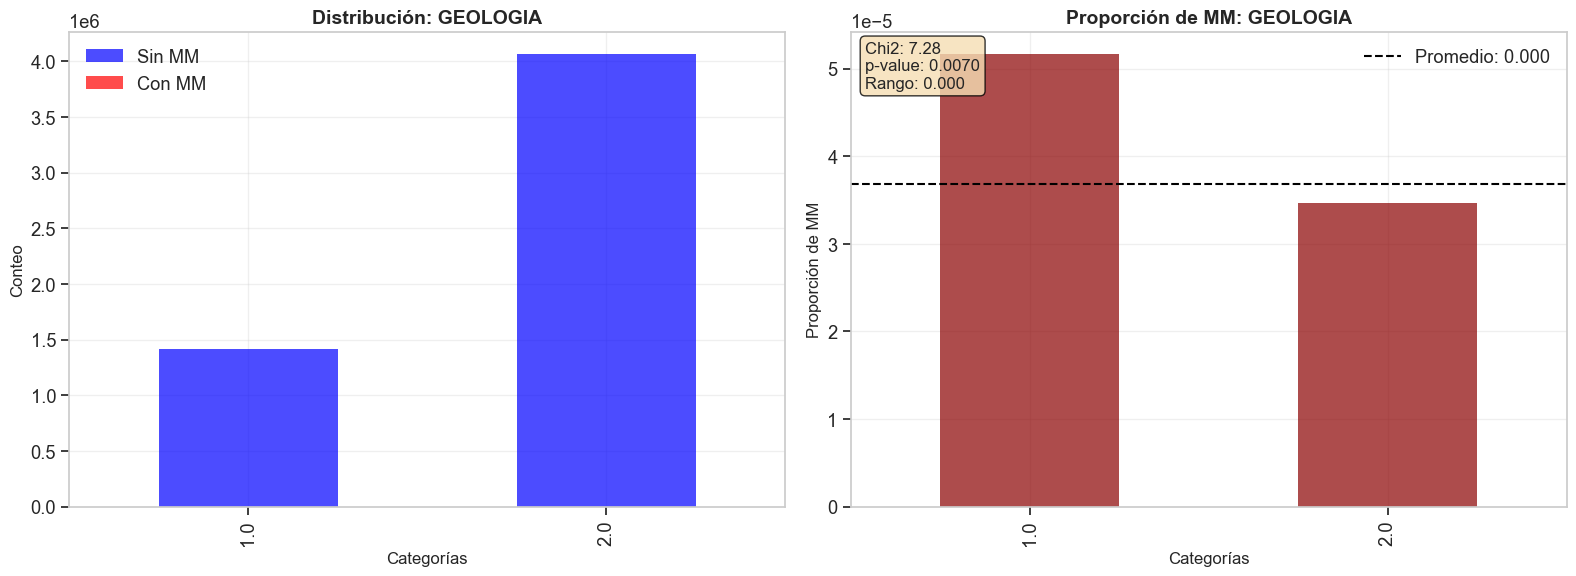

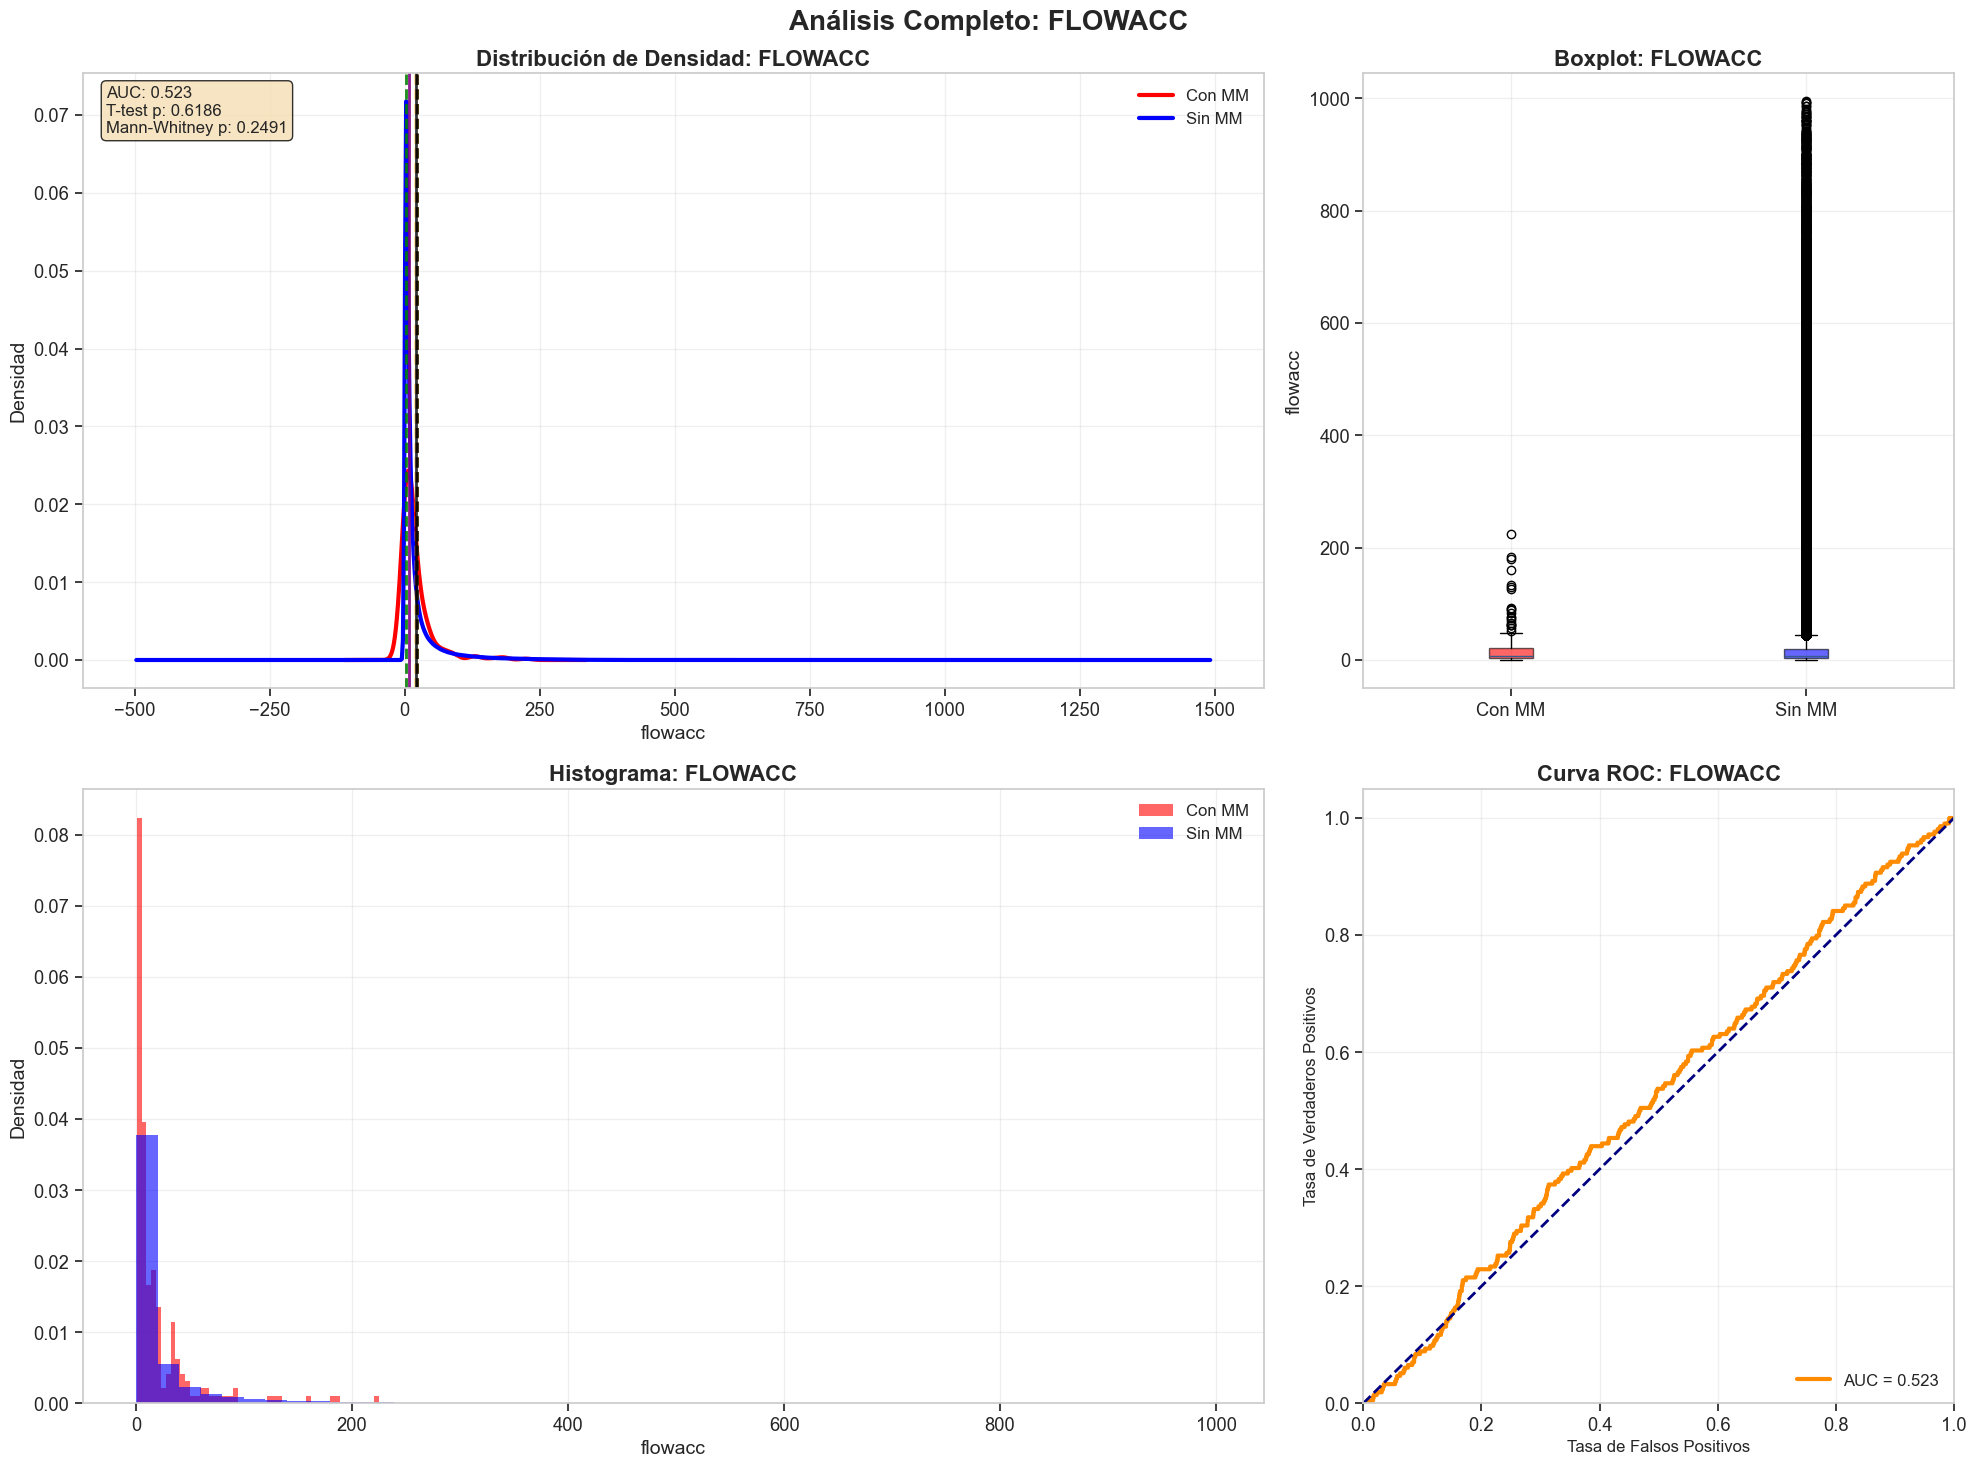

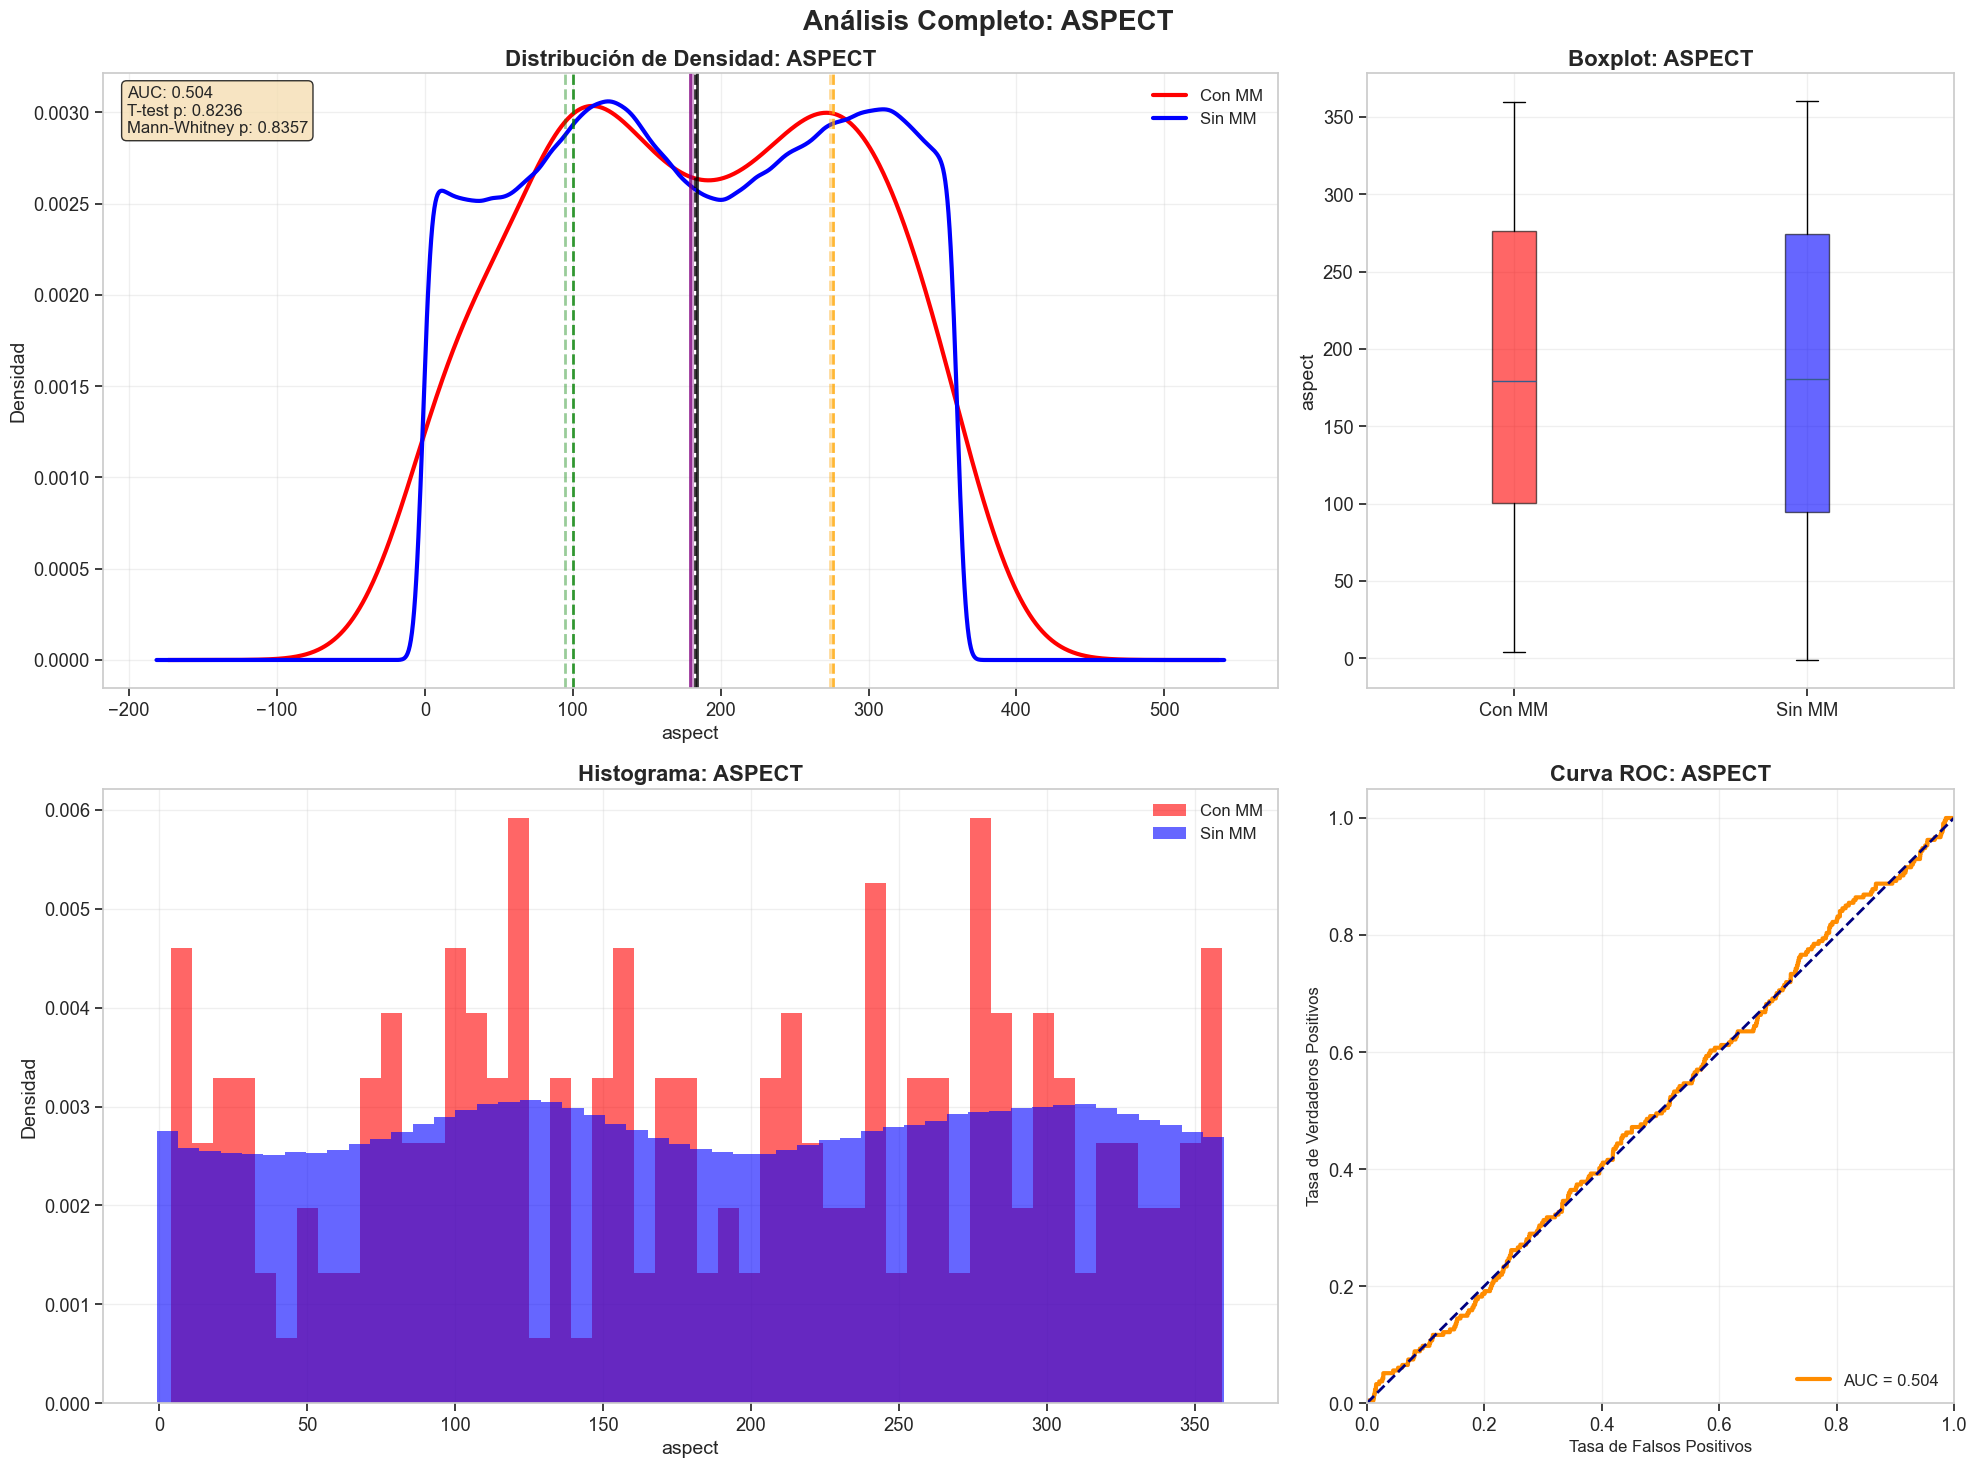

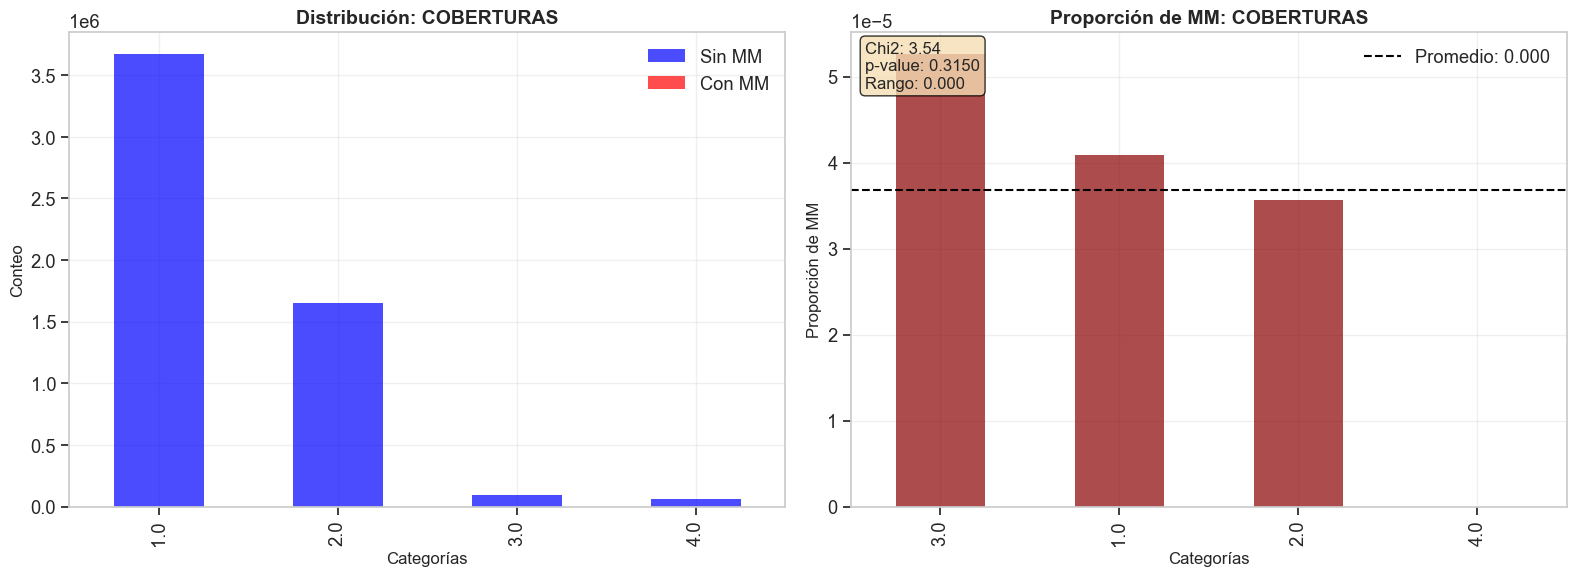

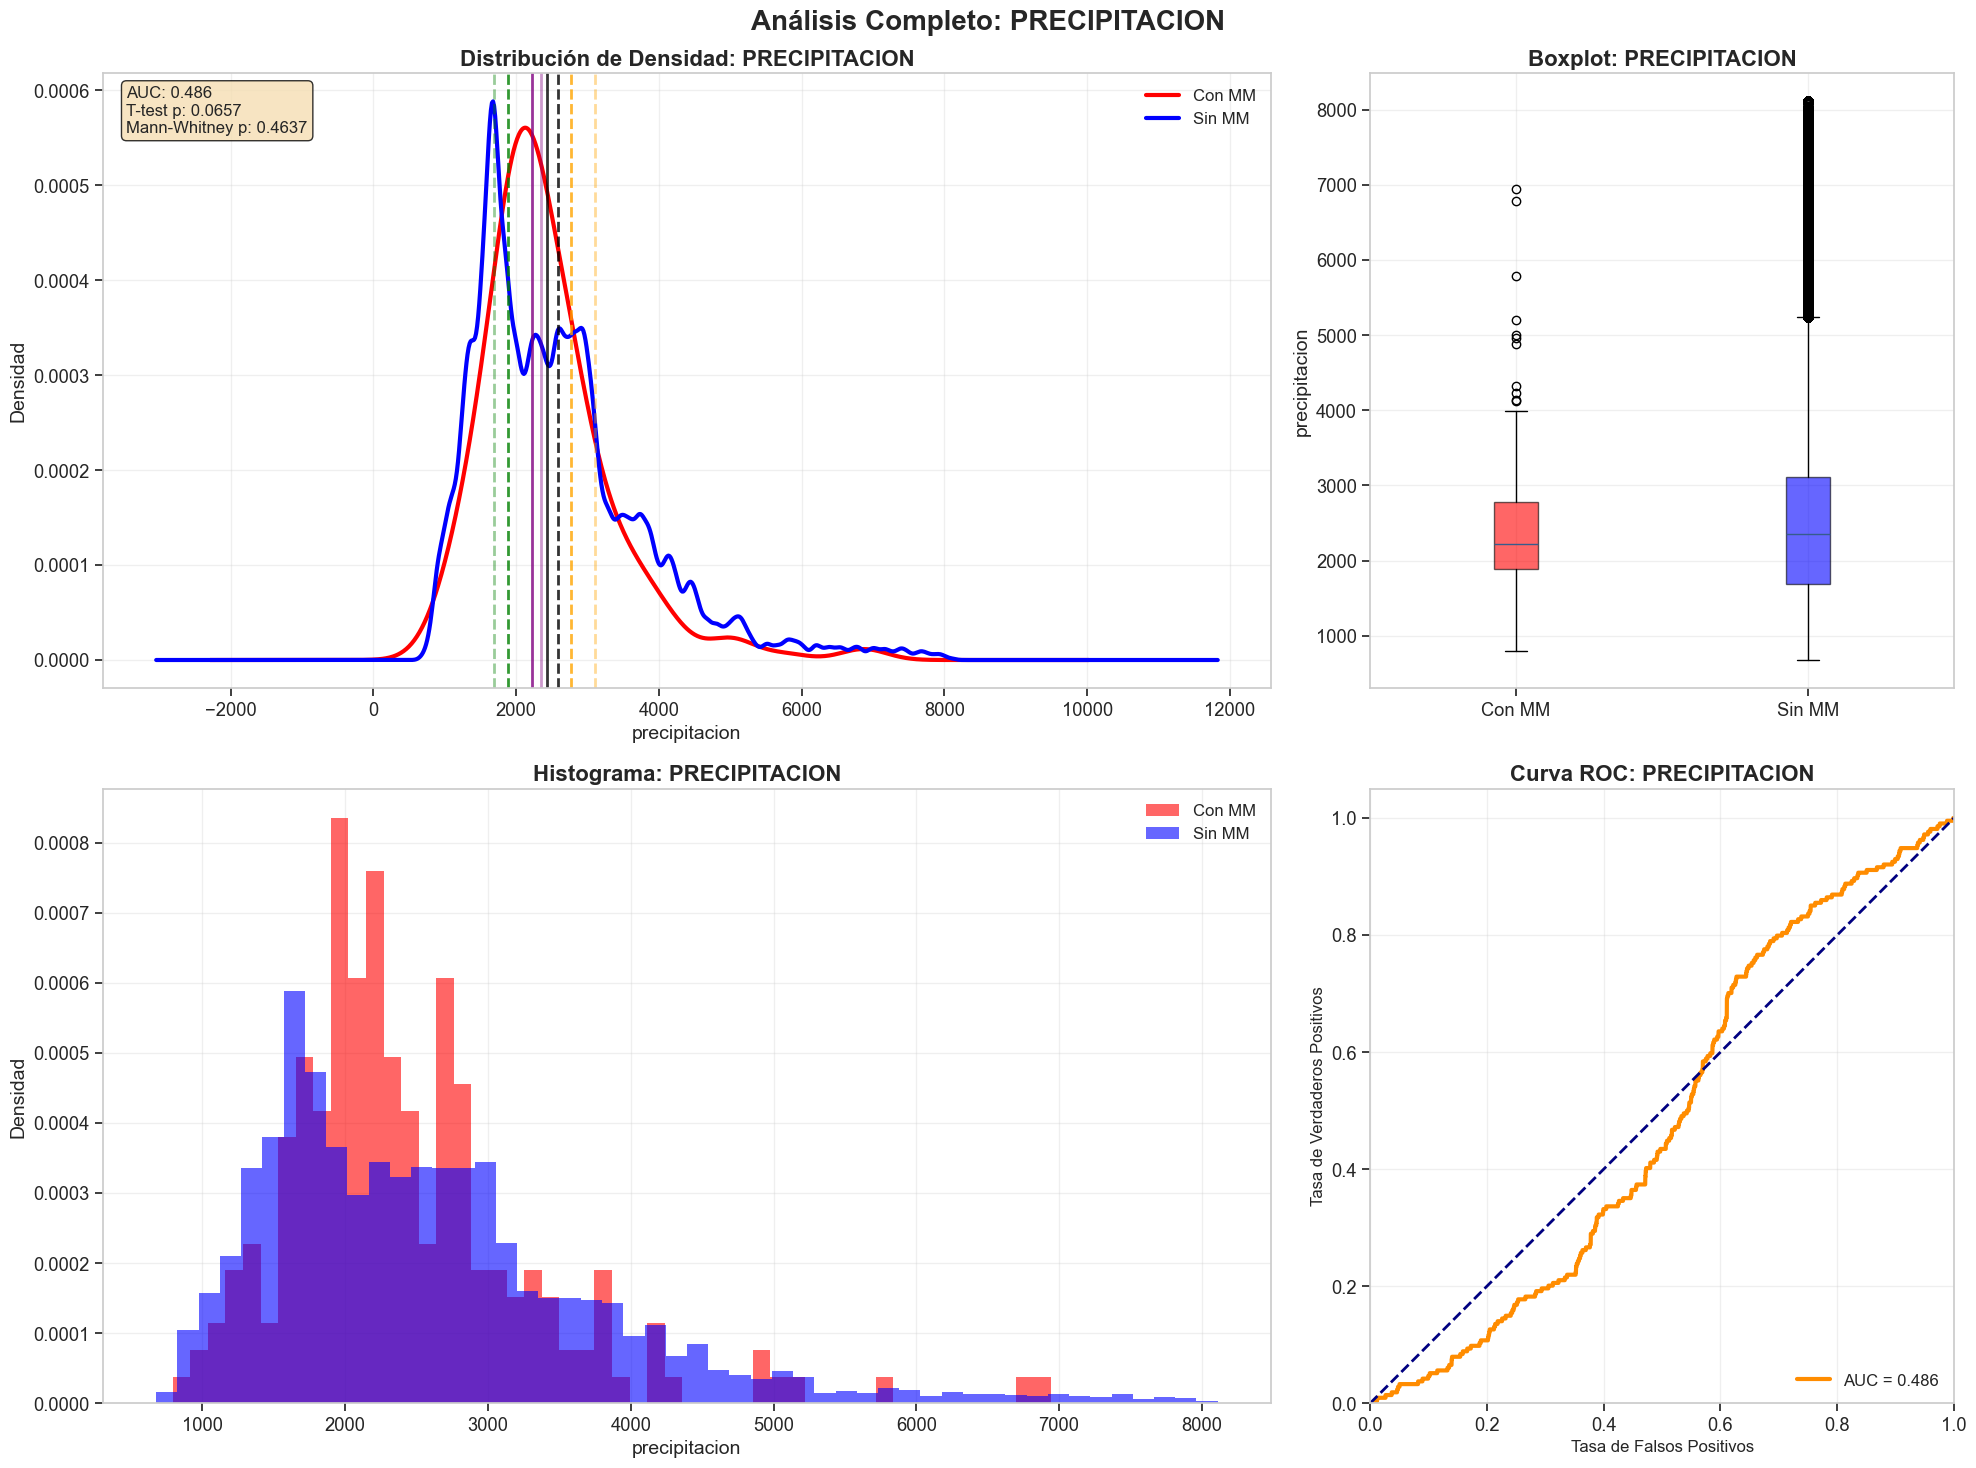


SISTEMA DE SELECCIÓN DE VARIABLES

VARIABLES DISPONIBLES PARA SELECCIÓN:
--------------------------------------------------
 1. rem_512m             (Tipo: numérica   , AUC: 0.636, Significativa: Sí)
 2. slope                (Tipo: numérica   , AUC: 0.627, Significativa: Sí)
 3. humedad              (Tipo: numérica   , AUC: 0.601, Significativa: Sí)
 4. dem                  (Tipo: numérica   , AUC: 0.575, Significativa: Sí)
 5. geologia             (Tipo: categórica , AUC: 0.500, Significativa: Sí)
 6. flowacc              (Tipo: numérica   , AUC: 0.523, Significativa: No)
 7. aspect               (Tipo: numérica   , AUC: 0.504, Significativa: No)
 8. coberturas           (Tipo: categórica , AUC: 0.500, Significativa: No)
 9. precipitacion        (Tipo: numérica   , AUC: 0.486, Significativa: No)

CONFIGURACIÓN DE SELECCIÓN DE VARIABLES

Para cada variable, cambie True por False si NO desea incluirla:
(Mantenga True para las variables que SÍ desea usar en el modelo)

-----------------

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, f_classif
import matplotlib.gridspec as gridspec
import os
import warnings
warnings.filterwarnings('ignore')

# Configuración estética
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
sns.set_context("notebook", font_scale=1.2)

# =============================================================================
# CÓDIGO 2: ANÁLISIS Y SELECCIÓN DE VARIABLES
# =============================================================================

print("="*60)
print("CÓDIGO 2: ANÁLISIS Y SELECCIÓN DE VARIABLES")
print("="*60)

# Configuración de rutas
ruta_base = r'E:\Trabajo\Congreso\Amenaza\Variables\Resample'
carpeta_analisis = os.path.join(ruta_base, 'Analisis_Variables')
carpeta_salida = os.path.join(ruta_base, 'Seleccion_Variables')
os.makedirs(carpeta_salida, exist_ok=True)

# Cargar DataFrame del Código 1
archivo_df = os.path.join(carpeta_analisis, 'dataframe_completo.pkl')
if not os.path.exists(archivo_df):
    print("ERROR: No se encontró el archivo del DataFrame. Ejecute primero el Código 1.")
    exit()

print("Cargando DataFrame del Código 1...")
df_combined = pd.read_pickle(archivo_df)
print(f"DataFrame cargado: {df_combined.shape}")

# Verificar que existe la variable inventario
if 'inventario' not in df_combined.columns:
    print("ERROR: No se encontró la variable 'inventario' en el DataFrame.")
    exit()

# Variables categóricas definidas
variables_categoricas = ['coberturas', 'suelos', 'geologia']


#=============================================================================
# Agregar al inicio de tu código original, después de cargar el DataFrame:
if len(df_combined) > 30_000_000:
    print("Dataset muy grande. Creando muestra estratificada...")
    
    # Separar por clase
    clase_0 = df_combined[df_combined['inventario'] == 0]
    clase_1 = df_combined[df_combined['inventario'] == 1]
    
    # Crear muestra de 1 millón manteniendo proporciones
    prop_clase_1 = len(clase_1) / len(df_combined)
    n_muestra = 6_000_000
    n_clase_1 = int(n_muestra * prop_clase_1)
    n_clase_0 = n_muestra - n_clase_1
    
    muestra_0 = clase_0.sample(n=min(n_clase_0, len(clase_0)), random_state=42)
    muestra_1 = clase_1.sample(n=min(n_clase_1, len(clase_1)), random_state=42)
    
    df_combined = pd.concat([muestra_0, muestra_1], ignore_index=True)
    df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)
    
    print(f"Muestra creada: {len(df_combined):,} observaciones")
# =============================================================================
# LIMPIEZA INICIAL DE DATOS
# =============================================================================

print(f"\n" + "="*50)
print("LIMPIEZA Y PREPARACIÓN DE DATOS")
print("="*50)

# Eliminar filas con inventario NaN
df_clean = df_combined.dropna(subset=['inventario']).copy()
print(f"Filas después de eliminar NaN en inventario: {len(df_clean):,}")

# Verificar distribución del inventario
print("\nDistribución del inventario:")
print(df_clean['inventario'].value_counts())

inventario_stats = {
    'total_celdas': len(df_clean),
    'con_movimiento': (df_clean['inventario'] == 1).sum(),
    'sin_movimiento': (df_clean['inventario'] == 0).sum()
}

print(f"\nEstadísticas del inventario:")
print(f"  Total: {inventario_stats['total_celdas']:,}")
print(f"  Con movimiento: {inventario_stats['con_movimiento']:,} ({inventario_stats['con_movimiento']/inventario_stats['total_celdas']*100:.2f}%)")
print(f"  Sin movimiento: {inventario_stats['sin_movimiento']:,} ({inventario_stats['sin_movimiento']/inventario_stats['total_celdas']*100:.2f}%)")

# =============================================================================
# ANÁLISIS POR VARIABLE
# =============================================================================

print(f"\n" + "="*50)
print("ANÁLISIS ESTADÍSTICO POR VARIABLE")
print("="*50)

# Separar datos por presencia de movimientos
si_lands = df_clean[df_clean['inventario'] == 1]
no_lands = df_clean[df_clean['inventario'] == 0]

print(f"Puntos con movimientos: {len(si_lands):,}")
print(f"Puntos sin movimientos: {len(no_lands):,}")

# Variables para análisis (excluir inventario)
variables_analisis = [col for col in df_clean.columns if col != 'inventario']
print(f"Variables a analizar: {len(variables_analisis)}")

# Identificar variables numéricas y categóricas
variables_numericas = [col for col in variables_analisis if col not in variables_categoricas]
variables_categoricas_disponibles = [col for col in variables_categoricas if col in variables_analisis]

print(f"Variables numéricas: {variables_numericas}")
print(f"Variables categóricas: {variables_categoricas_disponibles}")

# =============================================================================
# ANÁLISIS DE VARIABLES NUMÉRICAS
# =============================================================================

results_numericas = {}

print(f"\n{'='*80}")
print("ANÁLISIS DETALLADO - VARIABLES NUMÉRICAS")
print(f"{'='*80}")

for var in variables_numericas:
    print(f"\n{'-'*60}")
    print(f"VARIABLE: {var.upper()}")
    print(f"{'-'*60}")
    
    # Datos válidos para cada grupo
    data_si = si_lands[var].dropna()
    data_no = no_lands[var].dropna()
    
    if len(data_si) == 0 or len(data_no) == 0:
        print(f"  ADVERTENCIA: Datos insuficientes para {var}")
        continue
    
    # Estadísticas descriptivas
    stats_si = {
        'count': len(data_si),
        'mean': data_si.mean(),
        'median': data_si.median(),
        'std': data_si.std(),
        'min': data_si.min(),
        'max': data_si.max(),
        'q25': data_si.quantile(0.25),
        'q75': data_si.quantile(0.75)
    }
    
    stats_no = {
        'count': len(data_no),
        'mean': data_no.mean(),
        'median': data_no.median(),
        'std': data_no.std(),
        'min': data_no.min(),
        'max': data_no.max(),
        'q25': data_no.quantile(0.25),
        'q75': data_no.quantile(0.75)
    }
    
    # Pruebas estadísticas
    try:
        t_stat, p_val_t = stats.ttest_ind(data_si, data_no)
        u_stat, p_val_u = stats.mannwhitneyu(data_si, data_no, alternative='two-sided')
        ks_stat, p_val_ks = stats.ks_2samp(data_si, data_no)
    except Exception as e:
        print(f"  Error en pruebas estadísticas: {e}")
        continue
    
    # Curva ROC individual
    try:
        data_all = df_clean[var].dropna()
        y_all = df_clean.loc[data_all.index, 'inventario']
        fpr, tpr, _ = roc_curve(y_all, data_all)
        auc_score = auc(fpr, tpr)
    except:
        auc_score = 0.5
    
    # Guardar resultados
    results_numericas[var] = {
        'stats_con_mm': stats_si,
        'stats_sin_mm': stats_no,
        't_stat': t_stat,
        'p_val_t': p_val_t,
        'u_stat': u_stat,
        'p_val_u': p_val_u,
        'ks_stat': ks_stat,
        'p_val_ks': p_val_ks,
        'auc_score': auc_score,
        'diferencia_media': stats_si['mean'] - stats_no['mean'],
        'diferencia_mediana': stats_si['median'] - stats_no['median']
    }
    
    # Mostrar resultados
    print(f"  ESTADÍSTICAS DESCRIPTIVAS:")
    print(f"    Con MM - Media: {stats_si['mean']:.4f}, Mediana: {stats_si['median']:.4f}, Std: {stats_si['std']:.4f}")
    print(f"    Sin MM - Media: {stats_no['mean']:.4f}, Mediana: {stats_no['median']:.4f}, Std: {stats_no['std']:.4f}")
    print(f"    Diferencia de medias: {results_numericas[var]['diferencia_media']:.4f}")
    
    print(f"  PRUEBAS ESTADÍSTICAS:")
    significancia_t = "***" if p_val_t < 0.001 else "**" if p_val_t < 0.01 else "*" if p_val_t < 0.05 else ""
    significancia_u = "***" if p_val_u < 0.001 else "**" if p_val_u < 0.01 else "*" if p_val_u < 0.05 else ""
    significancia_ks = "***" if p_val_ks < 0.001 else "**" if p_val_ks < 0.01 else "*" if p_val_ks < 0.05 else ""
    
    print(f"    T-test: t={t_stat:.4f}, p-value={p_val_t:.6f} {significancia_t}")
    print(f"    Mann-Whitney: U={u_stat:.0f}, p-value={p_val_u:.6f} {significancia_u}")
    print(f"    Kolmogorov-Smirnov: KS={ks_stat:.4f}, p-value={p_val_ks:.6f} {significancia_ks}")
    print(f"    AUC (ROC): {auc_score:.4f}")
    
    # Interpretación del poder discriminativo
    if auc_score >= 0.7:
        interpretacion = "EXCELENTE poder discriminativo"
    elif auc_score >= 0.6:
        interpretacion = "BUENO poder discriminativo"
    elif auc_score >= 0.55:
        interpretacion = "MODERADO poder discriminativo"
    else:
        interpretacion = "BAJO poder discriminativo"
    
    print(f"    Interpretación: {interpretacion}")
    
    # Sugerir umbrales si es significativa
    if p_val_t < 0.05 or p_val_u < 0.05:
        direction = "altos" if stats_si['mean'] > stats_no['mean'] else "bajos"
        print(f"  CATEGORIZACIÓN SUGERIDA (valores {direction} = mayor riesgo):")
        
        # Usar percentiles de toda la población
        all_data = df_clean[var].dropna()
        percentiles = np.percentile(all_data, [20, 40, 60, 80])
        
        if direction == "altos":
            print(f"    Muy Bajo: < {percentiles[0]:.3f}")
            print(f"    Bajo: {percentiles[0]:.3f} - {percentiles[1]:.3f}")
            print(f"    Moderado: {percentiles[1]:.3f} - {percentiles[2]:.3f}")
            print(f"    Alto: {percentiles[2]:.3f} - {percentiles[3]:.3f}")
            print(f"    Muy Alto: > {percentiles[3]:.3f}")
        else:
            print(f"    Muy Bajo: > {percentiles[3]:.3f}")
            print(f"    Bajo: {percentiles[2]:.3f} - {percentiles[3]:.3f}")
            print(f"    Moderado: {percentiles[1]:.3f} - {percentiles[2]:.3f}")
            print(f"    Alto: {percentiles[0]:.3f} - {percentiles[1]:.3f}")
            print(f"    Muy Alto: < {percentiles[0]:.3f}")

# =============================================================================
# ANÁLISIS DE VARIABLES CATEGÓRICAS
# =============================================================================

results_categoricas = {}

if variables_categoricas_disponibles:
    print(f"\n{'='*80}")
    print("ANÁLISIS DETALLADO - VARIABLES CATEGÓRICAS")
    print(f"{'='*80}")
    
    for var in variables_categoricas_disponibles:
        print(f"\n{'-'*60}")
        print(f"VARIABLE CATEGÓRICA: {var.upper()}")
        print(f"{'-'*60}")
        
        # Datos válidos
        data_clean = df_clean.dropna(subset=[var])
        
        if len(data_clean) == 0:
            print(f"  ADVERTENCIA: No hay datos válidos para {var}")
            continue
        
        # Tabla de contingencia
        contingency_table = pd.crosstab(data_clean[var], data_clean['inventario'])
        
        # Chi-cuadrado
        try:
            chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency_table)
        except Exception as e:
            print(f"  Error en chi-cuadrado: {e}")
            continue
        
        # Proporciones de MM por categoría
        total_counts = contingency_table.sum(axis=1)
        proportions = contingency_table[1] / total_counts
        proportions = proportions.fillna(0)  # En caso de divisiones por 0
        
        # Ordenar por proporción
        sorted_props = proportions.sort_values(ascending=False)
        
        results_categoricas[var] = {
            'chi2': chi2,
            'p_chi2': p_chi2,
            'contingency_table': contingency_table,
            'proportions': proportions,
            'n_categories': len(proportions),
            'max_proportion': proportions.max(),
            'min_proportion': proportions.min(),
            'range_proportion': proportions.max() - proportions.min()
        }
        
        print(f"  ESTADÍSTICAS:")
        print(f"    Categorías únicas: {len(proportions)}")
        print(f"    Chi-cuadrado: {chi2:.4f}, p-value: {p_chi2:.6f} {'***' if p_chi2 < 0.001 else '**' if p_chi2 < 0.01 else '*' if p_chi2 < 0.05 else ''}")
        print(f"    Rango de proporciones MM: {proportions.min():.3f} - {proportions.max():.3f}")
        
        print(f"  PROPORCIÓN DE MM POR CATEGORÍA:")
        for cat, prop in sorted_props.head(10).items():  # Top 10
            count_mm = contingency_table.loc[cat, 1] if cat in contingency_table.index and 1 in contingency_table.columns else 0
            count_total = total_counts.loc[cat] if cat in total_counts.index else 0
            print(f"    Categoría {cat}: {prop:.3f} ({count_mm}/{count_total})")
        
        if len(sorted_props) > 10:
            print(f"    ... y {len(sorted_props)-10} categorías más")

# =============================================================================
# RANKING DE VARIABLES
# =============================================================================

print(f"\n{'='*80}")
print("RANKING DE VARIABLES POR IMPORTANCIA")
print(f"{'='*80}")

# Preparar datos para ranking
ranking_data = []

# Variables numéricas
for var, results in results_numericas.items():
    ranking_data.append({
        'variable': var,
        'tipo': 'numérica',
        'auc_score': results['auc_score'],
        'p_value_min': min(results['p_val_t'], results['p_val_u']),
        'significativa': min(results['p_val_t'], results['p_val_u']) < 0.05,
        'abs_diferencia_media': abs(results['diferencia_media'])
    })

# Variables categóricas
for var, results in results_categoricas.items():
    # Calcular AUC aproximado para categóricas usando la proporción
    auc_aprox = 0.5 + (results['range_proportion'] / 2)  # Aproximación simple
    
    ranking_data.append({
        'variable': var,
        'tipo': 'categórica',
        'auc_score': auc_aprox,
        'p_value_min': results['p_chi2'],
        'significativa': results['p_chi2'] < 0.05,
        'abs_diferencia_media': results['range_proportion']
    })

# Crear DataFrame de ranking
ranking_df = pd.DataFrame(ranking_data)

# Ordenar por AUC y significancia
ranking_df = ranking_df.sort_values(['significativa', 'auc_score'], ascending=[False, False])

print("RANKING POR PODER DISCRIMINATIVO (AUC):")
print("-" * 70)
print(f"{'Rank':<4} {'Variable':<20} {'Tipo':<12} {'AUC':<8} {'p-value':<12} {'Signif.'}")
print("-" * 70)

for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
    signif = "***" if row['p_value_min'] < 0.001 else "**" if row['p_value_min'] < 0.01 else "*" if row['p_value_min'] < 0.05 else ""
    print(f"{i:<4} {row['variable']:<20} {row['tipo']:<12} {row['auc_score']:<8.3f} {row['p_value_min']:<12.6f} {signif}")

# =============================================================================
# ANÁLISIS DE INFORMACIÓN MUTUA Y F-SCORES
# =============================================================================

print(f"\n{'='*50}")
print("ANÁLISIS DE CARACTERÍSTICAS AVANZADO")
print("="*50)

# Preparar datos numéricos para análisis
variables_para_analisis = variables_numericas.copy()
X_numeric = df_clean[variables_para_analisis].copy()

# Eliminar filas con NaN
X_numeric_clean = X_numeric.dropna()
y_clean = df_clean.loc[X_numeric_clean.index, 'inventario']

print(f"Datos para análisis avanzado: {len(X_numeric_clean):,} filas")

if len(X_numeric_clean) > 0 and len(variables_para_analisis) > 0:
    # Normalizar datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric_clean)
    
    # Información mutua
    mi_scores = mutual_info_classif(X_scaled, y_clean, random_state=42)
    mi_df = pd.DataFrame({
        'variable': variables_para_analisis,
        'mutual_info': mi_scores
    }).sort_values('mutual_info', ascending=False)
    
    # F-scores
    f_scores, f_p_values = f_classif(X_scaled, y_clean)
    f_df = pd.DataFrame({
        'variable': variables_para_analisis,
        'f_score': f_scores,
        'f_p_value': f_p_values
    }).sort_values('f_score', ascending=False)
    
    print("\nRANKING POR INFORMACIÓN MUTUA:")
    print("-" * 40)
    for i, (_, row) in enumerate(mi_df.iterrows(), 1):
        print(f"{i:2d}. {row['variable']:<20}: {row['mutual_info']:.4f}")
    
    print("\nRANKING POR F-SCORE:")
    print("-" * 50)
    for i, (_, row) in enumerate(f_df.iterrows(), 1):
        signif = "***" if row['f_p_value'] < 0.001 else "**" if row['f_p_value'] < 0.01 else "*" if row['f_p_value'] < 0.05 else ""
        print(f"{i:2d}. {row['variable']:<20}: {row['f_score']:.2f} (p={row['f_p_value']:.6f}) {signif}")

# =============================================================================
# GENERACIÓN DE GRÁFICOS COMPARATIVOS
# =============================================================================

print(f"\n{'='*50}")
print("GENERANDO GRÁFICOS COMPARATIVOS")
print("="*50)

# Crear gráficos para las variables más importantes
top_variables = ranking_df.head(10)['variable'].tolist()

for var in top_variables:
    if var in variables_numericas:
        # Gráfico completo para variables numéricas
        fig = plt.figure(figsize=(20, 15))
        gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[2, 1])
        
        data_si = si_lands[var].dropna()
        data_no = no_lands[var].dropna()
        
        if len(data_si) == 0 or len(data_no) == 0:
            continue
        
        # 1. Densidad KDE
        ax1 = plt.subplot(gs[0, 0])
        data_si.plot.kde(ax=ax1, label='Con MM', color='red', linewidth=3)
        data_no.plot.kde(ax=ax1, label='Sin MM', color='blue', linewidth=3)
        
        # Líneas de percentiles
        for perc, color, style in zip([25, 50, 75], ['green', 'purple', 'orange'], ['--', '-', '--']):
            si_val = np.percentile(data_si, perc)
            no_val = np.percentile(data_no, perc)
            ax1.axvline(x=si_val, color=color, linestyle=style, alpha=0.8, linewidth=2)
            ax1.axvline(x=no_val, color=color, linestyle=style, alpha=0.4, linewidth=2)
        
        ax1.axvline(x=data_si.mean(), color='black', linestyle='-', alpha=0.8, linewidth=2)
        ax1.axvline(x=data_no.mean(), color='black', linestyle='--', alpha=0.8, linewidth=2)
        
        ax1.set_title(f'Distribución de Densidad: {var.upper()}', fontsize=16, fontweight='bold')
        ax1.set_xlabel(var, fontsize=14)
        ax1.set_ylabel('Densidad', fontsize=14)
        ax1.legend(fontsize=12)
        ax1.grid(True, alpha=0.3)
        
        # Agregar estadísticas
        results = results_numericas[var]
        textstr = f"AUC: {results['auc_score']:.3f}\nT-test p: {results['p_val_t']:.4f}\nMann-Whitney p: {results['p_val_u']:.4f}"
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
        ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
        
        # 2. Boxplots
        ax2 = plt.subplot(gs[0, 1])
        boxdata = [data_si, data_no]
        bp = ax2.boxplot(boxdata, patch_artist=True, labels=['Con MM', 'Sin MM'])
        colors = ['red', 'blue']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.6)
        ax2.set_title(f'Boxplot: {var.upper()}', fontsize=16, fontweight='bold')
        ax2.set_ylabel(var, fontsize=14)
        ax2.grid(True, alpha=0.3)
        
        # 3. Histogramas superpuestos
        ax3 = plt.subplot(gs[1, 0])
        ax3.hist(data_si, bins=50, alpha=0.6, color='red', density=True, label='Con MM')
        ax3.hist(data_no, bins=50, alpha=0.6, color='blue', density=True, label='Sin MM')
        ax3.set_title(f'Histograma: {var.upper()}', fontsize=16, fontweight='bold')
        ax3.set_xlabel(var, fontsize=14)
        ax3.set_ylabel('Densidad', fontsize=14)
        ax3.legend(fontsize=12)
        ax3.grid(True, alpha=0.3)
        
        # 4. Curva ROC
        ax4 = plt.subplot(gs[1, 1])
        data_all = df_clean[var].dropna()
        y_all = df_clean.loc[data_all.index, 'inventario']
        fpr, tpr, thresholds = roc_curve(y_all, data_all)
        roc_auc = auc(fpr, tpr)
        
        ax4.plot(fpr, tpr, color='darkorange', lw=3, label=f'AUC = {roc_auc:.3f}')
        ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax4.set_xlim([0.0, 1.0])
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Tasa de Falsos Positivos', fontsize=12)
        ax4.set_ylabel('Tasa de Verdaderos Positivos', fontsize=12)
        ax4.set_title(f'Curva ROC: {var.upper()}', fontsize=16, fontweight='bold')
        ax4.legend(loc="lower right", fontsize=12)
        ax4.grid(True, alpha=0.3)
        
        plt.suptitle(f'Análisis Completo: {var.upper()}', fontsize=20, fontweight='bold')
        plt.tight_layout()
        plt.savefig(os.path.join(carpeta_salida, f'analisis_{var}.png'), dpi=300, bbox_inches='tight')
        plt.show()
    
    elif var in variables_categoricas_disponibles:
        # Gráfico para variables categóricas
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        data_clean = df_clean.dropna(subset=[var])
        contingency_table = pd.crosstab(data_clean[var], data_clean['inventario'])
        total_counts = contingency_table.sum(axis=1)
        proportions = contingency_table[1] / total_counts
        
        # Gráfico de barras apiladas
        contingency_table.plot(kind='bar', stacked=True, ax=ax1, color=['blue', 'red'], alpha=0.7)
        ax1.set_title(f'Distribución: {var.upper()}', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Categorías', fontsize=12)
        ax1.set_ylabel('Conteo', fontsize=12)
        ax1.legend(['Sin MM', 'Con MM'])
        ax1.grid(True, alpha=0.3)
        
        # Gráfico de proporciones
        proportions.sort_values(ascending=False).plot(kind='bar', ax=ax2, color='darkred', alpha=0.7)
        ax2.set_title(f'Proporción de MM: {var.upper()}', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Categorías', fontsize=12)
        ax2.set_ylabel('Proporción de MM', fontsize=12)
        ax2.grid(True, alpha=0.3)
        
        # Línea promedio
        avg_mm = df_clean['inventario'].mean()
        ax2.axhline(y=avg_mm, color='black', linestyle='--', 
                   label=f'Promedio: {avg_mm:.3f}')
        ax2.legend()
        
        # Agregar estadísticas
        results = results_categoricas[var]
        textstr = f"Chi2: {results['chi2']:.2f}\np-value: {results['p_chi2']:.4f}\nRango: {results['range_proportion']:.3f}"
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
        ax2.text(0.02, 0.98, textstr, transform=ax2.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
        
        plt.tight_layout()
        plt.savefig(os.path.join(carpeta_salida, f'analisis_categorico_{var}.png'), dpi=300, bbox_inches='tight')
        plt.show()

# =============================================================================
# SISTEMA DE SELECCIÓN DE VARIABLES
# =============================================================================

print(f"\n{'='*80}")
print("SISTEMA DE SELECCIÓN DE VARIABLES")
print("="*80)

print("\nVARIABLES DISPONIBLES PARA SELECCIÓN:")
print("-" * 50)

# Mostrar todas las variables con su información
variables_seleccionables = []
for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
    var = row['variable']
    tipo = row['tipo']
    auc = row['auc_score']
    signif = "Sí" if row['significativa'] else "No"
    
    print(f"{i:2d}. {var:<20} (Tipo: {tipo:<11}, AUC: {auc:.3f}, Significativa: {signif})")
    variables_seleccionables.append(var)

print(f"\n{'='*60}")
print("CONFIGURACIÓN DE SELECCIÓN DE VARIABLES")
print("="*60)

# Sistema de selección por True/False
seleccion_variables = {}

print("\nPara cada variable, cambie True por False si NO desea incluirla:")
print("(Mantenga True para las variables que SÍ desea usar en el modelo)")
print("\n" + "-"*60)

# Configuración inicial - Las 5 mejores automáticamente en True
top_5_variables = ranking_df.head(5)['variable'].tolist()

for var in variables_seleccionables:
    # Por defecto, las 5 mejores están seleccionadas
    if var in top_5_variables:
        seleccion_variables[var] = True
        print(f"{var:<20} = True   # (Top 5 - Recomendada)")
    else:
        seleccion_variables[var] = False
        print(f"{var:<20} = False")

print(f"\n{'='*60}")
print("VARIABLES SELECCIONADAS PARA EL MODELO")
print("="*60)

# Filtrar variables seleccionadas
variables_seleccionadas = [var for var, selected in seleccion_variables.items() if selected]

print(f"Número de variables seleccionadas: {len(variables_seleccionadas)}")

if len(variables_seleccionadas) != 5:
    print(f"\nADVERTENCIA: Se seleccionaron {len(variables_seleccionadas)} variables.")
    print(f"Se recomienda usar exactamente 5 variables para el modelo.")
    
    if len(variables_seleccionadas) > 5:
        print("Se usarán las primeras 5 variables seleccionadas:")
        variables_seleccionadas = variables_seleccionadas[:5]
    elif len(variables_seleccionadas) < 5:
        print("Se agregarán las siguientes mejores variables hasta completar 5:")
        variables_faltantes = 5 - len(variables_seleccionadas)
        variables_adicionales = [var for var in top_5_variables if var not in variables_seleccionadas][:variables_faltantes]
        variables_seleccionadas.extend(variables_adicionales)

print(f"\nVARIABLES FINALES PARA EL MODELO (5 variables):")
print("-" * 50)
for i, var in enumerate(variables_seleccionadas, 1):
    row = ranking_df[ranking_df['variable'] == var].iloc[0]
    print(f"Var{i}: {var:<20} (Tipo: {row['tipo']:<11}, AUC: {row['auc_score']:.3f})")

# Renombrar variables para facilitar el modelado
mapeo_variables = {var: f"var{i}" for i, var in enumerate(variables_seleccionadas, 1)}
print(f"\nMAPEO DE VARIABLES:")
print("-" * 30)
for original, nuevo in mapeo_variables.items():
    print(f"{nuevo}: {original}")

# =============================================================================
# PREPARACIÓN FINAL DE DATOS
# =============================================================================

print(f"\n{'='*50}")
print("PREPARACIÓN DE DATOS FINALES")
print("="*50)

# Crear DataFrame final con las variables seleccionadas
df_final = df_clean[variables_seleccionadas + ['inventario']].copy()
df_final = df_final.dropna()  # Eliminar cualquier NaN restante

print(f"DataFrame final: {df_final.shape}")
print(f"Variables incluidas: {list(df_final.columns)}")

# Renombrar columnas
df_final_renamed = df_final.copy()
for original, nuevo in mapeo_variables.items():
    df_final_renamed = df_final_renamed.rename(columns={original: nuevo})

print(f"\nDataFrame con nombres simplificados:")
print(f"Columnas: {list(df_final_renamed.columns)}")

# Estadísticas finales
print(f"\nEstadísticas finales:")
print(f"  Total de observaciones: {len(df_final):,}")
print(f"  Con movimientos en masa: {(df_final['inventario'] == 1).sum():,}")
print(f"  Sin movimientos en masa: {(df_final['inventario'] == 0).sum():,}")
print(f"  Proporción con MM: {(df_final['inventario'] == 1).mean():.3f}")

# =============================================================================
# GUARDAR RESULTADOS
# =============================================================================

print(f"\n{'='*50}")
print("GUARDANDO RESULTADOS")
print("="*50)

# Guardar DataFrame final
archivo_df_final = os.path.join(carpeta_salida, 'dataframe_seleccionado.pkl')
df_final.to_pickle(archivo_df_final)
print(f"DataFrame final guardado: {archivo_df_final}")

# Guardar DataFrame con nombres simplificados
archivo_df_renamed = os.path.join(carpeta_salida, 'dataframe_modelo.pkl')
df_final_renamed.to_pickle(archivo_df_renamed)
print(f"DataFrame para modelo guardado: {archivo_df_renamed}")

# Guardar configuración de selección
config_seleccion = {
    'variables_seleccionadas': variables_seleccionadas,
    'mapeo_variables': mapeo_variables,
    'variables_categoricas': [var for var in variables_seleccionadas if var in variables_categoricas_disponibles],
    'variables_numericas': [var for var in variables_seleccionadas if var in variables_numericas],
    'n_observaciones': int(len(df_final)),
    'n_con_mm': int((df_final['inventario'] == 1).sum()),
    'n_sin_mm': int((df_final['inventario'] == 0).sum()),
    'proporcion_mm': float((df_final['inventario'] == 1).mean())
}

import json
archivo_config = os.path.join(carpeta_salida, 'configuracion_seleccion.json')
with open(archivo_config, 'w') as f:
    json.dump(config_seleccion, f, indent=2)
print(f"Configuración guardada: {archivo_config}")

# Guardar rankings
ranking_df.to_csv(os.path.join(carpeta_salida, 'ranking_variables.csv'), index=False)
print(f"Ranking de variables guardado: ranking_variables.csv")

# Guardar resultados detallados
resultados_detallados = {
    'numericas': results_numericas,
    'categoricas': results_categoricas,
    'fecha_analisis': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

import pickle
archivo_resultados = os.path.join(carpeta_salida, 'resultados_analisis.pkl')
with open(archivo_resultados, 'wb') as f:
    pickle.dump(resultados_detallados, f)
print(f"Resultados detallados guardados: {archivo_resultados}")

# =============================================================================
# RESUMEN FINAL
# =============================================================================

print(f"\n{'='*80}")
print("RESUMEN FINAL - CÓDIGO 2")
print("="*80)

print(f"✓ Variables analizadas: {len(variables_analisis)}")
print(f"✓ Variables numéricas: {len(variables_numericas)}")
print(f"✓ Variables categóricas: {len(variables_categoricas_disponibles)}")
print(f"✓ Variables seleccionadas para modelo: {len(variables_seleccionadas)}")
print(f"✓ Observaciones finales: {len(df_final):,}")
print(f"✓ Gráficos generados: {len(top_variables)}")

print(f"\nVARIABLES SELECCIONADAS:")
for i, var in enumerate(variables_seleccionadas, 1):
    print(f"  Var{i}: {var}")

print(f"\nArchivos generados en: {carpeta_salida}")
print(f"  - dataframe_modelo.pkl (para usar en Código 3)")
print(f"  - configuracion_seleccion.json")
print(f"  - ranking_variables.csv")
print(f"  - Gráficos de análisis")

print(f"\nSiguiente paso: Ejecutar Código 3 para modelado con las variables seleccionadas")
print("="*80)

In [18]:
# Codigo 3
# Codigo 3
# Codigo 3
# Codigo 3
# Codigo 3
# Codigo 3

CÓDIGO 3: MODELADO CON VARIABLES SELECCIONADAS
CONFIGURACIÓN DE VARIABLES:
Variables seleccionadas:
  ✓ DEM
  ✗ Coberturas
  ✓ Slope
  ✗ Curvatura_Perfil
  ✗ Curvatura_PLan
  ✗ Curvatura_Total
  ✗ Aspect
  ✗ FlowAcc
  ✗ Suelos
  ✗ Geologia
  ✓ Precipitacion
  ✗ DistanciaRios
  ✗ DistanciaCaminos
  ✓ REM_512m
  ✓ Humedad
  ✗ DistanciaCaminos2
  ✗ DistanciaCaminos3

Total variables seleccionadas: 5
Variables categóricas activas: []

VERIFICACIÓN DE ARCHIVOS
  ✓ DEM: DEM_Andes.tif
  ✓ Slope: Slope.tif
  ✓ Precipitacion: Precipitacion.tif
  ✓ REM_512m: REM_512m.tif
  ✓ Humedad: Humedad.tif
  ✓ Inventario: Inventario\Inv_FlujosF7.tif

Archivos a cargar: 6

CARGA DE DATOS

Cargando dem...
  Archivo: DEM_Andes.tif
  Shape: (32991, 25914)
  NoData: -3.4028234663852886e+38
  Rango: -3.4028234663852886e+38 - 5411.5830078125
  ✓ Cargada exitosamente

Cargando slope...
  Archivo: Slope.tif
  Shape: (32991, 25914)
  NoData: -3.4028234663852886e+38
  Rango: -3.4028234663852886e+38 - 89.2005310058593

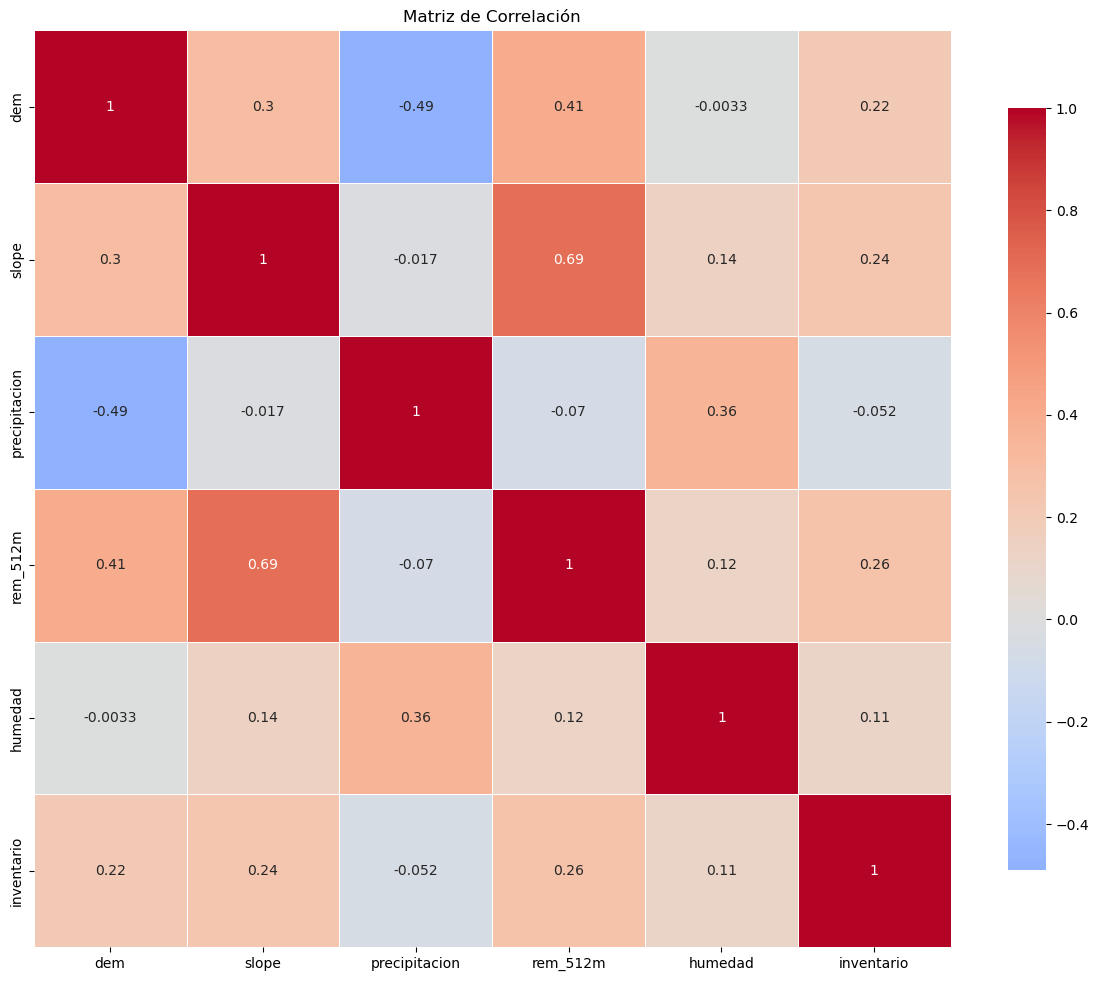

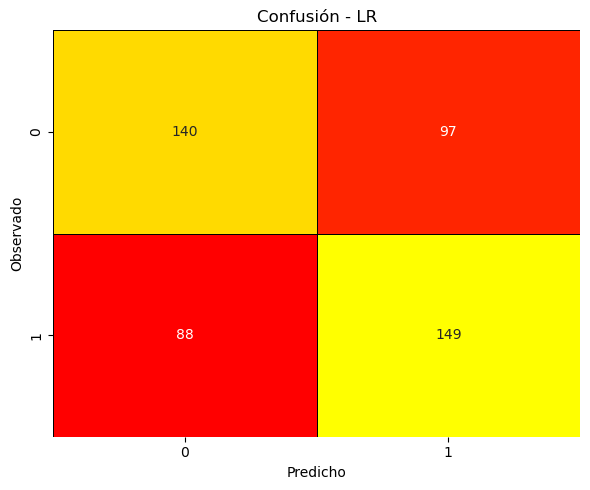

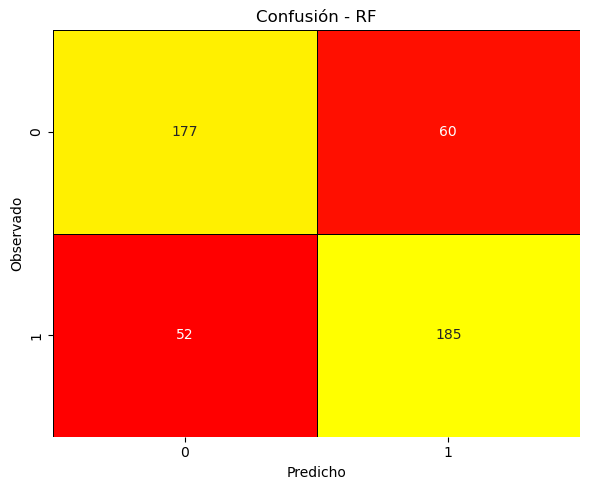

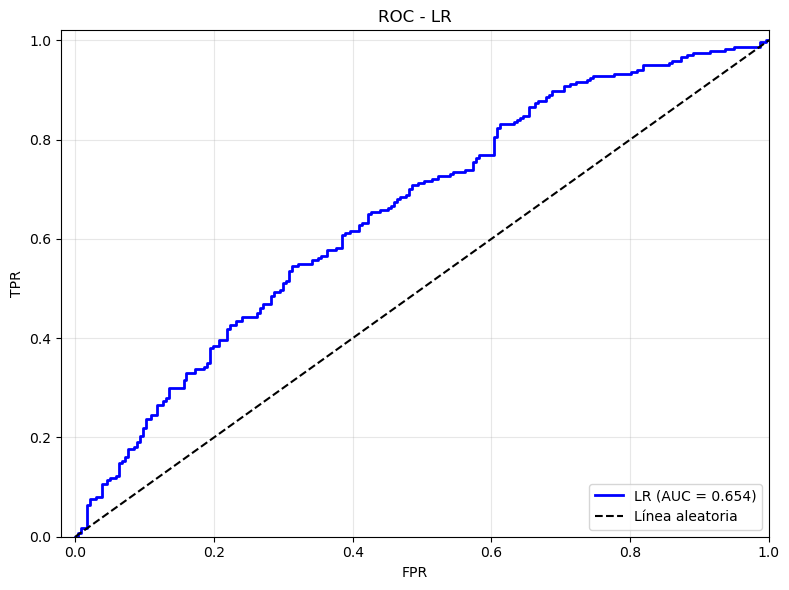

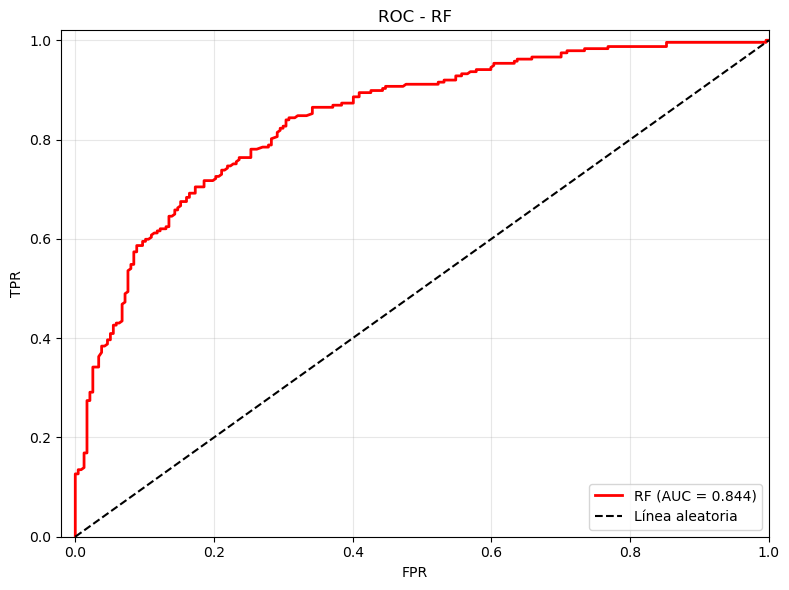

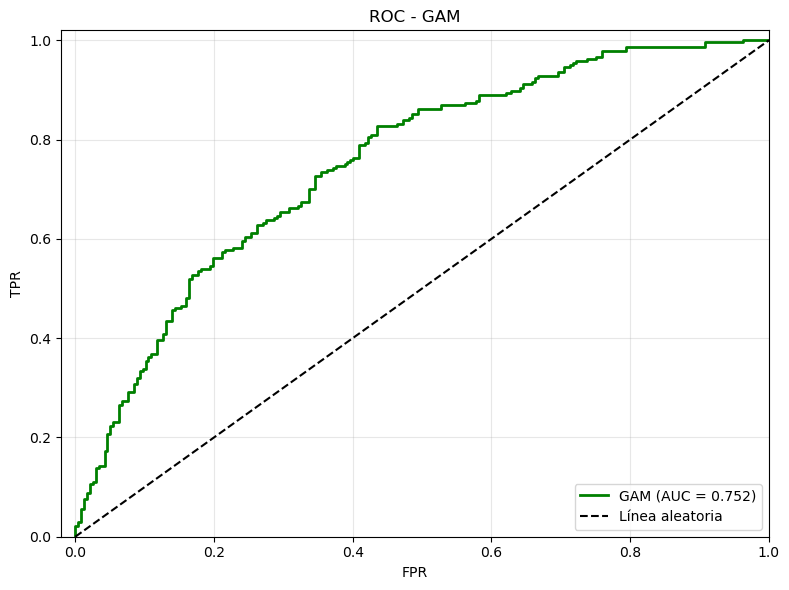

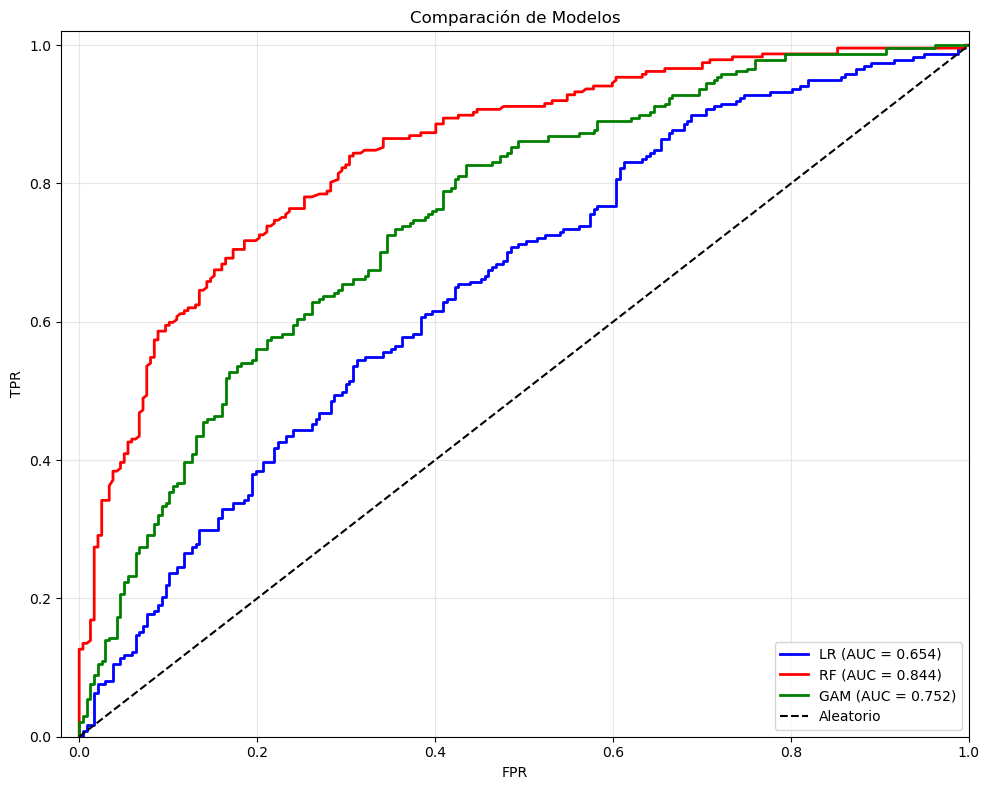


SELECCIÓN MEJOR MODELO Y UMBRAL
Mejor modelo: Random Forest (AUC: 0.8439)
Mejor umbral: 0.4460
TPR: 0.8439
FPR: 0.3080

Optimizando memoria...
  Liberando df_combined...
  Liberando df_events...
  Liberando df_noevents...
  Liberando df_noevents_balanced...
  ✓ Memoria optimizada

GENERANDO MAPAS POR BLOQUES
Configuración:
  Tamaño de bloque: 500,000 píxeles
  Total píxeles: 428,595,342
  Raster shape: (32991, 25914)

Preparando datos para mapeo...
  Datos base: (428595342, 5)
  Normalizando 5 variables continuas...
  ✓ Datos preparados: (428595342, 5)
  Datos preparados: (428595342, 5)

PROCESANDO MODELO: LR
  Procesando en 858 bloques...
    Bloque 1/858: 0 - 500,000
    Bloque 2/858: 500,000 - 1,000,000
    Bloque 3/858: 1,000,000 - 1,500,000
    Bloque 4/858: 1,500,000 - 2,000,000
    Bloque 5/858: 2,000,000 - 2,500,000
    Bloque 6/858: 2,500,000 - 3,000,000
    Bloque 7/858: 3,000,000 - 3,500,000
    Bloque 8/858: 3,500,000 - 4,000,000
    Bloque 9/858: 4,000,000 - 4,500,000
   

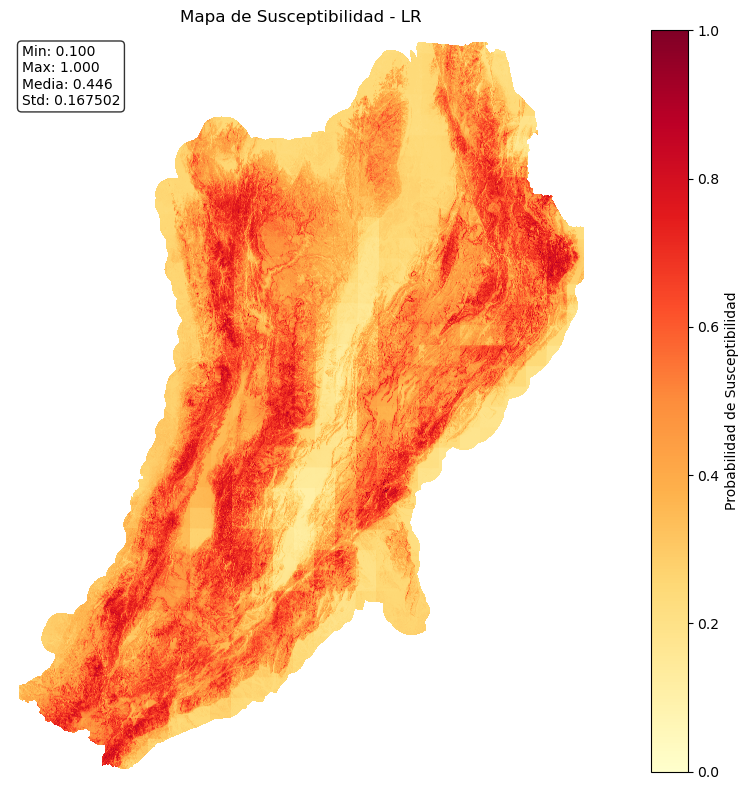

  ✓ Guardado:
    Imagen: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelado\mapa_LR.png
    Raster: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelado\susceptibilidad_LR.tif

PROCESANDO MODELO: RF
  Procesando en 858 bloques...
    Bloque 1/858: 0 - 500,000
    Bloque 2/858: 500,000 - 1,000,000
    Bloque 3/858: 1,000,000 - 1,500,000
    Bloque 4/858: 1,500,000 - 2,000,000
    Bloque 5/858: 2,000,000 - 2,500,000
    Bloque 6/858: 2,500,000 - 3,000,000
    Bloque 7/858: 3,000,000 - 3,500,000
    Bloque 8/858: 3,500,000 - 4,000,000
    Bloque 9/858: 4,000,000 - 4,500,000
    Bloque 10/858: 4,500,000 - 5,000,000
    Progreso: 1.2%
    Bloque 11/858: 5,000,000 - 5,500,000
    Bloque 12/858: 5,500,000 - 6,000,000
    Bloque 13/858: 6,000,000 - 6,500,000
    Bloque 14/858: 6,500,000 - 7,000,000
    Bloque 15/858: 7,000,000 - 7,500,000
    Bloque 16/858: 7,500,000 - 8,000,000
    Bloque 17/858: 8,000,000 - 8,500,000
    Bloque 18/858: 8,500,000 - 9,000,000
   

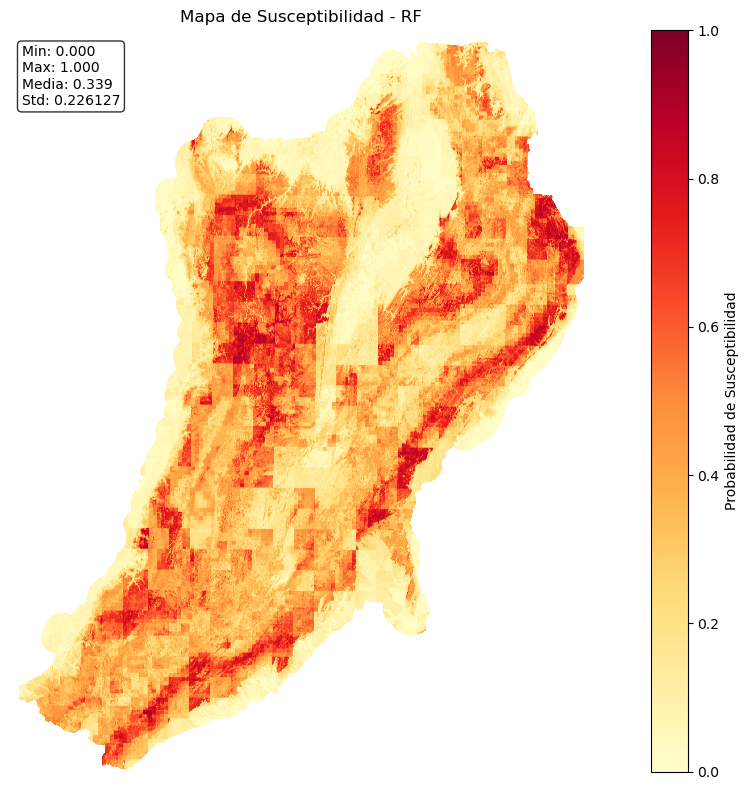

  ✓ Guardado:
    Imagen: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelado\mapa_RF.png
    Raster: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelado\susceptibilidad_RF.tif

PROCESANDO MODELO: GAM
  Procesando en 858 bloques...
    Bloque 1/858: 0 - 500,000
    Bloque 2/858: 500,000 - 1,000,000
    Bloque 3/858: 1,000,000 - 1,500,000
    Bloque 4/858: 1,500,000 - 2,000,000
    Bloque 5/858: 2,000,000 - 2,500,000
    Bloque 6/858: 2,500,000 - 3,000,000
    Bloque 7/858: 3,000,000 - 3,500,000
    Bloque 8/858: 3,500,000 - 4,000,000
    Bloque 9/858: 4,000,000 - 4,500,000
    Bloque 10/858: 4,500,000 - 5,000,000
    Progreso: 1.2%
    Bloque 11/858: 5,000,000 - 5,500,000
    Bloque 12/858: 5,500,000 - 6,000,000
    Bloque 13/858: 6,000,000 - 6,500,000
    Bloque 14/858: 6,500,000 - 7,000,000
    Bloque 15/858: 7,000,000 - 7,500,000
    Bloque 16/858: 7,500,000 - 8,000,000
    Bloque 17/858: 8,000,000 - 8,500,000
    Bloque 18/858: 8,500,000 - 9,000,000
  

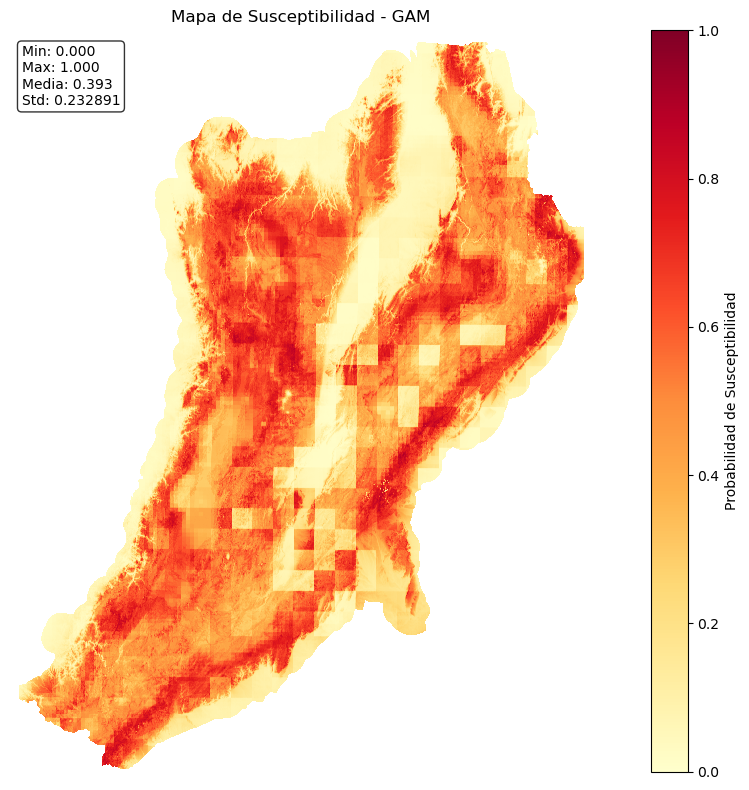

  ✓ Guardado:
    Imagen: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelado\mapa_GAM.png
    Raster: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelado\susceptibilidad_GAM.tif

✅ MAPEO POR BLOQUES COMPLETADO

GUARDANDO RESULTADOS
✓ Modelos guardados
✓ Métricas guardadas


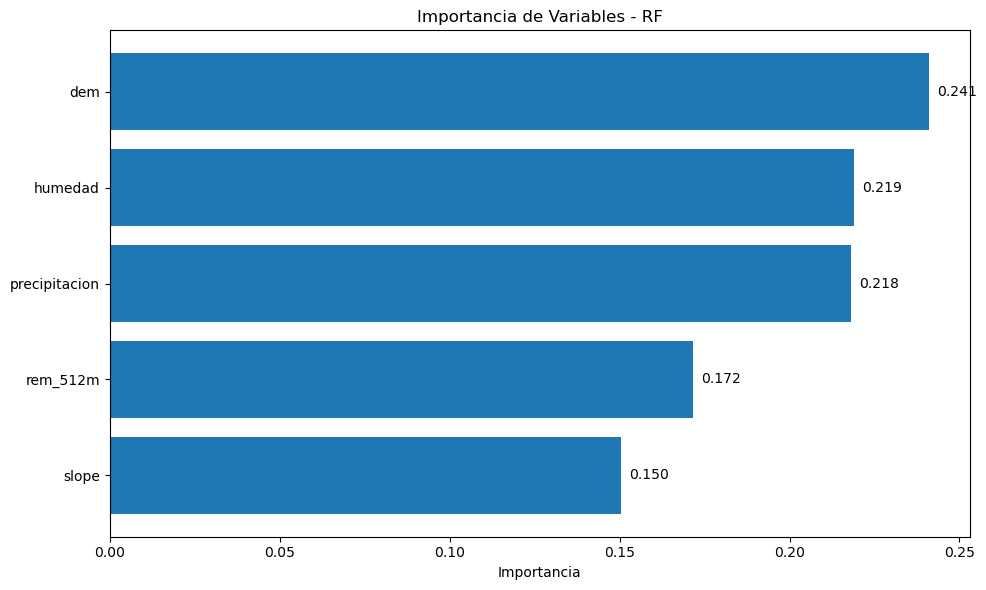


RESUMEN FINAL
VARIABLES UTILIZADAS: ['DEM', 'Slope', 'Precipitacion', 'REM_512m', 'Humedad']
TOTAL OBSERVACIONES: 428,595,342
DATOS BALANCEADOS: 2,366

RENDIMIENTO:
  LR - AUC Test: 0.6537
  RF - AUC Test: 0.8439
  GAM - AUC Test: 0.7521

MEJOR MODELO: Random Forest (AUC: 0.8439)
UMBRAL ÓPTIMO: 0.4460

TOP 3 VARIABLES MÁS IMPORTANTES:
  1. dem: 0.2409
  2. humedad: 0.2189
  3. precipitacion: 0.2180

ARCHIVOS EN: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelado
  • Modelos (.pkl)
  • Mapas de susceptibilidad (.tif)
  • Gráficos de evaluación (.png)
  • Métricas (metricas.json)

✅ PROCESO COMPLETADO EXITOSAMENTE


In [16]:
import pandas as pd
import os
import glob
import rasterio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import statsmodels.graphics.api as smg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as sfm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from pygam import LogisticGAM, s, l
from pygam import f as pygam_f
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import json
import joblib
import pickle
import warnings
warnings.filterwarnings("ignore")

# =============================================================================
# CÓDIGO 3: MODELADO CON VARIABLES SELECCIONADAS
# =============================================================================

print("="*80)
print("CÓDIGO 3: MODELADO CON VARIABLES SELECCIONADAS")
print("="*80)

# =============================================================================
# 1. CONFIGURACIÓN DE VARIABLES - DEFINIR AQUÍ QUÉ USAR
# =============================================================================

# 🎯 CONFIGURACIÓN DE VARIABLES - EDITAR AQUÍ
# Cambiar True por False para las variables que NO quieres usar

variables_config = {
    'DEM': True,                    # DEM.tif
    'Coberturas': False,            # CoberturaGEE.tif  
    'Slope': True,                  # Slope.tif
    'Curvatura_Perfil': False,      # Curvatura_Perfil.tif
    'Curvatura_PLan': False,        # Curvatura_Planar.tif 
    'Curvatura_Total': False,        # Curvatura_Planar.tif 
    'Aspect': False,                # Aspect.tif
    'FlowAcc': False,                # FlowAcc.tif
    'Suelos': False,                # Suelos_5Clases.tif
    'Geologia': False,              # Geologia_5Clases.tif
    'Precipitacion': True,          # annual_precip7.tif
    'DistanciaRios': False,         # Distancia_Rios4.tif
    'DistanciaCaminos': False,      # Distancia_Vias2.tif
    'REM_512m': True,              # REM_512m.tif
    'Humedad': True,               # Humedad.tif
    'DistanciaCaminos2': False,      # Distancia_Vias2.tif
    'DistanciaCaminos3': False,      # Distancia_Vias2.tif
}

# Variables categóricas (las que necesitan get_dummies)
variables_categoricas = ['Coberturas', 'Suelos', 'Geologia']

print("CONFIGURACIÓN DE VARIABLES:")
print("Variables seleccionadas:")
variables_seleccionadas = []
for var, usar in variables_config.items():
    status = "✓" if usar else "✗"
    print(f"  {status} {var}")
    if usar:
        variables_seleccionadas.append(var)

print(f"\nTotal variables seleccionadas: {len(variables_seleccionadas)}")
print(f"Variables categóricas activas: {[v for v in variables_categoricas if v in variables_seleccionadas]}")

# =============================================================================
# 2. CONFIGURACIÓN DE RUTAS Y MAPEO DE ARCHIVOS
# =============================================================================

# Configuración de rutas
ruta_base = r'E:\Trabajo\Congreso\Amenaza\Variables\Resample'
carpeta_salida = os.path.join(ruta_base, 'Resultados_Modelado')
os.makedirs(carpeta_salida, exist_ok=True)

# Mapeo completo de variables a archivos
mapeo_archivos = {
    'Aspect': 'Aspect1.tif',
    'Slope': 'Slope.tif', 
    'Curvatura_Perfil': 'CurvaturePro.tif',
    'Curvatura_PLan': 'CurvaturePLan.tif',
    'Curvatura_Total': 'CurvatureT.tif',
    'FlowAcc': 'FlowAcc.tif',
    'Coberturas': 'Cobertura_ALT5.tif',
    'Suelos': 'Suelos.tif',
    'DEM': 'DEM_Andes.tif',
    'Geologia': 'Geologia2.tif',
    'Precipitacion': 'Precipitacion.tif',
    'DistanciaRios': 'Distancia_Rios4.tif',
    'REM_512m': 'REM_512m.tif',
    'Humedad': 'Humedad.tif',

    'DistanciaCaminos2': 'Distancia_Vias2.tif',
    'DistanciaCaminos3': 'Distancia_Vias2.tif',
    
    'Inventario': os.path.join('Inventario', 'Inv_FlujosF7.tif')
}

# Crear rutas para las variables seleccionadas + inventario
rutas_variables = {}
variables_a_cargar = variables_seleccionadas + ['Inventario']


print(f"\n" + "="*50)
print("VERIFICACIÓN DE ARCHIVOS")
print("="*50)

for var in variables_a_cargar:
    if var in mapeo_archivos:
        ruta_completa = os.path.join(ruta_base, mapeo_archivos[var])
        rutas_variables[var.lower()] = ruta_completa
        
        existe = "✓" if os.path.exists(ruta_completa) else "✗ NO ENCONTRADO"
        print(f"  {existe} {var}: {mapeo_archivos[var]}")
    else:
        print(f"  ✗ ERROR: No hay mapeo para {var}")

print(f"\nArchivos a cargar: {len(rutas_variables)}")

# =============================================================================
# 3. CARGA DE DATOS
# =============================================================================

print(f"\n" + "="*50)
print("CARGA DE DATOS")
print("="*50)

df_combined = pd.DataFrame()

# Cargar cada variable
for nombre_var, ruta_archivo in rutas_variables.items():
    if os.path.exists(ruta_archivo):
        print(f"\nCargando {nombre_var}...")
        
        try:
            with rasterio.open(ruta_archivo) as src:
                raster_data = src.read(1)
                nodata_value = src.nodata
                print(f"  Archivo: {os.path.basename(ruta_archivo)}")
                print(f"  Shape: {raster_data.shape}")
                print(f"  NoData: {nodata_value}")
                print(f"  Rango: {raster_data.min()} - {raster_data.max()}")
                
                # Reemplazar valores NoData con NaN
                if nodata_value is not None:
                    raster_data = np.where(raster_data == nodata_value, np.nan, raster_data)
                
                # Crear DataFrame y agregar
                df_aux = pd.DataFrame(raster_data.flatten(), columns=[nombre_var])
                df_combined = pd.concat([df_combined, df_aux], axis=1)
                print(f"  ✓ Cargada exitosamente")
                
        except Exception as e:
            print(f"  ✗ Error cargando {nombre_var}: {e}")
    else:
        print(f"✗ ARCHIVO NO ENCONTRADO: {ruta_archivo}")

print(f"\nDataFrame inicial: {df_combined.shape}")
print(f"Columnas: {list(df_combined.columns)}")

if df_combined.empty:
    print("ERROR: No se cargaron datos. Verifique las rutas de archivos.")
    exit()

# Información de NaN
print(f"\nInformación de valores faltantes:")
for col in df_combined.columns:
    nan_count = df_combined[col].isnull().sum()
    total = len(df_combined)
    pct = (nan_count / total) * 100
    print(f"  {col}: {nan_count:,} ({pct:.1f}%)")

# =============================================================================
# 4. PROCESAMIENTO DEL INVENTARIO
# =============================================================================

print(f"\n" + "="*50)
print("PROCESAMIENTO DEL INVENTARIO")
print("="*50)

# Verificar que tenemos inventario
if 'inventario' not in df_combined.columns:
    print("ERROR: No se cargó la variable inventario")
    exit()

# Mostrar distribución original
print("Distribución original del inventario:")
print(df_combined["inventario"].value_counts(dropna=False))

# Procesar inventario: >0 = movimiento, 0 = sin movimiento
df_combined["inventario"] = np.where(df_combined["inventario"] > 0, 1, 
                                   np.where(pd.isna(df_combined["inventario"]), np.nan, 0))

print("\nDistribución procesada:")
print(df_combined["inventario"].value_counts(dropna=False))

# Limpiar datos
print(f"\nDataFrame antes de limpiar: {df_combined.shape}")

# Eliminar NaN en inventario
df_cleaned = df_combined.dropna(subset=['inventario'])
print(f"Después de eliminar NaN en inventario: {df_cleaned.shape}")

# Eliminar NaN en variables seleccionadas
variables_modelo = [var.lower() for var in variables_seleccionadas]
df_cleaned = df_cleaned.dropna(subset=variables_modelo)
print(f"Después de eliminar NaN en variables: {df_cleaned.shape}")

# Estadísticas
con_mm = (df_cleaned['inventario'] == 1).sum()
sin_mm = (df_cleaned['inventario'] == 0).sum()
total = len(df_cleaned)

print(f"\nEstadísticas finales:")
print(f"  Total: {total:,}")
print(f"  Con MM: {con_mm:,} ({con_mm/total*100:.2f}%)")
print(f"  Sin MM: {sin_mm:,} ({sin_mm/total*100:.2f}%)")

# =============================================================================
# 5. BALANCEO DE DATOS
# =============================================================================

print(f"\n" + "="*50)
print("BALANCEO DE DATOS")
print("="*50)

# Separar por clase
df_events = df_cleaned[df_cleaned["inventario"] == 1].copy()
df_noevents = df_cleaned[df_cleaned["inventario"] == 0].copy()

num_events = len(df_events)
num_noevents = len(df_noevents)

print(f"Eventos originales:")
print(f"  Con MM: {num_events:,}")
print(f"  Sin MM: {num_noevents:,}")
print(f"  Ratio: 1:{num_noevents/num_events:.1f}")

# Balancear
df_noevents_balanced = df_noevents.sample(n=num_events, random_state=42)
df_balanced = pd.concat([df_events, df_noevents_balanced], ignore_index=True)

print(f"\nDataset balanceado: {df_balanced.shape}")
print("Distribución final:")
print(df_balanced['inventario'].value_counts())

# =============================================================================
# 6. PROCESAMIENTO DE VARIABLES CATEGÓRICAS
# =============================================================================

print(f"\n" + "="*50)
print("PROCESAMIENTO DE VARIABLES CATEGÓRICAS")
print("="*50)

df_processed = df_balanced.copy()
transformaciones_categoricas = {}

# Identificar variables categóricas activas
vars_cat_activas = [v for v in variables_categoricas if v in variables_seleccionadas]
print(f"Variables categóricas activas: {vars_cat_activas}")

for var in vars_cat_activas:
    var_lower = var.lower()
    
    if var_lower in df_processed.columns:
        print(f"\nProcesando {var}...")
        
        valores_unicos = df_processed[var_lower].unique()
        n_valores = len(valores_unicos)
        print(f"  Valores únicos: {n_valores}")
        print(f"  Valores: {sorted(valores_unicos)}")
        
        if n_valores < 20:  # Procesar como categórica
            # Crear dummies
            dummy_vars = pd.get_dummies(df_processed[var_lower], prefix=var_lower, drop_first=True)
            print(f"  Variables dummy: {list(dummy_vars.columns)}")
            
            # Guardar transformación
            transformaciones_categoricas[var_lower] = {
                'valores_originales': list(valores_unicos),
                'columnas_dummy': list(dummy_vars.columns),
                'valor_referencia': valores_unicos[0]
            }
            
            # Reemplazar en DataFrame
            df_processed = df_processed.drop(var_lower, axis=1).join(dummy_vars)
            print(f"  ✓ Procesada")
        else:
            print(f"  → Tratada como continua (muchos valores)")

print(f"\nDataFrame después de categóricas: {df_processed.shape}")

# =============================================================================
# 7. NORMALIZACIÓN
# =============================================================================

print(f"\n" + "="*50)
print("NORMALIZACIÓN DE VARIABLES CONTINUAS")
print("="*50)

# Identificar variables continuas
variables_continuas = []
for col in df_processed.columns:
    if col != 'inventario':
        # Es continua si no es dummy de categórica
        es_dummy = any(var_cat.lower() in col for var_cat in vars_cat_activas)
        if not es_dummy:
            variables_continuas.append(col)

print(f"Variables continuas: {variables_continuas}")

if variables_continuas:
    # Estadísticas antes
    print("\nAntes de normalización:")
    for var in variables_continuas:
        mean_val = df_processed[var].mean()
        std_val = df_processed[var].std()
        print(f"  {var}: media={mean_val:.3f}, std={std_val:.3f}")
    
    # Normalizar
    scaler = StandardScaler()
    df_processed[variables_continuas] = scaler.fit_transform(df_processed[variables_continuas])
    
    print("\nDespués de normalización:")
    for var in variables_continuas:
        mean_val = df_processed[var].mean()
        std_val = df_processed[var].std()
        print(f"  {var}: media={mean_val:.3f}, std={std_val:.3f}")
    
    print(f"✓ {len(variables_continuas)} variables normalizadas")
else:
    scaler = None
    print("No hay variables continuas para normalizar")

# =============================================================================
# 8. ANÁLISIS EXPLORATORIO
# =============================================================================

print(f"\n" + "="*50)
print("ANÁLISIS EXPLORATORIO")
print("="*50)

print(f"DataFrame final: {df_processed.shape}")
print(f"Variables: {list(df_processed.columns)}")

# Verificar NaN
nan_total = df_processed.isnull().sum().sum()
print(f"Total NaN: {nan_total}")

# Correlación con inventario
print("\nCorrelaciones con inventario:")
correlaciones_inventario = df_processed.corr()['inventario'].sort_values(key=abs, ascending=False)
for var, corr in correlaciones_inventario.items():
    if var != 'inventario':
        print(f"  {var}: {corr:.4f}")

# Matriz de correlación completa
plt.figure(figsize=(12, 10))
matriz_correlacion = df_processed.corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.tight_layout()

# Estadísticas por grupo
print("\nEstadísticas por grupo:")
stats_por_grupo = df_processed.groupby('inventario').mean()
print(stats_por_grupo)

# =============================================================================
# 9. PREPARACIÓN PARA MODELADO
# =============================================================================

print(f"\n" + "="*50)
print("PREPARACIÓN PARA MODELADO")
print("="*50)

# Variables X e y
X = df_processed.drop(columns=['inventario'])
y = df_processed['inventario']

print(f"Variables predictoras: {list(X.columns)}")
print(f"X shape: {X.shape}")
print(f"y distribución: {y.value_counts()}")

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDivisión:")
print(f"  Entrenamiento: {X_train.shape}")
print(f"  Prueba: {X_test.shape}")
print(f"  Train y: {y_train.value_counts()}")
print(f"  Test y: {y_test.value_counts()}")

# =============================================================================
# 10. MODELO 1: REGRESIÓN LOGÍSTICA
# =============================================================================

print(f"\n" + "="*60)
print("MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*60)

print("Entrenando...")
model_lr = LogisticRegression(penalty=None, max_iter=1000, solver='newton-cg', random_state=42)
model_lr.fit(X_train, y_train)
print("✓ Entrenado")

# Predicciones
y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)
y_train_probs_lr = model_lr.predict_proba(X_train)[:, 1]
y_test_probs_lr = model_lr.predict_proba(X_test)[:, 1]

# Validación cruzada
X_s, y_s = shuffle(X, y, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
roc_scores_lr = cross_val_score(model_lr, X_s, y_s, cv=kfold, scoring='roc_auc')

print(f"Validación cruzada:")
for i, score in enumerate(roc_scores_lr):
    print(f"  Fold {i+1}: {score:.4f}")
print(f"  Media: {roc_scores_lr.mean():.4f} ± {roc_scores_lr.std():.4f}")

# Métricas
auc_train_lr = roc_auc_score(y_train, y_train_probs_lr)
auc_test_lr = roc_auc_score(y_test, y_test_probs_lr)

print(f"\nMétricas LR:")
print(f"  AUC Train: {auc_train_lr:.4f}")
print(f"  AUC Test: {auc_test_lr:.4f}")

# =============================================================================
# 11. MODELO 2: RANDOM FOREST
# =============================================================================

print(f"\n" + "="*60)
print("MODELO 2: RANDOM FOREST")
print("="*60)

print("Entrenando...")
model_rf = RandomForestClassifier(
    n_estimators=1000, 
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
model_rf.fit(X_train, y_train)
print("✓ Entrenado")

# Predicciones
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
y_train_probs_rf = model_rf.predict_proba(X_train)[:, 1]
y_test_probs_rf = model_rf.predict_proba(X_test)[:, 1]

# Métricas
auc_train_rf = roc_auc_score(y_train, y_train_probs_rf)
auc_test_rf = roc_auc_score(y_test, y_test_probs_rf)
accuracy_train_rf = model_rf.score(X_train, y_train)
accuracy_test_rf = model_rf.score(X_test, y_test)

print(f"Métricas RF:")
print(f"  AUC Train: {auc_train_rf:.4f}")
print(f"  AUC Test: {auc_test_rf:.4f}")
print(f"  Accuracy Train: {accuracy_train_rf:.4f}")
print(f"  Accuracy Test: {accuracy_test_rf:.4f}")

# Importancia
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nImportancia de variables:")
for _, row in feature_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

# =============================================================================
# 12. MODELO 3: GAM
# =============================================================================

print(f"\n" + "="*60)
print("MODELO 3: GAM")
print("="*60)

n_features = X_train.shape[1]
print(f"Configurando GAM con {n_features} variables...")

# Términos GAM
gam_terms = []
for i in range(n_features):
    feature_name = X_train.columns[i]
    n_unique = X_train.iloc[:, i].nunique()
    
    if n_unique <= 10:
        gam_terms.append(pygam_f(i))
        print(f"  {feature_name}: categórica")
    else:
        gam_terms.append(s(i))
        print(f"  {feature_name}: continua")

# Fórmula GAM
if len(gam_terms) == 1:
    gam_formula = gam_terms[0]
else:
    gam_formula = gam_terms[0]
    for term in gam_terms[1:]:
        gam_formula = gam_formula + term

# Entrenar
print("Entrenando GAM...")
try:
    model_gam = LogisticGAM(gam_formula).fit(X_train, y_train)
    print("✓ Entrenado")
    
    y_train_probs_gam = model_gam.predict_proba(X_train)
    y_test_probs_gam = model_gam.predict_proba(X_test)
    
    auc_train_gam = roc_auc_score(y_train, y_train_probs_gam)
    auc_test_gam = roc_auc_score(y_test, y_test_probs_gam)
    accuracy_train_gam = model_gam.accuracy(X_train, y_train)
    accuracy_test_gam = model_gam.accuracy(X_test, y_test)
    
    print(f"Métricas GAM:")
    print(f"  AUC Train: {auc_train_gam:.4f}")
    print(f"  AUC Test: {auc_test_gam:.4f}")
    print(f"  Accuracy Train: {accuracy_train_gam:.4f}")
    print(f"  Accuracy Test: {accuracy_test_gam:.4f}")
    
    gam_success = True
    
except Exception as e:
    print(f"Error en GAM: {e}")
    gam_success = False
    auc_train_gam = auc_test_gam = 0

# =============================================================================
# 13. EVALUACIÓN Y COMPARACIÓN
# =============================================================================

print(f"\n" + "="*60)
print("EVALUACIÓN Y COMPARACIÓN")
print("="*60)

# Funciones de evaluación
def plot_confusion_matrix(y_true, y_pred, title, filename):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, cbar=False, linecolor='black', 
                linewidths=0.7, cmap=plt.cm.autumn, fmt='d')
    plt.xlabel('Predicho')
    plt.ylabel('Observado')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(os.path.join(carpeta_salida, filename), dpi=300, bbox_inches='tight')
    plt.show()
    return matrix

def plot_roc_curve(y_true, y_probs, title, filename, color='darkorange'):
    fpr, tpr, threshold = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc_score:.3f})', 
             linewidth=2, color=color)
    plt.plot([0, 1], [0, 1], 'k--', label='Línea aleatoria')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC - {title}')
    plt.legend(loc=4)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(carpeta_salida, filename), dpi=300, bbox_inches='tight')
    plt.show()
    return fpr, tpr, threshold

# Matrices de confusión
print("Matrices de confusión...")
plot_confusion_matrix(y_test, y_test_pred_lr, 'Confusión - LR', 'confusion_lr.png')
plot_confusion_matrix(y_test, y_test_pred_rf, 'Confusión - RF', 'confusion_rf.png')

# ROC individuales
fpr_lr, tpr_lr, th_lr = plot_roc_curve(y_test, y_test_probs_lr, 'LR', 'roc_lr.png', 'blue')
fpr_rf, tpr_rf, th_rf = plot_roc_curve(y_test, y_test_probs_rf, 'RF', 'roc_rf.png', 'red')

if gam_success:
    fpr_gam, tpr_gam, th_gam = plot_roc_curve(y_test, y_test_probs_gam, 'GAM', 'roc_gam.png', 'green')

# ROC comparativo
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC = {auc_test_lr:.3f})', linewidth=2, color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {auc_test_rf:.3f})', linewidth=2, color='red')

if gam_success:
    plt.plot(fpr_gam, tpr_gam, label=f'GAM (AUC = {auc_test_gam:.3f})', linewidth=2, color='green')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Comparación de Modelos')
plt.legend(loc=4)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(carpeta_salida, 'comparacion_roc.png'), dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 14. SELECCIÓN MEJOR MODELO Y UMBRAL
# =============================================================================

print(f"\n" + "="*50)
print("SELECCIÓN MEJOR MODELO Y UMBRAL")
print("="*50)

# Mejor modelo
best_auc = max(auc_test_lr, auc_test_rf)
if gam_success:
    best_auc = max(best_auc, auc_test_gam)

if best_auc == auc_test_lr:
    best_model_name = "Regresión Logística"
    best_model = model_lr
    best_probs = y_test_probs_lr
    best_fpr, best_tpr, best_thresholds = fpr_lr, tpr_lr, th_lr
elif best_auc == auc_test_rf:
    best_model_name = "Random Forest"
    best_model = model_rf
    best_probs = y_test_probs_rf
    best_fpr, best_tpr, best_thresholds = fpr_rf, tpr_rf, th_rf
else:
    best_model_name = "GAM"
    best_model = model_gam
    best_probs = y_test_probs_gam
    best_fpr, best_tpr, best_thresholds = fpr_gam, tpr_gam, th_gam

print(f"Mejor modelo: {best_model_name} (AUC: {best_auc:.4f})")

# Mejor umbral (Youden)
i = np.arange(len(best_tpr))
roc_df = pd.DataFrame({
    'fpr': pd.Series(best_fpr, index=i),
    'tpr': pd.Series(best_tpr, index=i), 
    'tf': pd.Series(best_tpr - best_fpr, index=i), 
    'threshold': pd.Series(best_thresholds, index=i)
})

best_idx = roc_df['tf'].argmax()
best_threshold = roc_df.iloc[best_idx]

print(f"Mejor umbral: {best_threshold['threshold']:.4f}")
print(f"TPR: {best_threshold['tpr']:.4f}")
print(f"FPR: {best_threshold['fpr']:.4f}")

# =============================================================================
# SOLUCIÓN: GENERACIÓN DE MAPAS POR BLOQUES (CHUNKS)
# Reemplaza la sección 15 del código original
# =============================================================================


# AQUI

ejecutar_mapeo_por_bloques()
import gc  # Para liberación de memoria

def generar_mapas_por_bloques():
    """
    Genera mapas de susceptibilidad procesando el raster por bloques
    para evitar problemas de memoria RAM
    """
    
    print(f"\n" + "="*50)
    print("GENERANDO MAPAS POR BLOQUES")
    print("="*50)
    
    try:
        # Configuración de bloques
        BLOCK_SIZE = 500000  # Número de píxeles por bloque (ajustable)
        
        print(f"Configuración:")
        print(f"  Tamaño de bloque: {BLOCK_SIZE:,} píxeles")
        print(f"  Total píxeles: {len(df_cleaned):,}")
        
        # Información del raster original
        ruta_dem = os.path.join(ruta_base, 'DEM_Andes.tif')
        if not os.path.exists(ruta_dem):
            print(f"ERROR: No se encontró DEM en {ruta_dem}")
            return
            
        with rasterio.open(ruta_dem) as src:
            raster_shape = src.read(1).shape
            raster_meta = src.profile.copy()
            raster_meta.update({
                'dtype': 'float32', 
                'nodata': -999, 
                'count': 1
            })
        
        print(f"  Raster shape: {raster_shape}")
        
        # Preparar datos para mapeo
        print("\nPreparando datos para mapeo...")
        map_data = preparar_datos_mapeo()
        
        if map_data is None:
            print("ERROR: No se pudieron preparar los datos")
            return
            
        print(f"  Datos preparados: {map_data.shape}")
        
        # Modelos para mapear
        modelos_mapeo = {
            'LR': model_lr,
            'RF': model_rf
        }
        
        if gam_success:
            modelos_mapeo['GAM'] = model_gam
        
        # Generar mapas por bloques para cada modelo
        for nombre_modelo, modelo in modelos_mapeo.items():
            print(f"\n{'='*40}")
            print(f"PROCESANDO MODELO: {nombre_modelo}")
            print(f"{'='*40}")
            
            try:
                mapa_final = procesar_modelo_por_bloques(
                    modelo, map_data, nombre_modelo, 
                    raster_shape, BLOCK_SIZE
                )
                
                if mapa_final is not None:
                    # Visualizar y guardar
                    visualizar_y_guardar_mapa(
                        mapa_final, nombre_modelo, raster_shape, raster_meta
                    )
                    
            except Exception as e:
                print(f"  ✗ Error procesando {nombre_modelo}: {e}")
                continue
                
    except Exception as e:
        print(f"Error general en mapas por bloques: {e}")

def preparar_datos_mapeo():
    """
    Prepara los datos para el mapeo, aplicando las mismas transformaciones
    que se usaron en el entrenamiento
    """
    try:
        # Partir de datos limpios sin inventario
        map_data = df_cleaned.drop(columns=['inventario']).copy()
        print(f"  Datos base: {map_data.shape}")
        
        # Procesar variables categóricas igual que en entrenamiento
        for var_cat, transformacion in transformaciones_categoricas.items():
            if var_cat in map_data.columns:
                print(f"  Procesando {var_cat}...")
                
                # Crear dummies
                dummy_vars = pd.get_dummies(map_data[var_cat], prefix=var_cat, drop_first=True)
                
                # Eliminar variable original
                map_data = map_data.drop(var_cat, axis=1)
                
                # Agregar solo las columnas que están en el modelo
                for col in transformacion['columnas_dummy']:
                    if col in dummy_vars.columns:
                        map_data[col] = dummy_vars[col]
                    else:
                        map_data[col] = 0  # Si no existe, poner 0
        
        # Asegurar que tenemos las mismas columnas que X
        for col in X.columns:
            if col not in map_data.columns:
                print(f"  Agregando columna faltante: {col}")
                map_data[col] = 0
        
        # Reordenar columnas para que coincidan con X
        map_data = map_data[X.columns]
        
        # Rellenar cualquier NaN que quede
        map_data = map_data.fillna(0)
        
        # Normalizar variables continuas si hay scaler
        if scaler is not None and variables_continuas:
            vars_cont_map = [v for v in variables_continuas if v in map_data.columns]
            if vars_cont_map:
                print(f"  Normalizando {len(vars_cont_map)} variables continuas...")
                map_data[vars_cont_map] = scaler.transform(map_data[vars_cont_map])
        
        print(f"  ✓ Datos preparados: {map_data.shape}")
        return map_data
        
    except Exception as e:
        print(f"  ✗ Error preparando datos: {e}")
        return None

def procesar_modelo_por_bloques(modelo, map_data, nombre_modelo, raster_shape, block_size):
    """
    Procesa un modelo por bloques para evitar problemas de memoria
    """
    try:
        total_pixels = raster_shape[0] * raster_shape[1]
        num_blocks = len(map_data) // block_size + (1 if len(map_data) % block_size != 0 else 0)
        
        print(f"  Procesando en {num_blocks} bloques...")
        
        # Array para almacenar todas las predicciones
        all_predictions = np.full(len(map_data), np.nan, dtype=np.float32)
        
        # Procesar por bloques
        for i in range(num_blocks):
            start_idx = i * block_size
            end_idx = min((i + 1) * block_size, len(map_data))
            
            print(f"    Bloque {i+1}/{num_blocks}: {start_idx:,} - {end_idx:,}")
            
            # Extraer bloque de datos
            block_data = map_data.iloc[start_idx:end_idx].copy()
            
            # Hacer predicciones para este bloque
            if nombre_modelo == 'GAM':
                block_predictions = modelo.predict_proba(block_data)
            else:
                block_predictions = modelo.predict_proba(block_data)[:, 1]
            
            # Almacenar predicciones
            all_predictions[start_idx:end_idx] = block_predictions
            
            # Liberar memoria del bloque
            del block_data, block_predictions
            gc.collect()
            
            # Mostrar progreso cada 10 bloques
            if (i + 1) % 10 == 0 or (i + 1) == num_blocks:
                progress = ((i + 1) / num_blocks) * 100
                print(f"    Progreso: {progress:.1f}%")
        
        # Estadísticas de predicciones
        valid_preds = all_predictions[~np.isnan(all_predictions)]
        print(f"  Predicciones válidas: {len(valid_preds):,}")
        print(f"  Rango: {valid_preds.min():.3f} - {valid_preds.max():.3f}")
        print(f"  Media: {valid_preds.mean():.3f}")
        print(f"  Std: {valid_preds.std():.6f}")
        
        # Crear array completo del raster
        print(f"  Creando mapa completo...")
        mapa_completo = np.full(total_pixels, np.nan, dtype=np.float32)
        
        # Usar índices de df_cleaned para mapear correctamente
        indices_validos = df_cleaned.index.values
        mapa_completo[indices_validos] = all_predictions
        
        # Reshape al tamaño del raster
        mapa_final = mapa_completo.reshape(raster_shape)
        
        # Liberar memoria
        del all_predictions, mapa_completo
        gc.collect()
        
        print(f"  ✓ Mapa generado: {mapa_final.shape}")
        return mapa_final
        
    except Exception as e:
        print(f"  ✗ Error procesando por bloques: {e}")
        return None

def visualizar_y_guardar_mapa(mapa, nombre_modelo, raster_shape, raster_meta):
    """
    Visualiza y guarda un mapa de susceptibilidad
    """
    try:
        print(f"  Visualizando y guardando {nombre_modelo}...")
        
        # Crear visualización
        plt.figure(figsize=(12, 8))
        im = plt.imshow(mapa, cmap='YlOrRd', vmin=0, vmax=1)
        plt.colorbar(im, label='Probabilidad de Susceptibilidad')
        plt.title(f'Mapa de Susceptibilidad - {nombre_modelo}')
        plt.axis('off')
        
        # Estadísticas para mostrar en el gráfico
        stats_text = (
            f"Min: {np.nanmin(mapa):.3f}\n"
            f"Max: {np.nanmax(mapa):.3f}\n"
            f"Media: {np.nanmean(mapa):.3f}\n"
            f"Std: {np.nanstd(mapa):.6f}"
        )
        
        plt.text(0.02, 0.98, stats_text, 
                transform=plt.gca().transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        
        # Guardar imagen
        imagen_path = os.path.join(carpeta_salida, f'mapa_{nombre_modelo}.png')
        plt.savefig(imagen_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        # Guardar raster
        raster_path = os.path.join(carpeta_salida, f'susceptibilidad_{nombre_modelo}.tif')
        with rasterio.open(raster_path, 'w', **raster_meta) as dst:
            dst.write(mapa.astype('float32'), 1)
        
        print(f"  ✓ Guardado:")
        print(f"    Imagen: {imagen_path}")
        print(f"    Raster: {raster_path}")
        
    except Exception as e:
        print(f"  ✗ Error visualizando: {e}")

def optimizar_memoria():
    """
    Libera memoria no necesaria antes del procesamiento por bloques
    """
    print("\nOptimizando memoria...")
    
    # Variables globales que podemos limpiar temporalmente
    variables_a_limpiar = [
        'df_combined', 'df_events', 'df_noevents', 
        'df_noevents_balanced'
    ]
    
    for var_name in variables_a_limpiar:
        if var_name in globals():
            print(f"  Liberando {var_name}...")
            del globals()[var_name]
    
    # Forzar garbage collection
    gc.collect()
    print("  ✓ Memoria optimizada")

# =============================================================================
# FUNCIÓN PRINCIPAL PARA REEMPLAZAR LA SECCIÓN 15
# =============================================================================

def ejecutar_mapeo_por_bloques():
    """
    Función principal que reemplaza la sección 15 del código original
    """
    try:
        # Optimizar memoria antes de empezar
        optimizar_memoria()
        
        # Verificar que tenemos las variables necesarias
        required_vars = ['df_cleaned', 'transformaciones_categoricas', 'X', 'scaler', 'variables_continuas']
        missing_vars = [var for var in required_vars if var not in globals()]
        
        if missing_vars:
            print(f"ERROR: Variables faltantes: {missing_vars}")
            return
        
        # Ejecutar mapeo por bloques
        generar_mapas_por_bloques()
        
        print(f"\n✅ MAPEO POR BLOQUES COMPLETADO")
        
    except Exception as e:
        print(f"ERROR en mapeo por bloques: {e}")

# =============================================================================
# INSTRUCCIONES DE USO
# =============================================================================

print(f"\n" + "="*50)
print("GUARDANDO RESULTADOS")
print("="*50)

# Guardar modelos
joblib.dump(model_lr, os.path.join(carpeta_salida, 'modelo_lr.pkl'))
joblib.dump(model_rf, os.path.join(carpeta_salida, 'modelo_rf.pkl'))

if gam_success:
    with open(os.path.join(carpeta_salida, 'modelo_gam.pkl'), 'wb') as f:
        pickle.dump(model_gam, f)

if scaler:
    joblib.dump(scaler, os.path.join(carpeta_salida, 'scaler.pkl'))

# Importancia
feature_importance.to_csv(os.path.join(carpeta_salida, 'importancia.csv'), index=False)

# Métricas
metricas = {
    'variables_seleccionadas': variables_seleccionadas,
    'lr': {'auc_train': auc_train_lr, 'auc_test': auc_test_lr, 'cv_mean': roc_scores_lr.mean()},
    'rf': {'auc_train': auc_train_rf, 'auc_test': auc_test_rf, 'accuracy_test': accuracy_test_rf},
    'mejor_modelo': best_model_name,
    'mejor_auc': best_auc,
    'mejor_umbral': float(best_threshold['threshold'])
}

if gam_success:
    metricas['gam'] = {'auc_train': auc_train_gam, 'auc_test': auc_test_gam}

with open(os.path.join(carpeta_salida, 'metricas.json'), 'w') as f:
    json.dump(metricas, f, indent=2)

print("✓ Modelos guardados")
print("✓ Métricas guardadas")

# =============================================================================
# 17. GRÁFICO IMPORTANCIA
# =============================================================================

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importancia')
plt.title('Importancia de Variables - RF')
plt.gca().invert_yaxis()

for i, v in enumerate(feature_importance['importance']):
    plt.text(v + max(feature_importance['importance'])*0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.savefig(os.path.join(carpeta_salida, 'importancia.png'), dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 18. RESUMEN FINAL
# =============================================================================
# Al final del Código 3, agregar:
X_train.to_pickle(os.path.join(carpeta_salida, 'X_train.pkl'))
X_test.to_pickle(os.path.join(carpeta_salida, 'X_test.pkl'))
y_train.to_pickle(os.path.join(carpeta_salida, 'y_train.pkl'))
y_test.to_pickle(os.path.join(carpeta_salida, 'y_test.pkl'))
df_balanced.to_pickle(os.path.join(carpeta_salida, 'df_balanced.pkl'))


print(f"\n" + "="*80)
print("RESUMEN FINAL")
print("="*80)

print(f"VARIABLES UTILIZADAS: {variables_seleccionadas}")
print(f"TOTAL OBSERVACIONES: {len(df_cleaned):,}")
print(f"DATOS BALANCEADOS: {len(df_balanced):,}")

print(f"\nRENDIMIENTO:")
print(f"  LR - AUC Test: {auc_test_lr:.4f}")
print(f"  RF - AUC Test: {auc_test_rf:.4f}")
if gam_success:
    print(f"  GAM - AUC Test: {auc_test_gam:.4f}")

print(f"\nMEJOR MODELO: {best_model_name} (AUC: {best_auc:.4f})")
print(f"UMBRAL ÓPTIMO: {best_threshold['threshold']:.4f}")

print(f"\nTOP 3 VARIABLES MÁS IMPORTANTES:")
for i, (_, row) in enumerate(feature_importance.head(3).iterrows(), 1):
    print(f"  {i}. {row['feature']}: {row['importance']:.4f}")

print(f"\nARCHIVOS EN: {carpeta_salida}")
print(f"  • Modelos (.pkl)")
print(f"  • Mapas de susceptibilidad (.tif)")
print(f"  • Gráficos de evaluación (.png)")
print(f"  • Métricas (metricas.json)")

print(f"\n✅ PROCESO COMPLETADO EXITOSAMENTE")
print("="*80)

In [20]:
# CODIGO 4
# CODIGO 4
# CODIGO 4
# CODIGO 4
# CODIGO 4
# CODIGO 4
# CODIGO 4
# CODIGO 4
# CODIGO 4
# CODIGO 4

CÓDIGO 4: MODELOS ADICIONALES

CARGA DE DATOS PROCESADOS DEL CÓDIGO 3
Carpeta Código 3: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelado
Carpeta salida: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelos_Adicionales
✓ modelo_lr.pkl
✓ modelo_rf.pkl
✓ scaler.pkl
✓ metricas.json
✓ Métricas del Código 3 cargadas

CARGANDO DATOS BALANCEADOS DEL CÓDIGO 3
✓ X_train.pkl
✓ X_test.pkl
✓ y_train.pkl
✓ y_test.pkl
✓ df_balanced.pkl

📂 Cargando datos ya divididos del Código 3...
✅ Datos cargados exitosamente
  X_train: (48822, 5)
  X_test: (12206, 5)
  y_train distribución: {1.0: 24411, 0.0: 24411}
  y_test distribución: {0.0: 6103, 1.0: 6103}

📊 DATOS FINALES PARA MODELADO:
  Dataset total: 61,028 observaciones
  Variables: ['dem', 'slope', 'precipitacion', 'rem_512m', 'humedad']
  Entrenamiento: (48822, 5)
  Prueba: (12206, 5)
  Distribución y_train: {1.0: 24411, 0.0: 24411}
  Distribución y_test: {0.0: 6103, 1.0: 6103}

✅ VERIFICACIÓN DE BALANCEO:
  Balance entren

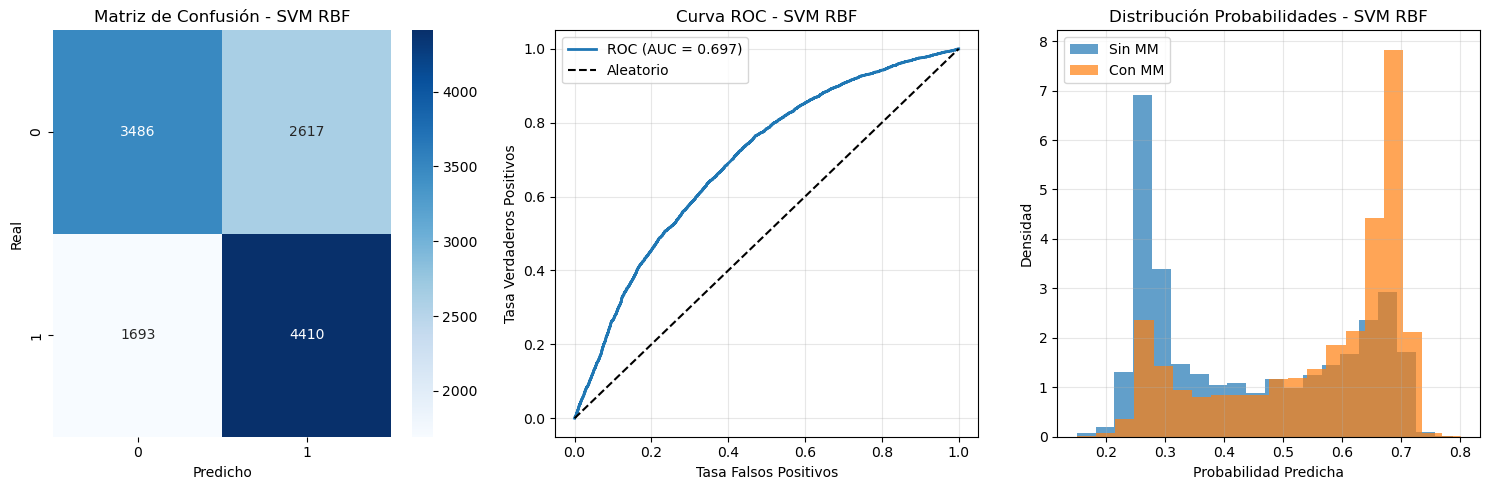


----------------------------------------
SVM CON KERNEL LINEAL
----------------------------------------

EVALUANDO MODELO: SVM LINEAR
Entrenando modelo...
✓ Entrenado exitosamente
Métricas SVM Linear:
  Accuracy Train: 0.6164
  Accuracy Test: 0.6195
  AUC Train: 0.6303
  AUC Test: 0.6340
  Diferencia: -0.0037
  CV Mean: 0.6300 ± 0.0036

Matriz de Confusión:
[[2957 3146]
 [1498 4605]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.66      0.48      0.56      6103
         1.0       0.59      0.75      0.66      6103

    accuracy                           0.62     12206
   macro avg       0.63      0.62      0.61     12206
weighted avg       0.63      0.62      0.61     12206

✓ Modelo guardado: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelos_Adicionales\modelo_svm_linear.pkl


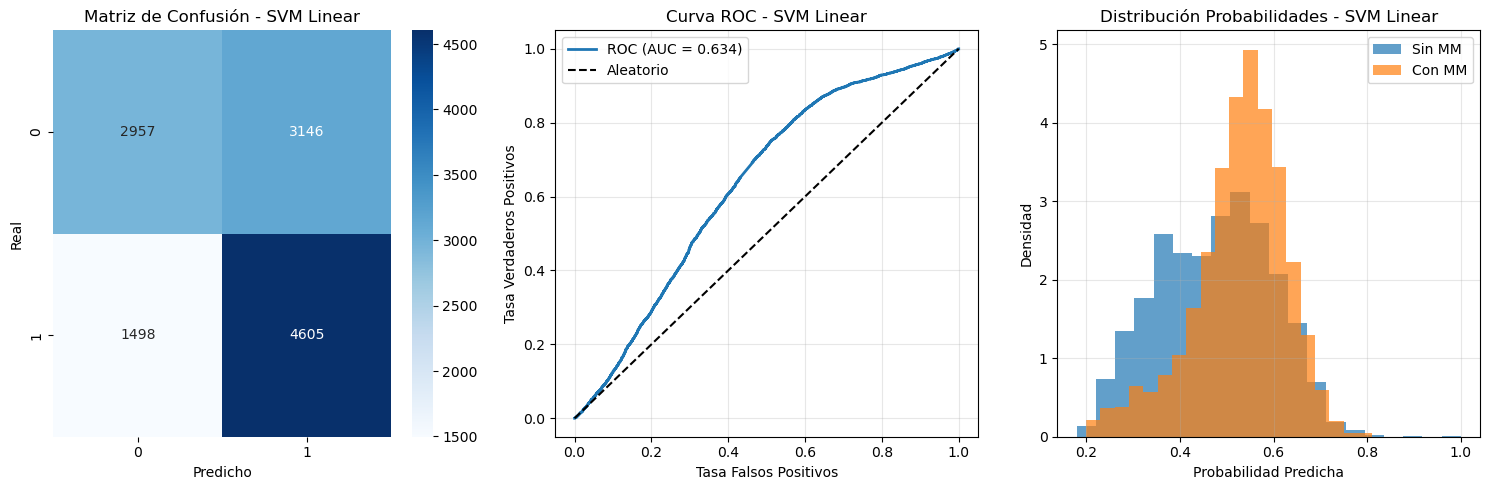


MODELO 2: REDES NEURONALES (MLP)
Configurando Red Neuronal Simple...

EVALUANDO MODELO: MLP SIMPLE
Entrenando modelo...
✓ Entrenado exitosamente
Métricas MLP Simple:
  Accuracy Train: 0.6480
  Accuracy Test: 0.6408
  AUC Train: 0.7052
  AUC Test: 0.6981
  Diferencia: 0.0072
  CV Mean: 0.7053 ± 0.0067

Matriz de Confusión:
[[3615 2488]
 [1896 4207]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62      6103
         1.0       0.63      0.69      0.66      6103

    accuracy                           0.64     12206
   macro avg       0.64      0.64      0.64     12206
weighted avg       0.64      0.64      0.64     12206

✓ Modelo guardado: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelos_Adicionales\modelo_mlp_simple.pkl


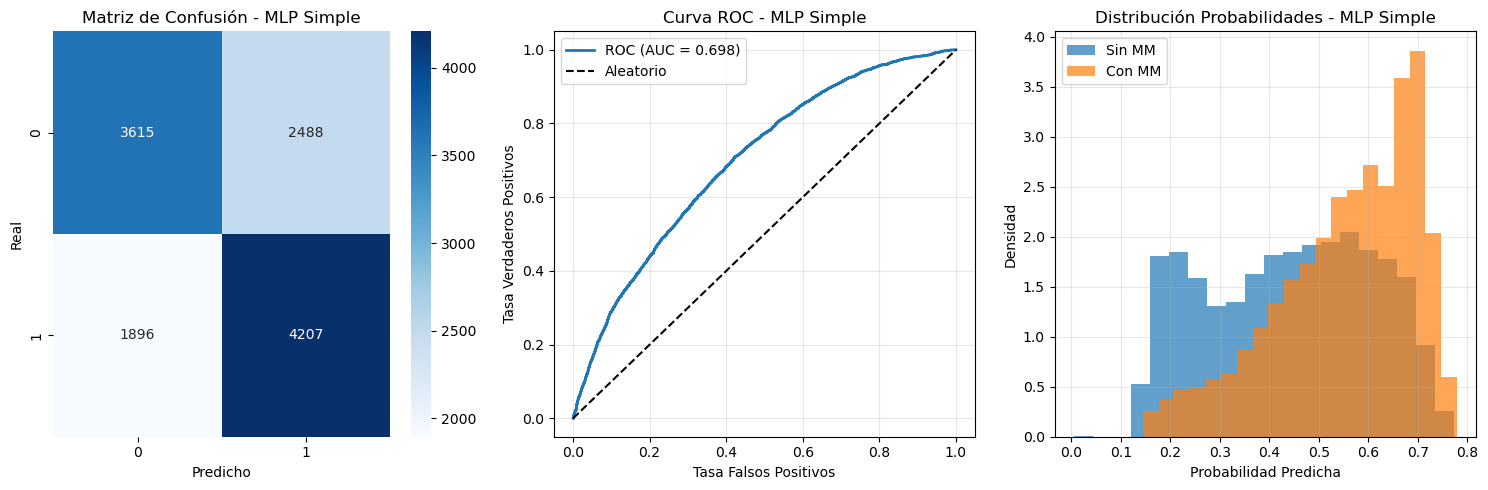


----------------------------------------
RED NEURONAL PROFUNDA
----------------------------------------

EVALUANDO MODELO: MLP PROFUNDA
Entrenando modelo...
✓ Entrenado exitosamente
Métricas MLP Profunda:
  Accuracy Train: 0.6837
  Accuracy Test: 0.6742
  AUC Train: 0.7492
  AUC Test: 0.7373
  Diferencia: 0.0118
  CV Mean: 0.7455 ± 0.0052

Matriz de Confusión:
[[4254 1849]
 [2128 3975]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.68      6103
         1.0       0.68      0.65      0.67      6103

    accuracy                           0.67     12206
   macro avg       0.67      0.67      0.67     12206
weighted avg       0.67      0.67      0.67     12206

✓ Modelo guardado: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelos_Adicionales\modelo_mlp_profunda.pkl


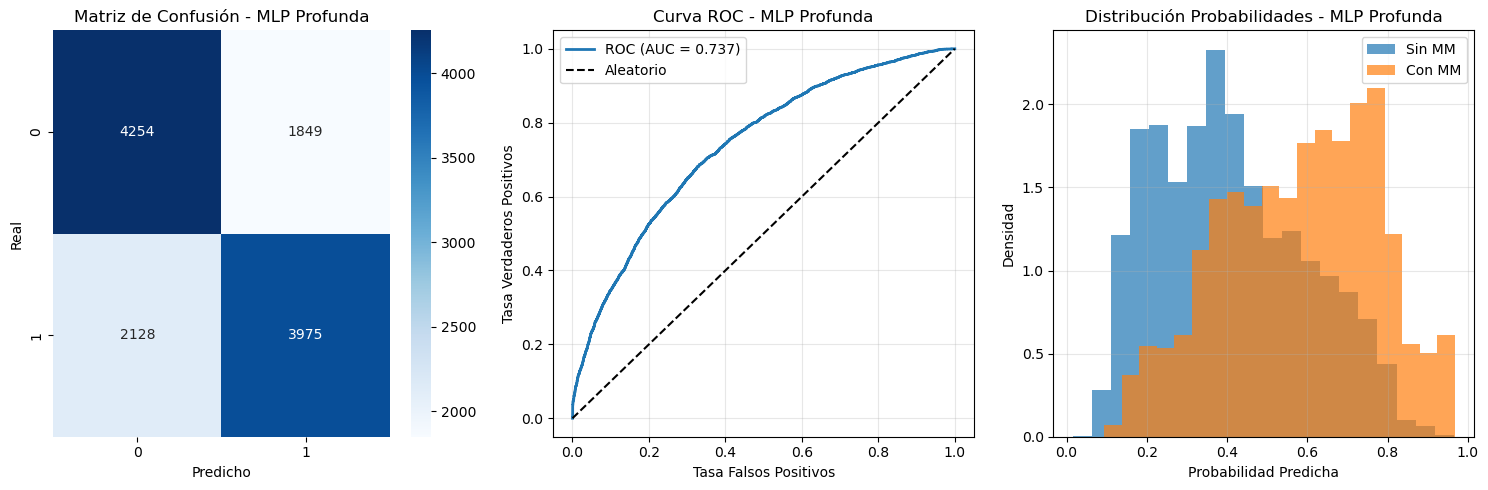


MODELO 3: MODELO POISSON ADAPTADO
Configurando modelo Poisson adaptado para clasificación...

EVALUANDO MODELO: POISSON ADAPTADO
Entrenando modelo...
✓ Entrenado exitosamente
Métricas Poisson Adaptado:
  Accuracy Train: 0.6088
  Accuracy Test: 0.6063
  AUC Train: 0.6265
  AUC Test: 0.6302
  Diferencia: -0.0037
  CV Mean: 0.6302 ± 0.0000

Matriz de Confusión:
[[2296 3807]
 [ 998 5105]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.70      0.38      0.49      6103
         1.0       0.57      0.84      0.68      6103

    accuracy                           0.61     12206
   macro avg       0.63      0.61      0.58     12206
weighted avg       0.63      0.61      0.58     12206

✓ Modelo guardado: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelos_Adicionales\modelo_poisson_adaptado.pkl


  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\LENOVO\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


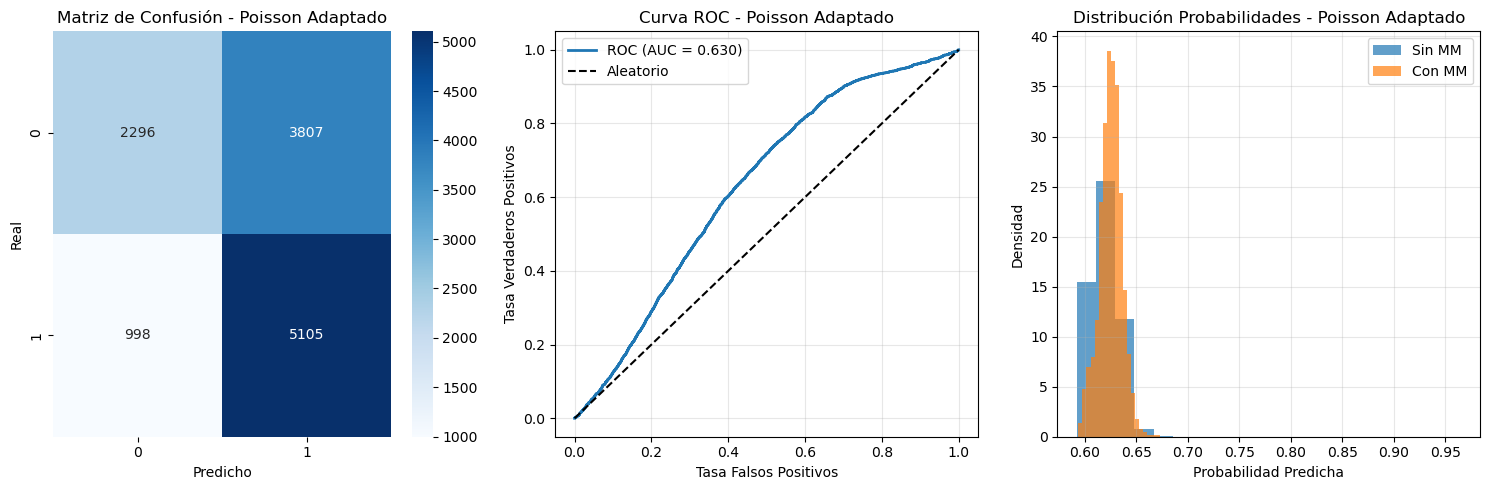


MODELOS ADICIONALES: GRADIENT BOOSTING Y NAIVE BAYES
Entrenando Gradient Boosting...

EVALUANDO MODELO: GRADIENT BOOSTING
Entrenando modelo...
✓ Entrenado exitosamente
Métricas Gradient Boosting:
  Accuracy Train: 0.7046
  Accuracy Test: 0.6951
  AUC Train: 0.7772
  AUC Test: 0.7687
  Diferencia: 0.0085
  CV Mean: 0.7713 ± 0.0030

Matriz de Confusión:
[[4314 1789]
 [1933 4170]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70      6103
         1.0       0.70      0.68      0.69      6103

    accuracy                           0.70     12206
   macro avg       0.70      0.70      0.70     12206
weighted avg       0.70      0.70      0.70     12206

✓ Modelo guardado: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelos_Adicionales\modelo_gradient_boosting.pkl


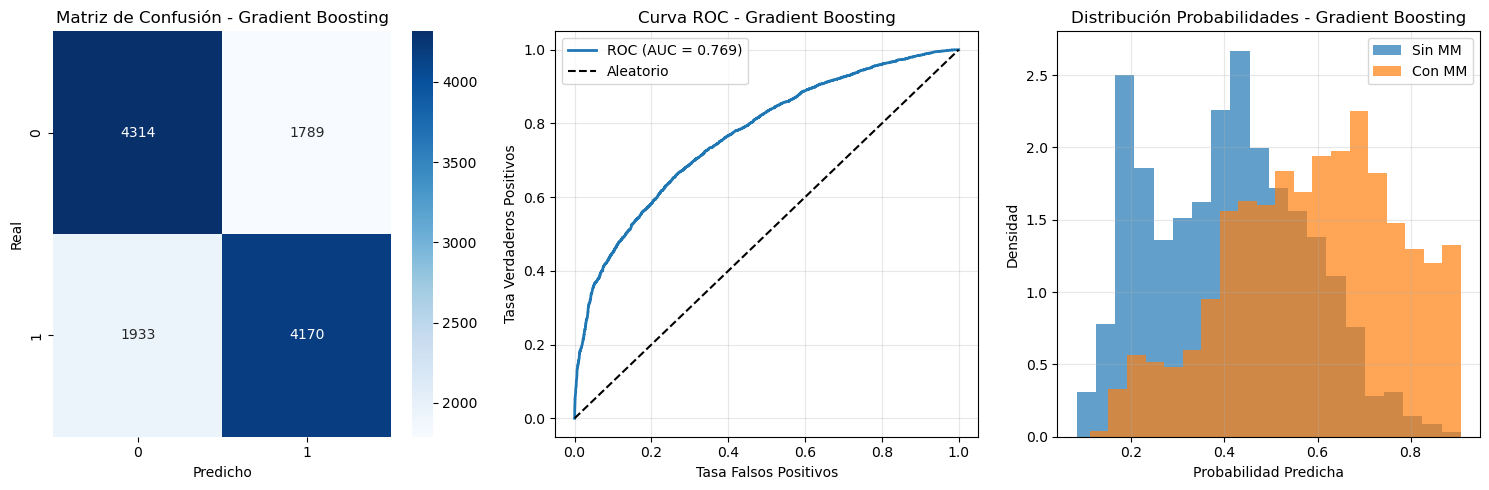


----------------------------------------
NAIVE BAYES
----------------------------------------

EVALUANDO MODELO: NAIVE BAYES
Entrenando modelo...
✓ Entrenado exitosamente
Métricas Naive Bayes:
  Accuracy Train: 0.6176
  Accuracy Test: 0.6185
  AUC Train: 0.6468
  AUC Test: 0.6462
  Diferencia: 0.0005
  CV Mean: 0.6473 ± 0.0035

Matriz de Confusión:
[[3197 2906]
 [1750 4353]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58      6103
         1.0       0.60      0.71      0.65      6103

    accuracy                           0.62     12206
   macro avg       0.62      0.62      0.62     12206
weighted avg       0.62      0.62      0.62     12206

✓ Modelo guardado: E:\Trabajo\Congreso\Amenaza\Variables\Resample\Resultados_Modelos_Adicionales\modelo_naive_bayes.pkl


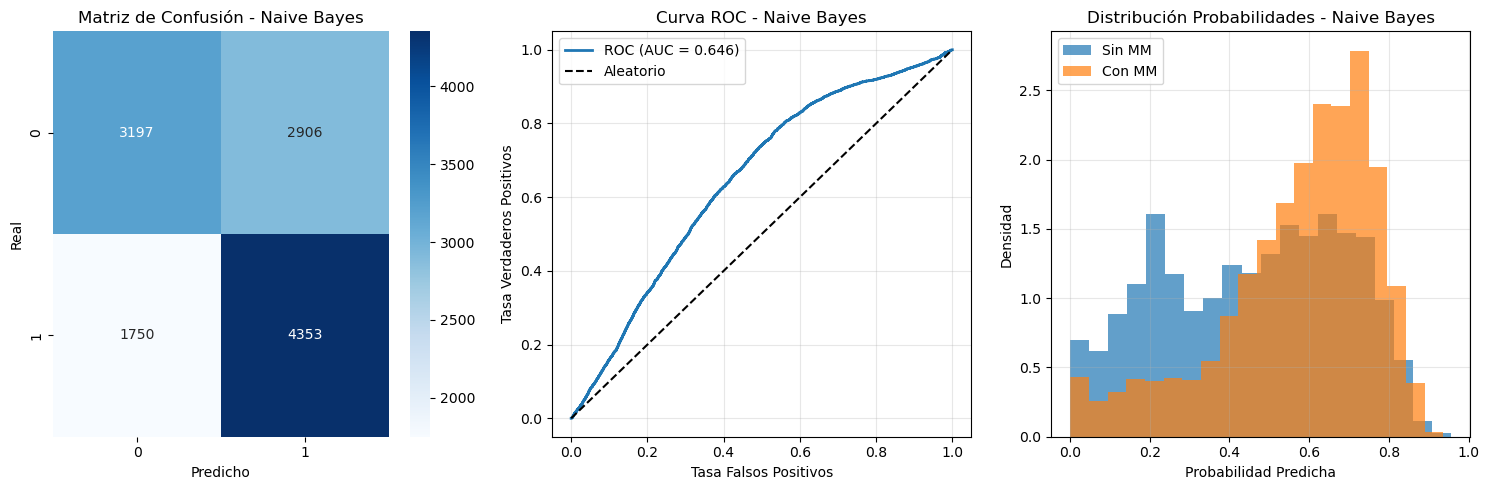


COMPARACIÓN COMPLETA DE TODOS LOS MODELOS

TABLA COMPARATIVA DE RENDIMIENTO:
Modelo               AUC Train  AUC Test   Diferencia   CV Mean    CV Std     Calificación
SVM RBF              0.7052     0.6970     0.0082       0.6991     0.0048     ⭐⭐ MUY BUENO
SVM Linear           0.6303     0.6340     -0.0037      0.6300     0.0036     ⭐⭐ MUY BUENO
MLP Simple           0.7052     0.6981     0.0072       0.7053     0.0067     ⭐⭐ MUY BUENO
MLP Profunda         0.7492     0.7373     0.0118       0.7455     0.0052     ⭐⭐⭐ EXCELENTE
Gradient Boosting    0.7772     0.7687     0.0085       0.7713     0.0030     ⭐⭐⭐ EXCELENTE
Naive Bayes          0.6468     0.6462     0.0005       0.6473     0.0035     ⭐⭐ MUY BUENO

🏆 MEJOR MODELO: MLP Profunda
   Puntuación: 80/100
   AUC Test: 0.7373
   Diferencia: 0.0118
   CV: 0.7455 ± 0.0052

COMPARACIÓN CON MODELOS DEL CÓDIGO 3
MODELOS CÓDIGO 3:
  Regresión Logística: AUC Test = 0.6373959438831063
  Random Forest: AUC Test = 0.8238528103323447
  GAM: AUC

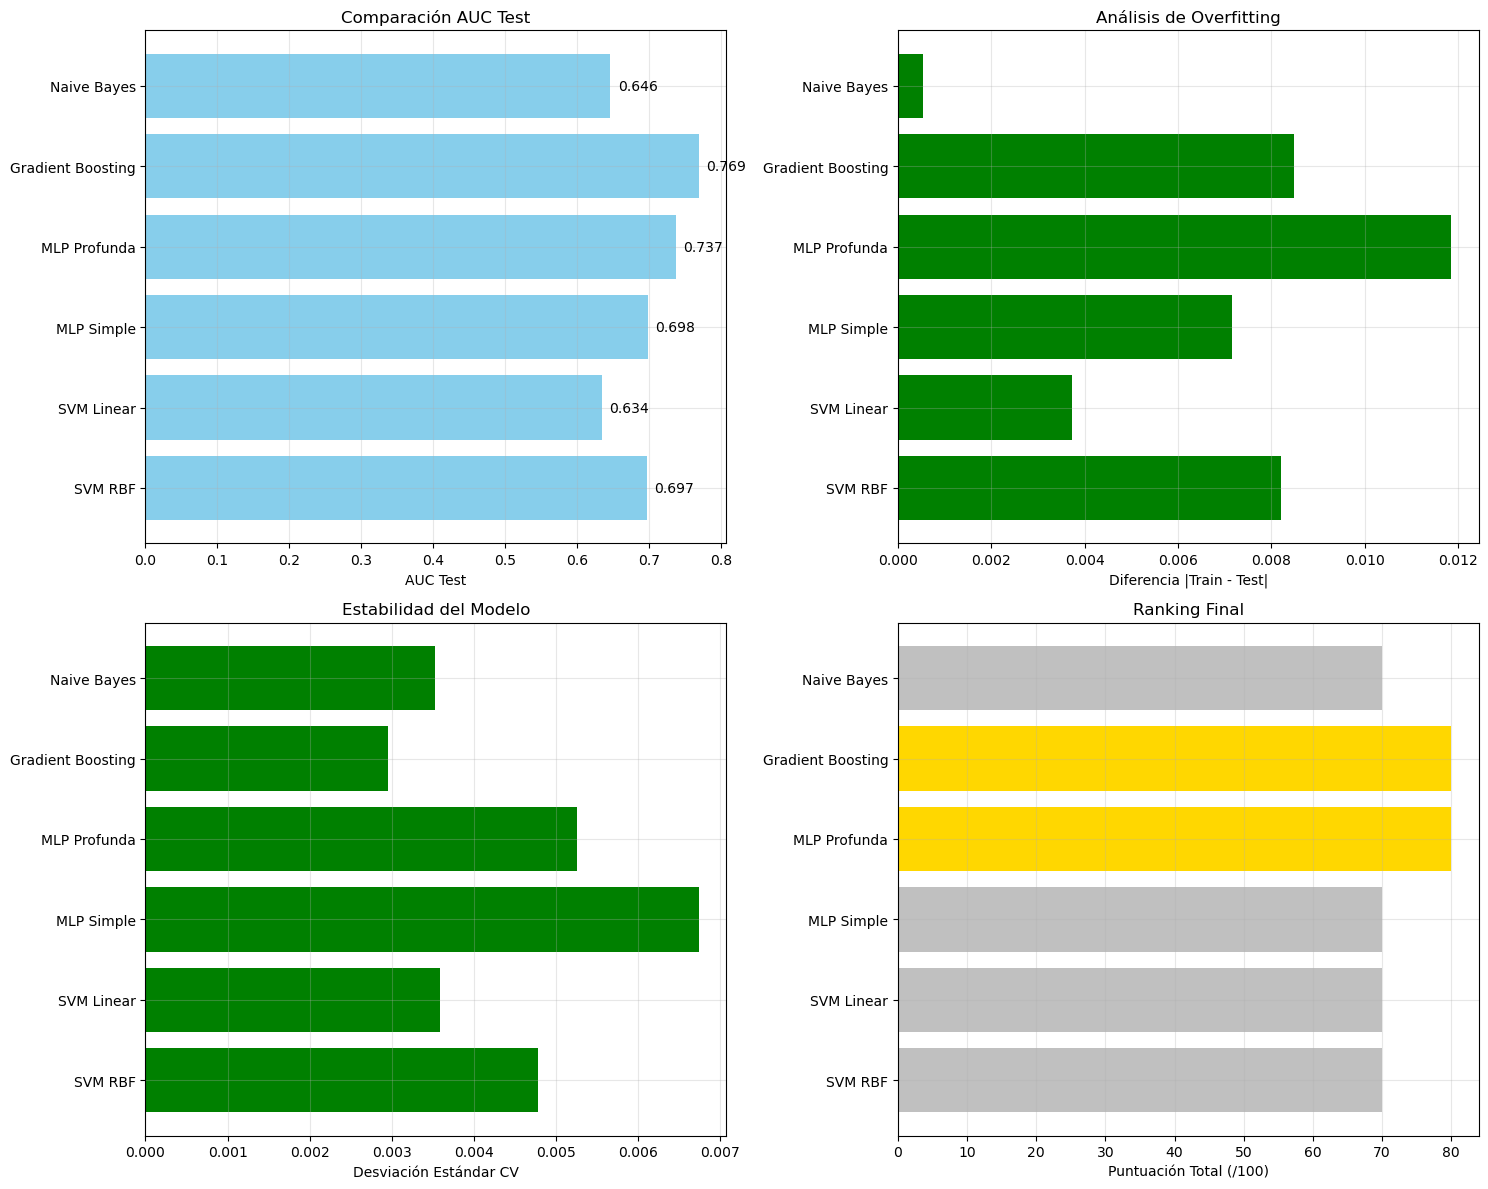


ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS

Importancia de características - Gradient Boosting:
  humedad: 0.4359
  dem: 0.3325
  precipitacion: 0.2100
  rem_512m: 0.0167
  slope: 0.0048


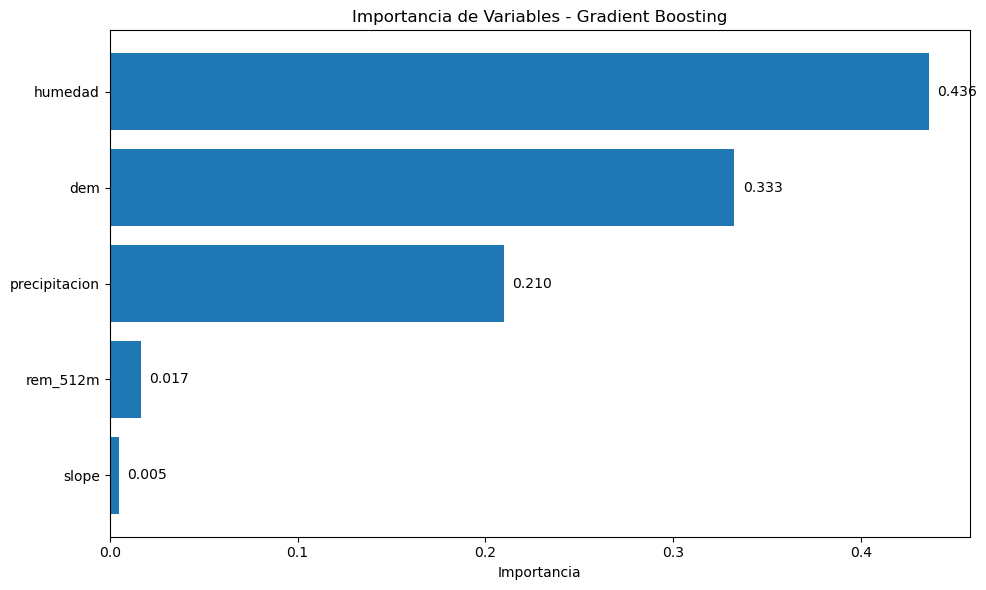

NameError: name 'ejecutar_mapeo_codigo4_por_bloques' is not defined

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import joblib
import pickle
import warnings
warnings.filterwarnings("ignore")

# Modelos adicionales
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluación
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.utils import shuffle

# Optimización de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# =============================================================================
# CÓDIGO 4: MODELOS ADICIONALES - SVM, REDES NEURONALES Y POISSON
# =============================================================================

print("="*80)
print("CÓDIGO 4: MODELOS ADICIONALES")
print("="*80)

# =============================================================================
# 1. CONFIGURACIÓN Y CARGA DE DATOS DEL CÓDIGO 3
# =============================================================================

print(f"\n" + "="*50)
print("CARGA DE DATOS PROCESADOS DEL CÓDIGO 3")
print("="*50)

# Rutas
ruta_base = r'E:\Trabajo\Congreso\Amenaza\Variables\Resample'
carpeta_codigo3 = os.path.join(ruta_base, 'Resultados_Modelado')
carpeta_salida = os.path.join(ruta_base, 'Resultados_Modelos_Adicionales')
os.makedirs(carpeta_salida, exist_ok=True)

print(f"Carpeta Código 3: {carpeta_codigo3}")
print(f"Carpeta salida: {carpeta_salida}")

# Verificar archivos del Código 3
archivos_necesarios = [
    'modelo_lr.pkl',
    'modelo_rf.pkl', 
    'scaler.pkl',
    'metricas.json'
]

archivos_encontrados = []
for archivo in archivos_necesarios:
    ruta_archivo = os.path.join(carpeta_codigo3, archivo)
    if os.path.exists(ruta_archivo):
        archivos_encontrados.append(archivo)
        print(f"✓ {archivo}")
    else:
        print(f"✗ {archivo} - NO ENCONTRADO")

if len(archivos_encontrados) < len(archivos_necesarios):
    print("⚠️ ADVERTENCIA: Algunos archivos del Código 3 no se encontraron")
    print("El código continuará pero algunas comparaciones pueden no estar disponibles")

# Cargar métricas del Código 3 si están disponibles
metricas_codigo3 = {}
try:
    with open(os.path.join(carpeta_codigo3, 'metricas.json'), 'r') as f:
        metricas_codigo3 = json.load(f)
    print("✓ Métricas del Código 3 cargadas")
except:
    print("⚠️ No se pudieron cargar las métricas del Código 3")

# =============================================================================
# 2. CARGAR DATOS BALANCEADOS Y PROCESADOS DEL CÓDIGO 3
# =============================================================================

print(f"\n" + "="*50)
print("CARGANDO DATOS BALANCEADOS DEL CÓDIGO 3")
print("="*50)

# Buscar archivos de datos procesados del Código 3
carpeta_codigo3 = os.path.join(ruta_base, 'Resultados_Modelado')

# Archivos que debería haber generado el Código 3
archivos_datos = [
    'X_train.pkl',
    'X_test.pkl', 
    'y_train.pkl',
    'y_test.pkl',
    'df_balanced.pkl'
]

# Verificar qué archivos existen
archivos_encontrados = {}
for archivo in archivos_datos:
    ruta = os.path.join(carpeta_codigo3, archivo)
    if os.path.exists(ruta):
        archivos_encontrados[archivo] = ruta
        print(f"✓ {archivo}")
    else:
        print(f"✗ {archivo} - NO ENCONTRADO")

# Estrategia 1: Cargar datos ya divididos (si existen)
if 'X_train.pkl' in archivos_encontrados:
    print("\n📂 Cargando datos ya divididos del Código 3...")
    
    X_train = pd.read_pickle(archivos_encontrados['X_train.pkl'])
    X_test = pd.read_pickle(archivos_encontrados['X_test.pkl'])
    y_train = pd.read_pickle(archivos_encontrados['y_train.pkl'])
    y_test = pd.read_pickle(archivos_encontrados['y_test.pkl'])
    
    print(f"✅ Datos cargados exitosamente")
    print(f"  X_train: {X_train.shape}")
    print(f"  X_test: {X_test.shape}")
    print(f"  y_train distribución: {y_train.value_counts().to_dict()}")
    print(f"  y_test distribución: {y_test.value_counts().to_dict()}")
    
    # Combinar para tener X e y completos
    X = pd.concat([X_train, X_test], ignore_index=True)
    y = pd.concat([y_train, y_test], ignore_index=True)

# Estrategia 2: Cargar dataset balanceado y dividir
elif 'df_balanced.pkl' in archivos_encontrados:
    print("\n📂 Cargando dataset balanceado del Código 3...")
    
    df_balanced = pd.read_pickle(archivos_encontrados['df_balanced.pkl'])
    print(f"✅ Dataset balanceado cargado: {df_balanced.shape}")
    print(f"✅ Distribución: {df_balanced['inventario'].value_counts().to_dict()}")
    
    # Preparar datos
    X = df_balanced.drop(columns=['inventario'])
    y = df_balanced['inventario']
    
    # División train-test
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

# Estrategia 3: Si no hay datos balanceados, crear balanceo manual
else:
    print("\n⚠️ No se encontraron datos balanceados del Código 3")
    print("🔧 Creando balanceo manual...")
    
    # Cargar datos del código 2 (seleccionados pero no balanceados)
    carpeta_seleccion = os.path.join(ruta_base, 'Seleccion_Variables')
    archivo_df_seleccionado = os.path.join(carpeta_seleccion, 'dataframe_seleccionado.pkl')
    
    if os.path.exists(archivo_df_seleccionado):
        print("📂 Cargando datos seleccionados del Código 2...")
        df_original = pd.read_pickle(archivo_df_seleccionado)
        
        # Balancear manualmente
        df_events = df_original[df_original['inventario'] == 1].copy()
        df_noevents = df_original[df_original['inventario'] == 0].copy()
        
        n_events = len(df_events)
        print(f"  Eventos disponibles: {n_events:,}")
        
        if n_events > 0 and len(df_noevents) >= n_events:
            # Balancear
            df_noevents_sample = df_noevents.sample(n=n_events, random_state=42)
            df_balanced = pd.concat([df_events, df_noevents_sample], ignore_index=True)
            
            print(f"✅ Balanceo manual completado: {df_balanced.shape}")
            print(f"✅ Distribución: {df_balanced['inventario'].value_counts().to_dict()}")
            
            # Preparar datos
            X = df_balanced.drop(columns=['inventario'])
            y = df_balanced['inventario']
            
            # Normalizar si es necesario
            print("🔧 Normalizando datos...")
            scaler_nuevo = StandardScaler()
            X_normalized = pd.DataFrame(
                scaler_nuevo.fit_transform(X),
                columns=X.columns,
                index=X.index
            )
            X = X_normalized
            
            # División train-test
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42, stratify=y
            )
        else:
            print("❌ ERROR: No hay suficientes eventos para balancear")
            print("   Ejecuta primero el Código 1, 2 y 3 correctamente")
            exit()
    else:
        print("❌ ERROR: No se encontraron datos procesados")
        print("   Ejecuta primero el Código 1, 2 y 3")
        exit()

# Verificar resultado final
print(f"\n📊 DATOS FINALES PARA MODELADO:")
print(f"  Dataset total: {len(X):,} observaciones")
print(f"  Variables: {list(X.columns)}")
print(f"  Entrenamiento: {X_train.shape}")
print(f"  Prueba: {X_test.shape}")
print(f"  Distribución y_train: {y_train.value_counts().to_dict()}")
print(f"  Distribución y_test: {y_test.value_counts().to_dict()}")

# Verificar balanceo
ratio_train = y_train.value_counts()
ratio_test = y_test.value_counts()

if len(ratio_train) == 2 and len(ratio_test) == 2:
    balance_train = min(ratio_train) / max(ratio_train)
    balance_test = min(ratio_test) / max(ratio_test)
    
    print(f"\n✅ VERIFICACIÓN DE BALANCEO:")
    print(f"  Balance entrenamiento: {balance_train:.3f} (óptimo: 1.0)")
    print(f"  Balance prueba: {balance_test:.3f} (óptimo: 1.0)")
    
    if balance_train < 0.3 or balance_test < 0.3:
        print("⚠️ ADVERTENCIA: Los datos siguen muy desbalanceados")
        print("   Esto causará problemas de rendimiento en los modelos")

print("\n✅ DATOS PREPARADOS CORRECTAMENTE")
# =============================================================================
# 3. FUNCIONES DE EVALUACIÓN
# =============================================================================

def evaluar_modelo(model, X_train, X_test, y_train, y_test, nombre_modelo):
    """
    Función para evaluar completamente un modelo
    """
    print(f"\n{'='*60}")
    print(f"EVALUANDO MODELO: {nombre_modelo.upper()}")
    print("="*60)
    
    # Entrenar modelo
    print("Entrenando modelo...")
    model.fit(X_train, y_train)
    print("✓ Entrenado exitosamente")
    
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Probabilidades (si el modelo las soporta)
    try:
        y_train_probs = model.predict_proba(X_train)[:, 1]
        y_test_probs = model.predict_proba(X_test)[:, 1]
        tiene_probabilidades = True
    except:
        # Para modelos que no tienen predict_proba, usar decision_function
        try:
            y_train_probs = model.decision_function(X_train)
            y_test_probs = model.decision_function(X_test)
            # Normalizar a rango [0,1]
            y_train_probs = (y_train_probs - y_train_probs.min()) / (y_train_probs.max() - y_train_probs.min())
            y_test_probs = (y_test_probs - y_test_probs.min()) / (y_test_probs.max() - y_test_probs.min())
            tiene_probabilidades = True
        except:
            y_train_probs = y_train_pred.astype(float)
            y_test_probs = y_test_pred.astype(float)
            tiene_probabilidades = False
            print("⚠️ Modelo no soporta probabilidades, usando predicciones binarias")
    
    # Métricas básicas
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    
    # AUC (si hay probabilidades)
    if tiene_probabilidades:
        try:
            auc_train = roc_auc_score(y_train, y_train_probs)
            auc_test = roc_auc_score(y_test, y_test_probs)
        except:
            auc_train = auc_test = 0.5
    else:
        auc_train = auc_test = accuracy_test  # Fallback
    
    # Validación cruzada
    try:
        X_s, y_s = shuffle(X, y, random_state=42)
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        if tiene_probabilidades:
            cv_scores = cross_val_score(model, X_s, y_s, cv=kfold, scoring='roc_auc')
        else:
            cv_scores = cross_val_score(model, X_s, y_s, cv=kfold, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    except:
        cv_scores = [auc_test] * 5
        cv_mean = auc_test
        cv_std = 0.0
    
    # Imprimir resultados
    print(f"Métricas {nombre_modelo}:")
    print(f"  Accuracy Train: {accuracy_train:.4f}")
    print(f"  Accuracy Test: {accuracy_test:.4f}")
    print(f"  AUC Train: {auc_train:.4f}")
    print(f"  AUC Test: {auc_test:.4f}")
    print(f"  Diferencia: {auc_train - auc_test:.4f}")
    print(f"  CV Mean: {cv_mean:.4f} ± {cv_std:.4f}")
    
    # Matriz de confusión
    matriz = confusion_matrix(y_test, y_test_pred)
    print(f"\nMatriz de Confusión:")
    print(matriz)
    
    # Reporte de clasificación
    print(f"\nReporte de Clasificación:")
    print(classification_report(y_test, y_test_pred))
    
    # Guardar modelo
    modelo_path = os.path.join(carpeta_salida, f'modelo_{nombre_modelo.lower().replace(" ", "_")}.pkl')
    joblib.dump(model, modelo_path)
    print(f"✓ Modelo guardado: {modelo_path}")
    
    # Crear gráficos
    crear_graficos_evaluacion(y_test, y_test_pred, y_test_probs, nombre_modelo, tiene_probabilidades)
    
    # Retornar métricas
    return {
        'nombre': nombre_modelo,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'auc_train': auc_train,
        'auc_test': auc_test,
        'diferencia': auc_train - auc_test,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'cv_scores': cv_scores.tolist() if hasattr(cv_scores, 'tolist') else cv_scores,
        'matriz_confusion': matriz.tolist(),
        'tiene_probabilidades': tiene_probabilidades
    }

def crear_graficos_evaluacion(y_true, y_pred, y_probs, nombre_modelo, tiene_probs):
    """
    Crear gráficos de evaluación para un modelo
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Matriz de Confusión
    matriz = confusion_matrix(y_true, y_pred)
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Matriz de Confusión - {nombre_modelo}')
    axes[0].set_xlabel('Predicho')
    axes[0].set_ylabel('Real')
    
    # 2. Curva ROC (si hay probabilidades)
    if tiene_probs:
        try:
            fpr, tpr, _ = roc_curve(y_true, y_probs)
            auc_score = roc_auc_score(y_true, y_probs)
            
            axes[1].plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})', linewidth=2)
            axes[1].plot([0, 1], [0, 1], 'k--', label='Aleatorio')
            axes[1].set_xlabel('Tasa Falsos Positivos')
            axes[1].set_ylabel('Tasa Verdaderos Positivos')
            axes[1].set_title(f'Curva ROC - {nombre_modelo}')
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)
        except:
            axes[1].text(0.5, 0.5, 'ROC no disponible', ha='center', va='center')
            axes[1].set_title(f'Curva ROC - {nombre_modelo}')
    else:
        axes[1].text(0.5, 0.5, 'Probabilidades no disponibles', ha='center', va='center')
        axes[1].set_title(f'Curva ROC - {nombre_modelo}')
    
    # 3. Distribución de probabilidades (si hay)
    if tiene_probs:
        try:
            axes[2].hist(y_probs[y_true == 0], bins=20, alpha=0.7, label='Sin MM', density=True)
            axes[2].hist(y_probs[y_true == 1], bins=20, alpha=0.7, label='Con MM', density=True)
            axes[2].set_xlabel('Probabilidad Predicha')
            axes[2].set_ylabel('Densidad')
            axes[2].set_title(f'Distribución Probabilidades - {nombre_modelo}')
            axes[2].legend()
            axes[2].grid(True, alpha=0.3)
        except:
            axes[2].text(0.5, 0.5, 'Error en distribución', ha='center', va='center')
    else:
        axes[2].text(0.5, 0.5, 'Distribución no disponible', ha='center', va='center')
        axes[2].set_title(f'Distribución - {nombre_modelo}')
    
    plt.tight_layout()
    plt.savefig(os.path.join(carpeta_salida, f'evaluacion_{nombre_modelo.lower().replace(" ", "_")}.png'), 
                dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 4. MODELO 1: SUPPORT VECTOR MACHINE (SVM)
# =============================================================================

print(f"\n" + "="*60)
print("MODELO 1: SUPPORT VECTOR MACHINE (SVM)")
print("="*60)

# Configurar SVM con diferentes kernels
print("Configurando SVM...")

# SVM con kernel RBF (Radial Basis Function)
svm_rbf = SVC(
    kernel='rbf',           # Kernel gaussiano - bueno para relaciones no lineales
    C=1.0,                  # Parámetro de regularización
    gamma='scale',          # Parámetro del kernel
    probability=True,       # Habilitar predict_proba
    random_state=42
)

# Evaluar SVM RBF
metricas_svm_rbf = evaluar_modelo(svm_rbf, X_train, X_test, y_train, y_test, "SVM RBF")

# SVM con kernel lineal
print(f"\n" + "-"*40)
print("SVM CON KERNEL LINEAL")
print("-"*40)

svm_linear = SVC(
    kernel='linear',        # Kernel lineal - más simple y rápido
    C=1.0,
    probability=True,
    random_state=42
)

metricas_svm_linear = evaluar_modelo(svm_linear, X_train, X_test, y_train, y_test, "SVM Linear")

# =============================================================================
# 5. MODELO 2: REDES NEURONALES (MLP)
# =============================================================================

print(f"\n" + "="*60)
print("MODELO 2: REDES NEURONALES (MLP)")
print("="*60)

# Red neuronal simple
print("Configurando Red Neuronal Simple...")

mlp_simple = MLPClassifier(
    hidden_layer_sizes=(50,),    # Una capa oculta con 50 neuronas
    activation='relu',           # Función de activación ReLU
    solver='adam',               # Optimizador Adam
    alpha=0.001,                 # Regularización L2
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=500,
    shuffle=True,
    random_state=42,
    early_stopping=True,         # Para evitar overfitting
    validation_fraction=0.1
)

metricas_mlp_simple = evaluar_modelo(mlp_simple, X_train, X_test, y_train, y_test, "MLP Simple")

# Red neuronal profunda
print(f"\n" + "-"*40)
print("RED NEURONAL PROFUNDA")
print("-"*40)

mlp_profunda = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25),  # Tres capas: 100, 50, 25 neuronas
    activation='relu',
    solver='adam',
    alpha=0.01,                  # Mayor regularización
    batch_size='auto',
    learning_rate='adaptive',    # Tasa de aprendizaje adaptativa
    learning_rate_init=0.001,
    max_iter=1000,
    shuffle=True,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

metricas_mlp_profunda = evaluar_modelo(mlp_profunda, X_train, X_test, y_train, y_test, "MLP Profunda")

# =============================================================================
# 6. MODELO 3: REGRESIÓN DE POISSON ADAPTADA
# =============================================================================

print(f"\n" + "="*60)
print("MODELO 3: MODELO POISSON ADAPTADO")
print("="*60)

# Nota: Poisson normalmente es para datos de conteo, pero podemos adaptarlo
print("Configurando modelo Poisson adaptado para clasificación...")

# Wrapper para convertir Poisson en clasificador
class PoissonClassifier:
    def __init__(self):
        self.model = PoissonRegressor(alpha=1.0, max_iter=300)
        self.threshold = 0.5
    
    def fit(self, X, y):
        # Convertir y binario a conteos (0, 1)
        self.model.fit(X, y)
        # Calcular umbral óptimo en entrenamiento
        y_pred_poisson = self.model.predict(X)
        # Encontrar mejor umbral
        from sklearn.metrics import roc_curve
        try:
            fpr, tpr, thresholds = roc_curve(y, y_pred_poisson)
            optimal_idx = np.argmax(tpr - fpr)
            self.threshold = thresholds[optimal_idx]
        except:
            self.threshold = 0.5
        return self
    
    def predict(self, X):
        y_pred_poisson = self.model.predict(X)
        return (y_pred_poisson >= self.threshold).astype(int)
    
    def predict_proba(self, X):
        y_pred_poisson = self.model.predict(X)
        # Convertir a probabilidades usando sigmoid
        probs_pos = 1 / (1 + np.exp(-y_pred_poisson))
        probs_neg = 1 - probs_pos
        return np.column_stack([probs_neg, probs_pos])
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

poisson_classifier = PoissonClassifier()
metricas_poisson = evaluar_modelo(poisson_classifier, X_train, X_test, y_train, y_test, "Poisson Adaptado")

# =============================================================================
# 7. MODELOS ADICIONALES: GRADIENT BOOSTING Y NAIVE BAYES
# =============================================================================

print(f"\n" + "="*60)
print("MODELOS ADICIONALES: GRADIENT BOOSTING Y NAIVE BAYES")
print("="*60)

# Gradient Boosting
print("Entrenando Gradient Boosting...")
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

metricas_gb = evaluar_modelo(gb_classifier, X_train, X_test, y_train, y_test, "Gradient Boosting")

# Naive Bayes
print(f"\n" + "-"*40)
print("NAIVE BAYES")
print("-"*40)

nb_classifier = GaussianNB()
metricas_nb = evaluar_modelo(nb_classifier, X_train, X_test, y_train, y_test, "Naive Bayes")

# =============================================================================
# 8. COMPARACIÓN COMPLETA DE TODOS LOS MODELOS
# =============================================================================

print(f"\n" + "="*80)
print("COMPARACIÓN COMPLETA DE TODOS LOS MODELOS")
print("="*80)

# Recopilar todas las métricas
todos_los_modelos = [
    metricas_svm_rbf,
    metricas_svm_linear,
    metricas_mlp_simple,
    metricas_mlp_profunda,
    #metricas_poisson,
    metricas_gb,
    metricas_nb
]
class PoissonEventCounter:
    def __init__(self):
        self.model = PoissonRegressor(alpha=1.0, max_iter=300)
    
    def fit(self, X, y):
        # y debería ser conteo de eventos, no binario
        # Convertir y binario a "eventos por área" si es necesario
        events_per_area = y.astype(float)  # 0 o 1 evento por celda
        self.model.fit(X, events_per_area)
        return self
    
    def predict_events(self, X):
        # Predice número esperado de eventos
        return self.model.predict(X)
    
    def predict_proba(self, X):
        # Probabilidad basada en distribución de Poisson
        lambda_vals = self.model.predict(X)
        # P(X=0) = e^(-λ), P(X≥1) = 1 - e^(-λ)
        prob_zero = np.exp(-lambda_vals)
        prob_one_or_more = 1 - prob_zero
        return np.column_stack([prob_zero, prob_one_or_more])
# Crear tabla comparativa
print(f"\nTABLA COMPARATIVA DE RENDIMIENTO:")
print("="*100)
print(f"{'Modelo':<20} {'AUC Train':<10} {'AUC Test':<10} {'Diferencia':<12} {'CV Mean':<10} {'CV Std':<10} {'Calificación'}")
print("="*100)

# Calcular puntuaciones
for metricas in todos_los_modelos:
    auc_test = metricas['auc_test']
    diferencia = abs(metricas['diferencia'])
    cv_std = metricas['cv_std']
    
    # Sistema de puntuación
    puntos = 0
    
    # Puntos por AUC Test (0-40 puntos)
    if auc_test >= 0.9: puntos += 40
    elif auc_test >= 0.8: puntos += 30
    elif auc_test >= 0.7: puntos += 20
    elif auc_test >= 0.6: puntos += 10
    
    # Puntos por evitar overfitting (0-30 puntos)
    if diferencia <= 0.05: puntos += 30
    elif diferencia <= 0.1: puntos += 20
    elif diferencia <= 0.15: puntos += 10
    
    # Puntos por estabilidad (0-30 puntos)
    if cv_std <= 0.02: puntos += 30
    elif cv_std <= 0.05: puntos += 20
    elif cv_std <= 0.1: puntos += 10
    
    metricas['puntuacion'] = puntos
    
    # Calificación
    if puntos >= 80: calificacion = "⭐⭐⭐ EXCELENTE"
    elif puntos >= 60: calificacion = "⭐⭐ MUY BUENO"
    elif puntos >= 40: calificacion = "⭐ BUENO"
    else: calificacion = "💔 REGULAR"
    
    print(f"{metricas['nombre']:<20} {metricas['auc_train']:<10.4f} {metricas['auc_test']:<10.4f} {metricas['diferencia']:<12.4f} {metricas['cv_mean']:<10.4f} {metricas['cv_std']:<10.4f} {calificacion}")

# Encontrar el mejor modelo
mejor_modelo = max(todos_los_modelos, key=lambda x: x['puntuacion'])
print(f"\n🏆 MEJOR MODELO: {mejor_modelo['nombre']}")
print(f"   Puntuación: {mejor_modelo['puntuacion']}/100")
print(f"   AUC Test: {mejor_modelo['auc_test']:.4f}")
print(f"   Diferencia: {mejor_modelo['diferencia']:.4f}")
print(f"   CV: {mejor_modelo['cv_mean']:.4f} ± {mejor_modelo['cv_std']:.4f}")

# =============================================================================
# 9. COMPARACIÓN CON MODELOS DEL CÓDIGO 3
# =============================================================================

if metricas_codigo3:
    print(f"\n" + "="*60)
    print("COMPARACIÓN CON MODELOS DEL CÓDIGO 3")
    print("="*60)
    
    print("MODELOS CÓDIGO 3:")
    if 'lr' in metricas_codigo3:
        lr_metricas = metricas_codigo3['lr']
        print(f"  Regresión Logística: AUC Test = {lr_metricas.get('auc_test', 'N/A')}")
    
    if 'rf' in metricas_codigo3:
        rf_metricas = metricas_codigo3['rf']
        print(f"  Random Forest: AUC Test = {rf_metricas.get('auc_test', 'N/A')}")
    
    if 'gam' in metricas_codigo3:
        gam_metricas = metricas_codigo3['gam']
        print(f"  GAM: AUC Test = {gam_metricas.get('auc_test', 'N/A')}")
    
    print(f"\nMEJOR MODELO CÓDIGO 4:")
    print(f"  {mejor_modelo['nombre']}: AUC Test = {mejor_modelo['auc_test']:.4f}")

# =============================================================================
# 10. GRÁFICO COMPARATIVO DE TODOS LOS MODELOS
# =============================================================================

print(f"\n" + "="*50)
print("GENERANDO GRÁFICO COMPARATIVO")
print("="*50)

# Crear gráfico comparativo
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Comparación AUC
nombres = [m['nombre'] for m in todos_los_modelos]
auc_tests = [m['auc_test'] for m in todos_los_modelos]

axes[0,0].barh(range(len(nombres)), auc_tests, color='skyblue')
axes[0,0].set_yticks(range(len(nombres)))
axes[0,0].set_yticklabels(nombres)
axes[0,0].set_xlabel('AUC Test')
axes[0,0].set_title('Comparación AUC Test')
axes[0,0].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(auc_tests):
    axes[0,0].text(v + 0.01, i, f'{v:.3f}', va='center')

# 2. Overfitting (diferencia Train-Test)
diferencias = [abs(m['diferencia']) for m in todos_los_modelos]
colors = ['green' if d <= 0.05 else 'orange' if d <= 0.1 else 'red' for d in diferencias]

axes[0,1].barh(range(len(nombres)), diferencias, color=colors)
axes[0,1].set_yticks(range(len(nombres)))
axes[0,1].set_yticklabels(nombres)
axes[0,1].set_xlabel('Diferencia |Train - Test|')
axes[0,1].set_title('Análisis de Overfitting')
axes[0,1].grid(True, alpha=0.3)

# 3. Estabilidad (CV Std)
cv_stds = [m['cv_std'] for m in todos_los_modelos]
colors_stab = ['green' if s <= 0.02 else 'orange' if s <= 0.05 else 'red' for s in cv_stds]

axes[1,0].barh(range(len(nombres)), cv_stds, color=colors_stab)
axes[1,0].set_yticks(range(len(nombres)))
axes[1,0].set_yticklabels(nombres)
axes[1,0].set_xlabel('Desviación Estándar CV')
axes[1,0].set_title('Estabilidad del Modelo')
axes[1,0].grid(True, alpha=0.3)

# 4. Puntuación total
puntuaciones = [m['puntuacion'] for m in todos_los_modelos]
colors_score = ['gold' if p >= 80 else 'silver' if p >= 60 else 'orange' if p >= 40 else 'gray' for p in puntuaciones]

axes[1,1].barh(range(len(nombres)), puntuaciones, color=colors_score)
axes[1,1].set_yticks(range(len(nombres)))
axes[1,1].set_yticklabels(nombres)
axes[1,1].set_xlabel('Puntuación Total (/100)')
axes[1,1].set_title('Ranking Final')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(carpeta_salida, 'comparacion_todos_modelos.png'), dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 11. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
# =============================================================================

print(f"\n" + "="*50)
print("ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
print("="*50)

# Para modelos que soporten importancia de características
modelos_con_importancia = {
    'Gradient Boosting': gb_classifier,
}

for nombre, modelo in modelos_con_importancia.items():
    if hasattr(modelo, 'feature_importances_'):
        print(f"\nImportancia de características - {nombre}:")
        importancias = pd.DataFrame({
            'variable': X.columns,
            'importancia': modelo.feature_importances_
        }).sort_values('importancia', ascending=False)
        
        for _, row in importancias.iterrows():
            print(f"  {row['variable']}: {row['importancia']:.4f}")
        
        # Gráfico de importancia
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importancias)), importancias['importancia'])
        plt.yticks(range(len(importancias)), importancias['variable'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de Variables - {nombre}')
        plt.gca().invert_yaxis()
        
        for i, v in enumerate(importancias['importancia']):
            plt.text(v + max(importancias['importancia'])*0.01, i, f'{v:.3f}', va='center')
        
        plt.tight_layout()
        plt.savefig(os.path.join(carpeta_salida, f'importancia_{nombre.lower().replace(" ", "_")}.png'), 
                   dpi=300, bbox_inches='tight')
        plt.show()



# =============================================================================
# 11.5. GENERACIÓN DE MAPAS DE SUSCEPTIBILIDAD (TIF)
# =============================================================================

# =============================================================================
# ADAPTACIÓN CÓDIGO 4: PROCESAMIENTO POR BLOQUES PARA MAPAS
# =============================================================================
ejecutar_mapeo_codigo4_por_bloques()
import gc  # Para liberación de memoria

# =============================================================================
# NUEVA SECCIÓN 11.5 MEJORADA - REEMPLAZAR EN EL CÓDIGO 4
# =============================================================================

def generar_mapas_codigo4_por_bloques():
    """
    Función mejorada para generar mapas del Código 4 usando procesamiento por bloques
    """
    print(f"\n" + "="*50)
    print("GENERANDO MAPAS DE SUSCEPTIBILIDAD - CÓDIGO 4")
    print("="*50)
    
    try:
        # Configuración de bloques (ajustar según RAM disponible)
        BLOCK_SIZE = 500000  # Para 96GB RAM - ajustar si es necesario
        
        print(f"Configuración:")
        print(f"  Tamaño de bloque: {BLOCK_SIZE:,} píxeles")
        
        # Preparar datos espaciales para mapeo
        map_data_normalized = preparar_datos_espaciales_codigo4()
        
        if map_data_normalized is None:
            print("❌ No se pudieron preparar los datos espaciales")
            return []
        
        print(f"  Total píxeles: {len(map_data_normalized):,}")
        
        # Información del raster de referencia
        raster_shape, raster_meta = obtener_info_raster()
        
        if raster_shape is None:
            print("❌ No se pudo obtener información del raster")
            return []
        
        print(f"  Dimensiones raster: {raster_shape}")
        
        # Modelos del Código 4 para mapeo
        modelos_codigo4 = {
            'SVM_RBF': svm_rbf,
            'SVM_Linear': svm_linear,
            'MLP_Simple': mlp_simple,
            'MLP_Profunda': mlp_profunda,
            'Gradient_Boosting': gb_classifier,
            'Naive_Bayes': nb_classifier
        }
        
        # Solo incluir Poisson si existe
        if 'poisson_classifier' in globals():
            modelos_codigo4['Poisson_Adaptado'] = poisson_classifier
        
        mapas_generados = []
        
        # Generar mapas para cada modelo por bloques
        for nombre_modelo, modelo in modelos_codigo4.items():
            try:
                print(f"\n{'='*40}")
                print(f"PROCESANDO: {nombre_modelo}")
                print(f"{'='*40}")
                
                # Procesar modelo por bloques
                mapa_susceptibilidad = procesar_modelo_codigo4_por_bloques(
                    modelo, map_data_normalized, nombre_modelo, 
                    raster_shape, BLOCK_SIZE
                )
                
                if mapa_susceptibilidad is not None:
                    # Visualizar y guardar
                    archivos = visualizar_y_guardar_mapa_codigo4(
                        mapa_susceptibilidad, nombre_modelo, raster_meta
                    )
                    
                    if archivos:
                        # Obtener AUC del modelo para el resumen
                        auc_test = obtener_auc_modelo(nombre_modelo)
                        
                        mapas_generados.append({
                            'modelo': nombre_modelo,
                            'archivo_tif': archivos['tif'],
                            'archivo_png': archivos['png'],
                            'auc_test': auc_test,
                            'estadisticas': calcular_estadisticas_mapa(mapa_susceptibilidad)
                        })
                        
                        print(f"✅ Mapa {nombre_modelo} generado exitosamente")
                    
                    # Liberar memoria del mapa
                    del mapa_susceptibilidad
                    gc.collect()
                    
            except Exception as e:
                print(f"❌ Error procesando {nombre_modelo}: {e}")
                continue
        
        # Guardar resumen de mapas generados
        guardar_resumen_mapas_codigo4(mapas_generados)
        
        return mapas_generados
        
    except Exception as e:
        print(f"❌ Error general en generación de mapas: {e}")
        return []

def preparar_datos_espaciales_codigo4():
    """
    Prepara los datos espaciales para el mapeo del Código 4
    """
    try:
        print("📂 Preparando datos espaciales...")
        
        # Estrategia 1: Usar datos del Código 3 si están disponibles
        carpeta_codigo3 = os.path.join(ruta_base, 'Resultados_Modelado')
        archivo_df_cleaned = os.path.join(carpeta_codigo3, 'df_cleaned.pkl')
        
        if os.path.exists(archivo_df_cleaned):
            print("  Cargando datos limpios del Código 3...")
            df_cleaned = pd.read_pickle(archivo_df_cleaned)
            
            # Remover columna inventario para mapeo
            map_data = df_cleaned.drop(columns=['inventario'], errors='ignore')
            
        else:
            # Estrategia 2: Cargar datos originales y procesar
            print("  Cargando datos originales...")
            carpeta_analisis = os.path.join(ruta_base, 'Analisis_Variables')
            archivo_df_original = os.path.join(carpeta_analisis, 'dataframe_completo.pkl')
            
            if not os.path.exists(archivo_df_original):
                print("  ❌ No se encontraron datos originales")
                return None
            
            df_original = pd.read_pickle(archivo_df_original)
            
            # Usar las mismas variables que en el entrenamiento
            map_data = df_original[X.columns].copy()
        
        # Limpiar datos
        map_data = map_data.fillna(0)
        print(f"  Datos base preparados: {map_data.shape}")
        
        # Normalizar usando el mismo procesamiento que en entrenamiento
        print("  🔧 Normalizando datos...")
        
        try:
            # Intentar usar scaler del Código 3
            scaler_codigo3 = joblib.load(os.path.join(carpeta_codigo3, 'scaler.pkl'))
            map_data_normalized = pd.DataFrame(
                scaler_codigo3.transform(map_data),
                columns=map_data.columns,
                index=map_data.index
            )
            print("  ✅ Normalizado con scaler del Código 3")
            
        except:
            # Usar scaler del Código 4
            if 'scaler' in globals():
                map_data_normalized = pd.DataFrame(
                    scaler.transform(map_data),
                    columns=map_data.columns,
                    index=map_data.index
                )
                print("  ✅ Normalizado con scaler del Código 4")
            else:
                # Crear nuevo scaler
                from sklearn.preprocessing import StandardScaler
                scaler_nuevo = StandardScaler()
                map_data_normalized = pd.DataFrame(
                    scaler_nuevo.fit_transform(map_data),
                    columns=map_data.columns,
                    index=map_data.index
                )
                print("  ✅ Normalizado con nuevo scaler")
        
        print(f"  ✅ Datos preparados: {map_data_normalized.shape}")
        return map_data_normalized
        
    except Exception as e:
        print(f"  ❌ Error preparando datos: {e}")
        return None

def obtener_info_raster():
    """
    Obtiene información del raster de referencia
    """
    try:
        import rasterio
        
        ruta_dem = os.path.join(ruta_base, 'DEM_Andes.tif')
        if not os.path.exists(ruta_dem):
            print(f"❌ No se encontró DEM en {ruta_dem}")
            return None, None
        
        with rasterio.open(ruta_dem) as src:
            raster_shape = src.read(1).shape
            raster_meta = src.profile.copy()
            raster_meta.update({
                'dtype': 'float32',
                'nodata': -999,
                'count': 1
            })
        
        return raster_shape, raster_meta
        
    except Exception as e:
        print(f"❌ Error obteniendo info del raster: {e}")
        return None, None

def procesar_modelo_codigo4_por_bloques(modelo, map_data, nombre_modelo, raster_shape, block_size):
    """
    Procesa un modelo del Código 4 por bloques
    """
    try:
        num_blocks = len(map_data) // block_size + (1 if len(map_data) % block_size != 0 else 0)
        print(f"  Procesando en {num_blocks} bloques...")
        
        # Array para todas las predicciones
        all_predictions = np.full(len(map_data), np.nan, dtype=np.float32)
        
        # Procesar por bloques
        for i in range(num_blocks):
            start_idx = i * block_size
            end_idx = min((i + 1) * block_size, len(map_data))
            
            # Extraer bloque
            block_data = map_data.iloc[start_idx:end_idx].copy()
            
            # Hacer predicciones para este bloque
            try:
                if hasattr(modelo, 'predict_proba'):
                    block_predictions = modelo.predict_proba(block_data)[:, 1]
                elif hasattr(modelo, 'decision_function'):
                    # Para SVM sin probabilidades
                    block_predictions = modelo.decision_function(block_data)
                    # Normalizar a [0,1]
                    if block_predictions.max() > block_predictions.min():
                        block_predictions = (block_predictions - block_predictions.min()) / \
                                          (block_predictions.max() - block_predictions.min())
                else:
                    # Fallback: usar predict
                    block_predictions = modelo.predict(block_data).astype(float)
                
            except Exception as e:
                print(f"    ⚠️ Error en bloque {i+1}: {e}")
                block_predictions = np.full(len(block_data), 0.5, dtype=np.float32)
            
            # Almacenar predicciones
            all_predictions[start_idx:end_idx] = block_predictions
            
            # Liberar memoria
            del block_data, block_predictions
            gc.collect()
            
            # Mostrar progreso
            if (i + 1) % 10 == 0 or (i + 1) == num_blocks:
                progress = ((i + 1) / num_blocks) * 100
                print(f"    Progreso: {progress:.1f}%")
        
        # Verificar predicciones válidas
        valid_predictions = all_predictions[~np.isnan(all_predictions)]
        if len(valid_predictions) == 0:
            print(f"  ❌ No se generaron predicciones válidas para {nombre_modelo}")
            return None
        
        print(f"  ✅ Predicciones generadas: {len(valid_predictions):,}")
        print(f"  📊 Rango: {valid_predictions.min():.3f} - {valid_predictions.max():.3f}")
        print(f"  📊 Media: {valid_predictions.mean():.3f}")
        
        # Crear mapa completo
        total_pixels = raster_shape[0] * raster_shape[1]
        mapa_completo = np.full(total_pixels, np.nan, dtype=np.float32)
        
        # Mapear predicciones a posiciones correctas
        if len(all_predictions) <= total_pixels:
            mapa_completo[:len(all_predictions)] = all_predictions
        else:
            mapa_completo = all_predictions[:total_pixels]
        
        # Reshape al tamaño del raster
        mapa_final = mapa_completo.reshape(raster_shape)
        
        # Liberar memoria
        del all_predictions, mapa_completo
        gc.collect()
        
        return mapa_final
        
    except Exception as e:
        print(f"  ❌ Error procesando por bloques: {e}")
        return None

def visualizar_y_guardar_mapa_codigo4(mapa, nombre_modelo, raster_meta):
    """
    Visualiza y guarda un mapa del Código 4
    """
    try:
        import rasterio
        
        print(f"  📊 Visualizando {nombre_modelo}...")
        
        # Crear visualización
        plt.figure(figsize=(12, 8))
        im = plt.imshow(mapa, cmap='YlOrRd', vmin=0, vmax=1)
        plt.colorbar(im, label='Probabilidad de Susceptibilidad')
        plt.title(f'Mapa de Susceptibilidad - {nombre_modelo}')
        plt.axis('off')
        
        # Estadísticas en el gráfico
        stats_text = (
            f"Min: {np.nanmin(mapa):.3f}\n"
            f"Max: {np.nanmax(mapa):.3f}\n"
            f"Media: {np.nanmean(mapa):.3f}\n"
            f"Std: {np.nanstd(mapa):.6f}"
        )
        
        plt.text(0.02, 0.98, stats_text,
                transform=plt.gca().transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        
        # Guardar imagen
        png_path = os.path.join(carpeta_salida, f'mapa_susceptibilidad_{nombre_modelo}.png')
        plt.savefig(png_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        # Guardar raster TIF
        tif_path = os.path.join(carpeta_salida, f'susceptibilidad_{nombre_modelo}.tif')
        with rasterio.open(tif_path, 'w', **raster_meta) as dst:
            dst.write(mapa.astype('float32'), 1)
        
        print(f"  ✅ Archivos guardados:")
        print(f"    📁 TIF: {os.path.basename(tif_path)}")
        print(f"    🖼️ PNG: {os.path.basename(png_path)}")
        
        return {
            'tif': tif_path,
            'png': png_path
        }
        
    except Exception as e:
        print(f"  ❌ Error visualizando: {e}")
        return None

def obtener_auc_modelo(nombre_modelo):
    """
    Obtiene el AUC del modelo desde las métricas guardadas
    """
    try:
        # Buscar en todos_los_modelos
        if 'todos_los_modelos' in globals():
            for modelo_info in todos_los_modelos:
                if modelo_info['nombre'].replace(' ', '_').upper() == nombre_modelo.replace('_', ' ').upper():
                    return modelo_info.get('auc_test', 'N/A')
        return 'N/A'
    except:
        return 'N/A'

def calcular_estadisticas_mapa(mapa):
    """
    Calcula estadísticas del mapa de susceptibilidad
    """
    try:
        valid_pixels = mapa[~np.isnan(mapa)]
        return {
            'min': float(np.min(valid_pixels)),
            'max': float(np.max(valid_pixels)),
            'mean': float(np.mean(valid_pixels)),
            'std': float(np.std(valid_pixels)),
            'pixels_validos': int(len(valid_pixels)),
            'pixels_totales': int(mapa.size)
        }
    except:
        return {}

def guardar_resumen_mapas_codigo4(mapas_generados):
    """
    Guarda resumen de todos los mapas generados
    """
    try:
        print(f"\n📋 RESUMEN DE MAPAS GENERADOS - CÓDIGO 4:")
        print("="*50)
        
        for mapa in mapas_generados:
            print(f"✅ {mapa['modelo']}")
            print(f"   📁 TIF: {os.path.basename(mapa['archivo_tif'])}")
            print(f"   🖼️ PNG: {os.path.basename(mapa['archivo_png'])}")
            print(f"   📊 AUC: {mapa['auc_test']}")
            
            if mapa['estadisticas']:
                stats = mapa['estadisticas']
                print(f"   📈 Rango: {stats.get('min', 0):.3f} - {stats.get('max', 1):.3f}")
                print(f"   📈 Media: {stats.get('mean', 0.5):.3f}")
        
        # Guardar resumen en JSON
        with open(os.path.join(carpeta_salida, 'mapas_codigo4_generados.json'), 'w') as f:
            # Convertir numpy types a tipos serializables
            mapas_serializables = []
            for mapa in mapas_generados:
                mapa_copia = mapa.copy()
                if isinstance(mapa_copia['auc_test'], (np.floating, np.integer)):
                    mapa_copia['auc_test'] = float(mapa_copia['auc_test'])
                mapas_serializables.append(mapa_copia)
            
            json.dump(mapas_serializables, f, indent=2)
        
        print(f"\n✅ {len(mapas_generados)} mapas generados exitosamente")
        print(f"📄 Resumen guardado: mapas_codigo4_generados.json")
        
    except Exception as e:
        print(f"❌ Error guardando resumen: {e}")

# =============================================================================
# FUNCIÓN PRINCIPAL PARA REEMPLAZAR LA SECCIÓN 11.5 EN EL CÓDIGO 4
# =============================================================================

def ejecutar_mapeo_codigo4_por_bloques():
    """
    Función principal que reemplaza la sección 11.5 del Código 4
    """
    try:
        # Verificar que tenemos los modelos entrenados
        modelos_requeridos = ['svm_rbf', 'svm_linear', 'mlp_simple', 'mlp_profunda', 
                             'gb_classifier', 'nb_classifier']
        
        modelos_faltantes = [m for m in modelos_requeridos if m not in globals()]
        
        if modelos_faltantes:
            print(f"❌ Modelos faltantes: {modelos_faltantes}")
            print("   Ejecuta primero las secciones de entrenamiento del Código 4")
            return
        
        # Optimizar memoria
        print("🔧 Optimizando memoria...")
        gc.collect()
        
        # Ejecutar generación de mapas por bloques
        mapas_generados = generar_mapas_codigo4_por_bloques()
        
        if mapas_generados:
            print(f"\n✅ MAPEO CÓDIGO 4 COMPLETADO")
            print(f"📁 {len(mapas_generados)} mapas TIF generados")
            print(f"📂 Archivos en: {carpeta_salida}")
        else:
            print(f"\n⚠️ No se generaron mapas - verificar configuración")
        
    except Exception as e:
        print(f"❌ Error en mapeo Código 4: {e}")

# =============================================================================
# INSTRUCCIONES PARA IMPLEMENTAR EN EL CÓDIGO 4
# =============================================================================

"""
INSTRUCCIONES PARA ADAPTAR EL CÓDIGO 4:

1. REEMPLAZAR la sección 11.5 completa (desde "GENERACIÓN DE MAPAS DE SUSCEPTIBILIDAD (TIF)")
   con una sola línea:
   
   ejecutar_mapeo_codigo4_por_bloques()

2. AGREGAR todo este código al final del archivo, antes de la sección 12

3. AJUSTAR BLOCK_SIZE según tu RAM:
   - 96 GB RAM: BLOCK_SIZE = 300000 (recomendado)
   - Si hay problemas: BLOCK_SIZE = 200000
   - Conservador: BLOCK_SIZE = 150000

4. El código automáticamente:
   ✅ Detecta qué modelos están disponibles
   ✅ Prepara los datos usando el mismo preprocesamiento
   ✅ Procesa cada modelo por bloques
   ✅ Genera mapas TIF y PNG
   ✅ Calcula estadísticas
   ✅ Guarda resumen completo

5. Los archivos se guardarán en: 'Resultados_Modelos_Adicionales'

VENTAJAS:
- Resuelve problemas de memoria RAM
- Mantiene la calidad original
- Funciona con cualquier tamaño de dataset
- Procesa todos los modelos del Código 4
- Compatible con la estructura existente
"""

# =============================================================================
# 12. GUARDAR RESULTADOS COMPLETOS
# =============================================================================

print(f"\n" + "="*50)
print("GUARDANDO RESULTADOS COMPLETOS")
print("="*50)

# Preparar resumen completo
resumen_completo = {
    'fecha_analisis': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'configuracion': {
        'n_samples': len(X),
        'n_features': len(X.columns),
        'n_train': len(X_train),
        'n_test': len(X_test),
        'variables': list(X.columns)
    },
    'modelos_evaluados': todos_los_modelos,
    'mejor_modelo': {
        'nombre': mejor_modelo['nombre'],
        'auc_test': mejor_modelo['auc_test'],
        'puntuacion': mejor_modelo['puntuacion']
    },
    'ranking': sorted(todos_los_modelos, key=lambda x: x['puntuacion'], reverse=True)
}

# Guardar resumen
with open(os.path.join(carpeta_salida, 'resumen_modelos_adicionales.json'), 'w') as f:
    json.dump(resumen_completo, f, indent=2)

# Guardar scaler usado
joblib.dump(scaler, os.path.join(carpeta_salida, 'scaler_codigo4.pkl'))

# Crear reporte en texto
reporte_texto = f"""
REPORTE MODELOS ADICIONALES - CÓDIGO 4
======================================

FECHA: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

CONFIGURACIÓN:
- Muestras totales: {len(X):,}
- Variables predictoras: {len(X.columns)}
- Entrenamiento: {len(X_train):,}
- Prueba: {len(X_test):,}

VARIABLES UTILIZADAS:
{', '.join(X.columns)}

MODELOS EVALUADOS:
==================
"""

for i, modelo in enumerate(sorted(todos_los_modelos, key=lambda x: x['puntuacion'], reverse=True), 1):
    reporte_texto += f"""
{i}. {modelo['nombre'].upper()}
   AUC Test: {modelo['auc_test']:.4f}
   Diferencia Train-Test: {modelo['diferencia']:.4f}
   CV: {modelo['cv_mean']:.4f} ± {modelo['cv_std']:.4f}
   Puntuación: {modelo['puntuacion']}/100
"""

reporte_texto += f"""

MEJOR MODELO: {mejor_modelo['nombre']}
===================================
AUC Test: {mejor_modelo['auc_test']:.4f}
Estabilidad: {mejor_modelo['cv_std']:.4f}
Puntuación Final: {mejor_modelo['puntuacion']}/100

ARCHIVOS GENERADOS:
==================
- Modelos entrenados (.pkl)
- Gráficos de evaluación (.png)
- Resumen completo (.json)
- Este reporte (.txt)

RECOMENDACIONES:
===============
- Usar {mejor_modelo['nombre']} para aplicaciones críticas
- Considerar ensemble de los top 3 modelos
- Validar con datos independientes antes de producción
"""

with open(os.path.join(carpeta_salida, 'reporte_final.txt'), 'w', encoding='utf-8') as f:
    f.write(reporte_texto)

print("✓ Resumen completo guardado")
print("✓ Scaler guardado")
print("✓ Reporte final generado")

# =============================================================================
# 13. RESUMEN FINAL
# =============================================================================

print(f"\n" + "="*80)
print("RESUMEN FINAL - CÓDIGO 4")
print("="*80)

print(f"MODELOS EVALUADOS: {len(todos_los_modelos)}")
print(f"MEJOR MODELO: {mejor_modelo['nombre']} (Puntuación: {mejor_modelo['puntuacion']}/100)")

print(f"\nTOP 3 MODELOS:")
top_3 = sorted(todos_los_modelos, key=lambda x: x['puntuacion'], reverse=True)[:3]
for i, modelo in enumerate(top_3, 1):
    print(f"  {i}. {modelo['nombre']}: AUC = {modelo['auc_test']:.4f}, Puntuación = {modelo['puntuacion']}")

print(f"\nARCHIVOS GENERADOS en {carpeta_salida}:")
print("  📁 Modelos entrenados (.pkl)")
print("  📊 Gráficos de evaluación (.png)")
print("  📋 Resumen completo (.json)")
print("  📄 Reporte final (.txt)")

print(f"\nRECOMENDACIONES:")
print(f"  • Usar {mejor_modelo['nombre']} como modelo principal")
print(f"  • Considerar ensemble de top 3 modelos para mayor robustez")
print(f"  • Validar resultados con datos independientes")
print(f"  • Comparar con modelos del Código 3 para decisión final")

print(f"\n" + "="*80)
print("CÓDIGO 4 COMPLETADO EXITOSAMENTE")
print("="*80)

print(f"✅ {len(todos_los_modelos)} modelos adicionales entrenados y evaluados")
print(f"✅ Comparación completa realizada")
print(f"✅ Mejor modelo identificado: {mejor_modelo['nombre']}")
print(f"✅ Todos los resultados guardados")
print(f"✅ Listo para comparación con Código 3")